In [ ]:
import numpy as np
import shutil
import matplotlib.pyplot as plt
import cv2
import os
from imutils import paths

from sklearn.model_selection import train_test_split #test train data 분리
from sklearn.preprocessing import OneHotEncoder #one hot encoder
from sklearn.preprocessing import MultiLabelBinarizer #one hot encoder

#model network moduel
from keras import layers
from keras import models
from keras import optimizers

#데이터 증식, 이미지 전처리 moduel
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

from tqdm import tqdm#진행률 프로세스바

#from keras.utils.np_utils import to_categorical
#from keras.models import Sequential
#import tensorflow as tf
from tensorflow import keras
image_dim = (180, 180, 3)

In [ ]:
from google.colab import drive
drive.mount('/content/dirve')

Mounted at /content/dirve


In [ ]:
from imutils import paths
from tqdm import tqdm

search_dir = "/content/dirve/Shareddrives/ai_project/v1_ai_project"
imagePaths = sorted(list(paths.list_images(search_dir)))
print("image count =", len(imagePaths))

image_dim = (180, 180, 3)

images = []
labels = []
for imagePath in tqdm(imagePaths):
    image = cv2.imread(imagePath)

    image = cv2.resize(
        image, dsize=(image_dim[1], image_dim[0])
    )
    images.append(image)

    label = imagePath.split(os.path.sep)[-2]
    labels.append([label])

    print(" images count =", len(images))

image count = 3001


  0%|          | 1/3001 [00:00<21:19,  2.34it/s]

 images count = 1


  0%|          | 2/3001 [00:00<16:09,  3.09it/s]

 images count = 2


  0%|          | 3/3001 [00:01<18:11,  2.75it/s]

 images count = 3


  0%|          | 4/3001 [00:01<15:34,  3.21it/s]

 images count = 4


  0%|          | 5/3001 [00:01<14:15,  3.50it/s]

 images count = 5


  0%|          | 6/3001 [00:01<13:56,  3.58it/s]

 images count = 6


  0%|          | 7/3001 [00:02<19:17,  2.59it/s]

 images count = 7


  0%|          | 8/3001 [00:02<16:27,  3.03it/s]

 images count = 8


  0%|          | 9/3001 [00:02<16:27,  3.03it/s]

 images count = 9


  0%|          | 10/3001 [00:03<16:07,  3.09it/s]

 images count = 10


  1%|          | 31/3001 [00:09<11:13,  4.41it/s]  

 images count = 11
 images count = 12
 images count = 13
 images count = 14
 images count = 15
 images count = 16
 images count = 17
 images count = 18
 images count = 19
 images count = 20
 images count = 21
 images count = 22
 images count = 23
 images count = 24
 images count = 25
 images count = 26
 images count = 27
 images count = 28
 images count = 29
 images count = 30
 images count = 31
 images count = 32
 images count = 33
 images count = 34
 images count = 35
 images count = 36
 images count = 37
 images count = 38
 images count = 39
 images count = 40
 images count = 41
 images count = 42
 images count = 43
 images count = 44
 images count = 45
 images count = 46
 images count = 47
 images count = 48
 images count = 49


  2%|▏         | 71/3001 [00:09<02:52, 17.03it/s]

 images count = 50
 images count = 51
 images count = 52
 images count = 53
 images count = 54
 images count = 55
 images count = 56
 images count = 57
 images count = 58
 images count = 59
 images count = 60
 images count = 61
 images count = 62
 images count = 63
 images count = 64
 images count = 65
 images count = 66
 images count = 67
 images count = 68
 images count = 69
 images count = 70
 images count = 71
 images count = 72
 images count = 73
 images count = 74
 images count = 75
 images count = 76
 images count = 77
 images count = 78
 images count = 79
 images count = 80
 images count = 81
 images count = 82
 images count = 83
 images count = 84
 images count = 85
 images count = 86
 images count = 87
 images count = 88
 images count = 89
 images count = 90


  4%|▎         | 111/3001 [00:10<01:16, 37.96it/s]

 images count = 91
 images count = 92
 images count = 93
 images count = 94
 images count = 95
 images count = 96
 images count = 97
 images count = 98
 images count = 99
 images count = 100
 images count = 101
 images count = 102
 images count = 103
 images count = 104
 images count = 105
 images count = 106
 images count = 107
 images count = 108
 images count = 109
 images count = 110
 images count = 111
 images count = 112
 images count = 113
 images count = 114
 images count = 115
 images count = 116
 images count = 117
 images count = 118
 images count = 119
 images count = 120
 images count = 121
 images count = 122
 images count = 123
 images count = 124
 images count = 125
 images count = 126
 images count = 127
 images count = 128
 images count = 129
 images count = 130
 images count = 131
 images count = 132


  5%|▌         | 153/3001 [00:10<00:40, 69.78it/s]

 images count = 133
 images count = 134
 images count = 135
 images count = 136
 images count = 137
 images count = 138
 images count = 139
 images count = 140
 images count = 141
 images count = 142
 images count = 143
 images count = 144
 images count = 145
 images count = 146
 images count = 147
 images count = 148
 images count = 149
 images count = 150
 images count = 151
 images count = 152
 images count = 153
 images count = 154
 images count = 155
 images count = 156
 images count = 157
 images count = 158
 images count = 159
 images count = 160
 images count = 161
 images count = 162
 images count = 163
 images count = 164
 images count = 165
 images count = 166
 images count = 167
 images count = 168
 images count = 169
 images count = 170
 images count = 171
 images count = 172
 images count = 173
 images count = 174


  7%|▋         | 196/3001 [00:10<00:25, 108.10it/s]

 images count = 175
 images count = 176
 images count = 177
 images count = 178
 images count = 179
 images count = 180
 images count = 181
 images count = 182
 images count = 183
 images count = 184
 images count = 185
 images count = 186
 images count = 187
 images count = 188
 images count = 189
 images count = 190
 images count = 191
 images count = 192
 images count = 193
 images count = 194
 images count = 195
 images count = 196
 images count = 197
 images count = 198
 images count = 199
 images count = 200
 images count = 201
 images count = 202
 images count = 203
 images count = 204
 images count = 205
 images count = 206
 images count = 207
 images count = 208
 images count = 209
 images count = 210
 images count = 211
 images count = 212
 images count = 213


  8%|▊         | 238/3001 [00:10<00:19, 142.10it/s]

 images count = 214
 images count = 215
 images count = 216
 images count = 217
 images count = 218
 images count = 219
 images count = 220
 images count = 221
 images count = 222
 images count = 223
 images count = 224
 images count = 225
 images count = 226
 images count = 227
 images count = 228
 images count = 229
 images count = 230
 images count = 231
 images count = 232
 images count = 233
 images count = 234
 images count = 235
 images count = 236
 images count = 237
 images count = 238
 images count = 239
 images count = 240
 images count = 241
 images count = 242
 images count = 243
 images count = 244
 images count = 245
 images count = 246
 images count = 247
 images count = 248
 images count = 249
 images count = 250
 images count = 251
 images count = 252
 images count = 253
 images count = 254


  9%|▉         | 279/3001 [00:10<00:16, 165.35it/s]

 images count = 255
 images count = 256
 images count = 257
 images count = 258
 images count = 259
 images count = 260
 images count = 261
 images count = 262
 images count = 263
 images count = 264
 images count = 265
 images count = 266
 images count = 267
 images count = 268
 images count = 269
 images count = 270
 images count = 271
 images count = 272
 images count = 273
 images count = 274
 images count = 275
 images count = 276
 images count = 277
 images count = 278
 images count = 279
 images count = 280
 images count = 281
 images count = 282
 images count = 283
 images count = 284
 images count = 285
 images count = 286
 images count = 287
 images count = 288
 images count = 289
 images count = 290
 images count = 291
 images count = 292
 images count = 293
 images count = 294
 images count = 295


 11%|█         | 321/3001 [00:11<00:14, 182.47it/s]

 images count = 296
 images count = 297
 images count = 298
 images count = 299
 images count = 300
 images count = 301
 images count = 302
 images count = 303
 images count = 304
 images count = 305
 images count = 306
 images count = 307
 images count = 308
 images count = 309
 images count = 310
 images count = 311
 images count = 312
 images count = 313
 images count = 314
 images count = 315
 images count = 316
 images count = 317
 images count = 318
 images count = 319
 images count = 320
 images count = 321
 images count = 322
 images count = 323
 images count = 324
 images count = 325
 images count = 326
 images count = 327
 images count = 328
 images count = 329
 images count = 330
 images count = 331
 images count = 332
 images count = 333
 images count = 334
 images count = 335
 images count = 336
 images count = 337
 images count = 338


 12%|█▏        | 362/3001 [00:11<00:13, 189.07it/s]

 images count = 339
 images count = 340
 images count = 341
 images count = 342
 images count = 343
 images count = 344
 images count = 345
 images count = 346
 images count = 347
 images count = 348
 images count = 349
 images count = 350
 images count = 351
 images count = 352
 images count = 353
 images count = 354
 images count = 355
 images count = 356
 images count = 357
 images count = 358
 images count = 359
 images count = 360
 images count = 361
 images count = 362
 images count = 363
 images count = 364
 images count = 365
 images count = 366
 images count = 367
 images count = 368
 images count = 369
 images count = 370
 images count = 371
 images count = 372
 images count = 373
 images count = 374
 images count = 375


 13%|█▎        | 403/3001 [00:11<00:13, 193.45it/s]

 images count = 376
 images count = 377
 images count = 378
 images count = 379
 images count = 380
 images count = 381
 images count = 382
 images count = 383
 images count = 384
 images count = 385
 images count = 386
 images count = 387
 images count = 388
 images count = 389
 images count = 390
 images count = 391
 images count = 392
 images count = 393
 images count = 394
 images count = 395
 images count = 396
 images count = 397
 images count = 398
 images count = 399
 images count = 400
 images count = 401
 images count = 402
 images count = 403
 images count = 404
 images count = 405
 images count = 406
 images count = 407
 images count = 408
 images count = 409
 images count = 410
 images count = 411
 images count = 412
 images count = 413
 images count = 414
 images count = 415
 images count = 416
 images count = 417
 images count = 418


 15%|█▍        | 445/3001 [00:11<00:12, 201.28it/s]

 images count = 419
 images count = 420
 images count = 421
 images count = 422
 images count = 423
 images count = 424
 images count = 425
 images count = 426
 images count = 427
 images count = 428
 images count = 429
 images count = 430
 images count = 431
 images count = 432
 images count = 433
 images count = 434
 images count = 435
 images count = 436
 images count = 437
 images count = 438
 images count = 439
 images count = 440
 images count = 441
 images count = 442
 images count = 443
 images count = 444
 images count = 445
 images count = 446
 images count = 447
 images count = 448
 images count = 449
 images count = 450
 images count = 451
 images count = 452
 images count = 453
 images count = 454
 images count = 455
 images count = 456
 images count = 457
 images count = 458
 images count = 459
 images count = 460
 images count = 461


 16%|█▋        | 488/3001 [00:12<00:12, 205.54it/s]

 images count = 462
 images count = 463
 images count = 464
 images count = 465
 images count = 466
 images count = 467
 images count = 468
 images count = 469
 images count = 470
 images count = 471
 images count = 472
 images count = 473
 images count = 474
 images count = 475
 images count = 476
 images count = 477
 images count = 478
 images count = 479
 images count = 480
 images count = 481
 images count = 482
 images count = 483
 images count = 484
 images count = 485
 images count = 486
 images count = 487
 images count = 488
 images count = 489
 images count = 490
 images count = 491
 images count = 492
 images count = 493
 images count = 494
 images count = 495
 images count = 496
 images count = 497
 images count = 498
 images count = 499
 images count = 500
 images count = 501
 images count = 502
 images count = 503


 18%|█▊        | 531/3001 [00:12<00:11, 206.63it/s]

 images count = 504
 images count = 505
 images count = 506
 images count = 507
 images count = 508
 images count = 509
 images count = 510
 images count = 511
 images count = 512
 images count = 513
 images count = 514
 images count = 515
 images count = 516
 images count = 517
 images count = 518
 images count = 519
 images count = 520
 images count = 521
 images count = 522
 images count = 523
 images count = 524
 images count = 525
 images count = 526
 images count = 527
 images count = 528
 images count = 529
 images count = 530
 images count = 531
 images count = 532
 images count = 533
 images count = 534
 images count = 535
 images count = 536
 images count = 537
 images count = 538
 images count = 539
 images count = 540
 images count = 541
 images count = 542
 images count = 543
 images count = 544
 images count = 545


 19%|█▉        | 572/3001 [00:12<00:12, 187.92it/s]

 images count = 546
 images count = 547
 images count = 548
 images count = 549
 images count = 550
 images count = 551
 images count = 552
 images count = 553
 images count = 554
 images count = 555
 images count = 556
 images count = 557
 images count = 558
 images count = 559
 images count = 560
 images count = 561
 images count = 562
 images count = 563
 images count = 564
 images count = 565
 images count = 566
 images count = 567
 images count = 568
 images count = 569
 images count = 570
 images count = 571
 images count = 572
 images count = 573
 images count = 574
 images count = 575
 images count = 576
 images count = 577
 images count = 578
 images count = 579
 images count = 580
 images count = 581
 images count = 582


 20%|██        | 613/3001 [00:12<00:12, 194.32it/s]

 images count = 583
 images count = 584
 images count = 585
 images count = 586
 images count = 587
 images count = 588
 images count = 589
 images count = 590
 images count = 591
 images count = 592
 images count = 593
 images count = 594
 images count = 595
 images count = 596
 images count = 597
 images count = 598
 images count = 599
 images count = 600
 images count = 601
 images count = 602
 images count = 603
 images count = 604
 images count = 605
 images count = 606
 images count = 607
 images count = 608
 images count = 609
 images count = 610
 images count = 611
 images count = 612
 images count = 613
 images count = 614
 images count = 615
 images count = 616
 images count = 617
 images count = 618
 images count = 619
 images count = 620
 images count = 621
 images count = 622
 images count = 623
 images count = 624


 22%|██▏       | 655/3001 [00:12<00:11, 200.53it/s]

 images count = 625
 images count = 626
 images count = 627
 images count = 628
 images count = 629
 images count = 630
 images count = 631
 images count = 632
 images count = 633
 images count = 634
 images count = 635
 images count = 636
 images count = 637
 images count = 638
 images count = 639
 images count = 640
 images count = 641
 images count = 642
 images count = 643
 images count = 644
 images count = 645
 images count = 646
 images count = 647
 images count = 648
 images count = 649
 images count = 650
 images count = 651
 images count = 652
 images count = 653
 images count = 654
 images count = 655
 images count = 656
 images count = 657
 images count = 658
 images count = 659
 images count = 660
 images count = 661
 images count = 662
 images count = 663
 images count = 664
 images count = 665
 images count = 666
 images count = 667


 23%|██▎       | 697/3001 [00:13<00:11, 202.84it/s]

 images count = 668
 images count = 669
 images count = 670
 images count = 671
 images count = 672
 images count = 673
 images count = 674
 images count = 675
 images count = 676
 images count = 677
 images count = 678
 images count = 679
 images count = 680
 images count = 681
 images count = 682
 images count = 683
 images count = 684
 images count = 685
 images count = 686
 images count = 687
 images count = 688
 images count = 689
 images count = 690
 images count = 691
 images count = 692
 images count = 693
 images count = 694
 images count = 695
 images count = 696
 images count = 697
 images count = 698
 images count = 699
 images count = 700
 images count = 701
 images count = 702
 images count = 703
 images count = 704
 images count = 705
 images count = 706
 images count = 707
 images count = 708
 images count = 709


 25%|██▍       | 739/3001 [00:13<00:11, 201.99it/s]

 images count = 710
 images count = 711
 images count = 712
 images count = 713
 images count = 714
 images count = 715
 images count = 716
 images count = 717
 images count = 718
 images count = 719
 images count = 720
 images count = 721
 images count = 722
 images count = 723
 images count = 724
 images count = 725
 images count = 726
 images count = 727
 images count = 728
 images count = 729
 images count = 730
 images count = 731
 images count = 732
 images count = 733
 images count = 734
 images count = 735
 images count = 736
 images count = 737
 images count = 738
 images count = 739
 images count = 740
 images count = 741
 images count = 742
 images count = 743
 images count = 744
 images count = 745
 images count = 746
 images count = 747
 images count = 748
 images count = 749


 26%|██▌       | 780/3001 [00:13<00:11, 198.28it/s]

 images count = 750
 images count = 751
 images count = 752
 images count = 753
 images count = 754
 images count = 755
 images count = 756
 images count = 757
 images count = 758
 images count = 759
 images count = 760
 images count = 761
 images count = 762
 images count = 763
 images count = 764
 images count = 765
 images count = 766
 images count = 767
 images count = 768
 images count = 769
 images count = 770
 images count = 771
 images count = 772
 images count = 773
 images count = 774
 images count = 775
 images count = 776
 images count = 777
 images count = 778
 images count = 779
 images count = 780
 images count = 781
 images count = 782
 images count = 783
 images count = 784
 images count = 785
 images count = 786
 images count = 787
 images count = 788
 images count = 789
 images count = 790


 27%|██▋       | 822/3001 [00:13<00:10, 201.76it/s]

 images count = 791
 images count = 792
 images count = 793
 images count = 794
 images count = 795
 images count = 796
 images count = 797
 images count = 798
 images count = 799
 images count = 800
 images count = 801
 images count = 802
 images count = 803
 images count = 804
 images count = 805
 images count = 806
 images count = 807
 images count = 808
 images count = 809
 images count = 810
 images count = 811
 images count = 812
 images count = 813
 images count = 814
 images count = 815
 images count = 816
 images count = 817
 images count = 818
 images count = 819
 images count = 820
 images count = 821
 images count = 822
 images count = 823
 images count = 824
 images count = 825
 images count = 826
 images count = 827
 images count = 828
 images count = 829
 images count = 830
 images count = 831


 29%|██▉       | 864/3001 [00:13<00:10, 198.30it/s]

 images count = 832
 images count = 833
 images count = 834
 images count = 835
 images count = 836
 images count = 837
 images count = 838
 images count = 839
 images count = 840
 images count = 841
 images count = 842
 images count = 843
 images count = 844
 images count = 845
 images count = 846
 images count = 847
 images count = 848
 images count = 849
 images count = 850
 images count = 851
 images count = 852
 images count = 853
 images count = 854
 images count = 855
 images count = 856
 images count = 857
 images count = 858
 images count = 859
 images count = 860
 images count = 861
 images count = 862
 images count = 863
 images count = 864
 images count = 865
 images count = 866
 images count = 867
 images count = 868
 images count = 869
 images count = 870
 images count = 871
 images count = 872


 30%|███       | 907/3001 [00:14<00:10, 205.89it/s]

 images count = 873
 images count = 874
 images count = 875
 images count = 876
 images count = 877
 images count = 878
 images count = 879
 images count = 880
 images count = 881
 images count = 882
 images count = 883
 images count = 884
 images count = 885
 images count = 886
 images count = 887
 images count = 888
 images count = 889
 images count = 890
 images count = 891
 images count = 892
 images count = 893
 images count = 894
 images count = 895
 images count = 896
 images count = 897
 images count = 898
 images count = 899
 images count = 900
 images count = 901
 images count = 902
 images count = 903
 images count = 904
 images count = 905
 images count = 906
 images count = 907
 images count = 908
 images count = 909
 images count = 910
 images count = 911
 images count = 912
 images count = 913
 images count = 914
 images count = 915
 images count = 916
 images count = 917


 32%|███▏      | 949/3001 [00:14<00:10, 204.43it/s]

 images count = 918
 images count = 919
 images count = 920
 images count = 921
 images count = 922
 images count = 923
 images count = 924
 images count = 925
 images count = 926
 images count = 927
 images count = 928
 images count = 929
 images count = 930
 images count = 931
 images count = 932
 images count = 933
 images count = 934
 images count = 935
 images count = 936
 images count = 937
 images count = 938
 images count = 939
 images count = 940
 images count = 941
 images count = 942
 images count = 943
 images count = 944
 images count = 945
 images count = 946
 images count = 947
 images count = 948
 images count = 949
 images count = 950
 images count = 951
 images count = 952
 images count = 953
 images count = 954
 images count = 955
 images count = 956
 images count = 957


 33%|███▎      | 992/3001 [00:14<00:09, 202.74it/s]

 images count = 958
 images count = 959
 images count = 960
 images count = 961
 images count = 962
 images count = 963
 images count = 964
 images count = 965
 images count = 966
 images count = 967
 images count = 968
 images count = 969
 images count = 970
 images count = 971
 images count = 972
 images count = 973
 images count = 974
 images count = 975
 images count = 976
 images count = 977
 images count = 978
 images count = 979
 images count = 980
 images count = 981
 images count = 982
 images count = 983
 images count = 984
 images count = 985
 images count = 986
 images count = 987
 images count = 988
 images count = 989
 images count = 990
 images count = 991
 images count = 992
 images count = 993
 images count = 994
 images count = 995
 images count = 996
 images count = 997
 images count = 998
 images count = 999
 images count = 1000
 images count = 1001
 images count = 1002
 images count = 1003
 images count = 1004
 images count = 1005
 images count = 1006
 images count

 34%|███▍      | 1013/3001 [00:19<02:28, 13.40it/s]

 images count = 1013
 images count = 1014
 images count = 1015
 images count = 1016
 images count = 1017
 images count = 1018
 images count = 1019
 images count = 1020
 images count = 1021
 images count = 1022
 images count = 1023
 images count = 1024
 images count = 1025
 images count = 1026
 images count = 1027


 34%|███▍      | 1028/3001 [00:24<04:33,  7.21it/s]

 images count = 1028
 images count = 1029
 images count = 1030
 images count = 1031
 images count = 1032
 images count = 1033
 images count = 1034
 images count = 1035
 images count = 1036
 images count = 1037
 images count = 1038


 35%|███▍      | 1039/3001 [00:28<05:46,  5.65it/s]

 images count = 1039
 images count = 1040
 images count = 1041
 images count = 1042
 images count = 1043
 images count = 1044
 images count = 1045
 images count = 1046


 35%|███▍      | 1047/3001 [00:30<06:20,  5.14it/s]

 images count = 1047
 images count = 1048
 images count = 1049
 images count = 1050
 images count = 1051
 images count = 1052


 35%|███▌      | 1053/3001 [00:32<07:02,  4.61it/s]

 images count = 1053
 images count = 1054
 images count = 1055
 images count = 1056


 35%|███▌      | 1057/3001 [00:34<07:40,  4.22it/s]

 images count = 1057
 images count = 1058
 images count = 1059


 35%|███▌      | 1060/3001 [00:35<08:19,  3.89it/s]

 images count = 1060
 images count = 1061


 35%|███▌      | 1062/3001 [00:36<08:48,  3.67it/s]

 images count = 1062
 images count = 1063


 35%|███▌      | 1064/3001 [00:36<08:49,  3.66it/s]

 images count = 1064
 images count = 1065


 36%|███▌      | 1066/3001 [00:37<09:18,  3.46it/s]

 images count = 1066


 36%|███▌      | 1067/3001 [00:38<09:39,  3.34it/s]

 images count = 1067


 36%|███▌      | 1068/3001 [00:38<10:04,  3.20it/s]

 images count = 1068


 36%|███▌      | 1069/3001 [00:38<10:25,  3.09it/s]

 images count = 1069


 36%|███▌      | 1070/3001 [00:39<10:58,  2.93it/s]

 images count = 1070


 36%|███▌      | 1071/3001 [00:39<11:31,  2.79it/s]

 images count = 1071


 36%|███▌      | 1072/3001 [00:39<10:52,  2.96it/s]

 images count = 1072


 36%|███▌      | 1073/3001 [00:40<11:32,  2.78it/s]

 images count = 1073


 36%|███▌      | 1074/3001 [00:40<10:54,  2.95it/s]

 images count = 1074


 36%|███▌      | 1075/3001 [00:40<10:37,  3.02it/s]

 images count = 1075


 36%|███▌      | 1076/3001 [00:41<11:15,  2.85it/s]

 images count = 1076


 36%|███▌      | 1077/3001 [00:41<11:32,  2.78it/s]

 images count = 1077


 36%|███▌      | 1078/3001 [00:42<12:01,  2.67it/s]

 images count = 1078


 36%|███▌      | 1079/3001 [00:42<12:10,  2.63it/s]

 images count = 1079


 36%|███▌      | 1080/3001 [00:42<11:23,  2.81it/s]

 images count = 1080


 36%|███▌      | 1081/3001 [00:43<11:01,  2.90it/s]

 images count = 1081


 36%|███▌      | 1082/3001 [00:43<10:25,  3.07it/s]

 images count = 1082


 36%|███▌      | 1083/3001 [00:43<11:00,  2.90it/s]

 images count = 1083


 36%|███▌      | 1084/3001 [00:44<11:37,  2.75it/s]

 images count = 1084


 36%|███▌      | 1085/3001 [00:44<11:04,  2.89it/s]

 images count = 1085


 36%|███▌      | 1086/3001 [00:44<10:47,  2.96it/s]

 images count = 1086


 36%|███▌      | 1087/3001 [00:45<10:05,  3.16it/s]

 images count = 1087


 36%|███▋      | 1088/3001 [00:45<09:36,  3.32it/s]

 images count = 1088


 36%|███▋      | 1089/3001 [00:45<10:47,  2.96it/s]

 images count = 1089


 36%|███▋      | 1090/3001 [00:46<11:30,  2.77it/s]

 images count = 1090


 36%|███▋      | 1091/3001 [00:46<10:50,  2.94it/s]

 images count = 1091


 36%|███▋      | 1092/3001 [00:47<12:17,  2.59it/s]

 images count = 1092


 36%|███▋      | 1093/3001 [00:47<12:13,  2.60it/s]

 images count = 1093


 36%|███▋      | 1094/3001 [00:47<12:37,  2.52it/s]

 images count = 1094


 36%|███▋      | 1095/3001 [00:48<12:46,  2.49it/s]

 images count = 1095


 37%|███▋      | 1096/3001 [00:48<12:38,  2.51it/s]

 images count = 1096


 37%|███▋      | 1097/3001 [00:48<11:22,  2.79it/s]

 images count = 1097


 37%|███▋      | 1098/3001 [00:49<12:02,  2.63it/s]

 images count = 1098


 37%|███▋      | 1099/3001 [00:49<12:34,  2.52it/s]

 images count = 1099


 37%|███▋      | 1100/3001 [00:50<11:08,  2.84it/s]

 images count = 1100


 37%|███▋      | 1101/3001 [00:50<11:32,  2.74it/s]

 images count = 1101


 37%|███▋      | 1102/3001 [00:50<11:53,  2.66it/s]

 images count = 1102


 37%|███▋      | 1103/3001 [00:51<11:02,  2.87it/s]

 images count = 1103


 37%|███▋      | 1104/3001 [00:51<10:29,  3.01it/s]

 images count = 1104


 37%|███▋      | 1105/3001 [00:51<10:49,  2.92it/s]

 images count = 1105


 37%|███▋      | 1106/3001 [00:52<11:20,  2.79it/s]

 images count = 1106


 37%|███▋      | 1107/3001 [00:52<11:42,  2.70it/s]

 images count = 1107


 37%|███▋      | 1108/3001 [00:52<10:51,  2.90it/s]

 images count = 1108


 37%|███▋      | 1109/3001 [00:53<11:21,  2.78it/s]

 images count = 1109


 37%|███▋      | 1110/3001 [00:53<11:46,  2.68it/s]

 images count = 1110


 37%|███▋      | 1111/3001 [00:53<11:00,  2.86it/s]

 images count = 1111


 37%|███▋      | 1112/3001 [00:54<11:23,  2.76it/s]

 images count = 1112


 37%|███▋      | 1113/3001 [00:54<10:43,  2.94it/s]

 images count = 1113


 37%|███▋      | 1114/3001 [00:55<11:18,  2.78it/s]

 images count = 1114


 37%|███▋      | 1115/3001 [00:55<11:39,  2.70it/s]

 images count = 1115


 37%|███▋      | 1116/3001 [00:55<11:00,  2.85it/s]

 images count = 1116


 37%|███▋      | 1117/3001 [00:56<10:17,  3.05it/s]

 images count = 1117


 37%|███▋      | 1118/3001 [00:56<09:47,  3.20it/s]

 images count = 1118


 37%|███▋      | 1119/3001 [00:56<09:47,  3.20it/s]

 images count = 1119


 37%|███▋      | 1120/3001 [00:57<10:33,  2.97it/s]

 images count = 1120


 37%|███▋      | 1121/3001 [00:57<10:08,  3.09it/s]

 images count = 1121


 37%|███▋      | 1122/3001 [00:57<10:54,  2.87it/s]

 images count = 1122


 37%|███▋      | 1123/3001 [00:58<11:22,  2.75it/s]

 images count = 1123


 37%|███▋      | 1124/3001 [00:58<10:22,  3.02it/s]

 images count = 1124


 37%|███▋      | 1125/3001 [00:58<11:03,  2.83it/s]

 images count = 1125


 38%|███▊      | 1126/3001 [00:59<10:31,  2.97it/s]

 images count = 1126


 38%|███▊      | 1127/3001 [00:59<10:01,  3.12it/s]

 images count = 1127


 38%|███▊      | 1128/3001 [00:59<09:38,  3.24it/s]

 images count = 1128


 38%|███▊      | 1129/3001 [00:59<09:26,  3.30it/s]

 images count = 1129


 38%|███▊      | 1130/3001 [01:00<09:19,  3.35it/s]

 images count = 1130


 38%|███▊      | 1131/3001 [01:00<09:17,  3.35it/s]

 images count = 1131


 38%|███▊      | 1132/3001 [01:00<09:34,  3.25it/s]

 images count = 1132


 38%|███▊      | 1133/3001 [01:01<09:11,  3.38it/s]

 images count = 1133


 38%|███▊      | 1134/3001 [01:01<09:13,  3.37it/s]

 images count = 1134


 38%|███▊      | 1135/3001 [01:01<10:15,  3.03it/s]

 images count = 1135


 38%|███▊      | 1136/3001 [01:02<11:07,  2.79it/s]

 images count = 1136


 38%|███▊      | 1137/3001 [01:02<12:00,  2.59it/s]

 images count = 1137


 38%|███▊      | 1138/3001 [01:03<12:01,  2.58it/s]

 images count = 1138


 38%|███▊      | 1139/3001 [01:03<11:17,  2.75it/s]

 images count = 1139


 38%|███▊      | 1140/3001 [01:03<11:49,  2.62it/s]

 images count = 1140


 38%|███▊      | 1141/3001 [01:04<12:03,  2.57it/s]

 images count = 1141


 38%|███▊      | 1142/3001 [01:04<11:22,  2.73it/s]

 images count = 1142


 38%|███▊      | 1143/3001 [01:04<11:03,  2.80it/s]

 images count = 1143


 38%|███▊      | 1144/3001 [01:05<10:42,  2.89it/s]

 images count = 1144


 38%|███▊      | 1145/3001 [01:05<11:38,  2.66it/s]

 images count = 1145


 38%|███▊      | 1146/3001 [01:05<10:40,  2.90it/s]

 images count = 1146


 38%|███▊      | 1147/3001 [01:06<11:09,  2.77it/s]

 images count = 1147


 38%|███▊      | 1148/3001 [01:06<10:39,  2.90it/s]

 images count = 1148


 38%|███▊      | 1149/3001 [01:07<11:29,  2.69it/s]

 images count = 1149


 38%|███▊      | 1150/3001 [01:07<11:10,  2.76it/s]

 images count = 1150


 38%|███▊      | 1151/3001 [01:07<11:28,  2.69it/s]

 images count = 1151


 38%|███▊      | 1152/3001 [01:08<10:28,  2.94it/s]

 images count = 1152


 38%|███▊      | 1153/3001 [01:08<10:52,  2.83it/s]

 images count = 1153


 38%|███▊      | 1154/3001 [01:08<11:37,  2.65it/s]

 images count = 1154


 38%|███▊      | 1155/3001 [01:09<11:52,  2.59it/s]

 images count = 1155


 39%|███▊      | 1156/3001 [01:09<11:49,  2.60it/s]

 images count = 1156


 39%|███▊      | 1157/3001 [01:10<12:12,  2.52it/s]

 images count = 1157


 39%|███▊      | 1158/3001 [01:10<12:28,  2.46it/s]

 images count = 1158


 39%|███▊      | 1159/3001 [01:10<12:28,  2.46it/s]

 images count = 1159


 39%|███▊      | 1160/3001 [01:11<11:33,  2.66it/s]

 images count = 1160


 39%|███▊      | 1161/3001 [01:11<11:35,  2.65it/s]

 images count = 1161


 39%|███▊      | 1162/3001 [01:11<11:41,  2.62it/s]

 images count = 1162


 39%|███▉      | 1163/3001 [01:12<10:34,  2.90it/s]

 images count = 1163


 39%|███▉      | 1164/3001 [01:12<11:04,  2.77it/s]

 images count = 1164


 39%|███▉      | 1165/3001 [01:13<11:18,  2.70it/s]

 images count = 1165


 39%|███▉      | 1166/3001 [01:13<10:30,  2.91it/s]

 images count = 1166


 39%|███▉      | 1167/3001 [01:13<09:46,  3.13it/s]

 images count = 1167


 39%|███▉      | 1168/3001 [01:13<10:20,  2.96it/s]

 images count = 1168


 39%|███▉      | 1169/3001 [01:14<10:51,  2.81it/s]

 images count = 1169


 39%|███▉      | 1170/3001 [01:14<10:15,  2.98it/s]

 images count = 1170


 39%|███▉      | 1171/3001 [01:15<10:55,  2.79it/s]

 images count = 1171


 39%|███▉      | 1172/3001 [01:15<11:20,  2.69it/s]

 images count = 1172


 39%|███▉      | 1173/3001 [01:15<11:50,  2.57it/s]

 images count = 1173


 39%|███▉      | 1174/3001 [01:16<11:00,  2.76it/s]

 images count = 1174


 39%|███▉      | 1175/3001 [01:16<11:15,  2.70it/s]

 images count = 1175


 39%|███▉      | 1176/3001 [01:16<11:26,  2.66it/s]

 images count = 1176


 39%|███▉      | 1177/3001 [01:17<10:15,  2.96it/s]

 images count = 1177


 39%|███▉      | 1178/3001 [01:17<10:59,  2.76it/s]

 images count = 1178


 39%|███▉      | 1179/3001 [01:18<11:11,  2.71it/s]

 images count = 1179


 39%|███▉      | 1180/3001 [01:18<11:19,  2.68it/s]

 images count = 1180


 39%|███▉      | 1181/3001 [01:18<11:45,  2.58it/s]

 images count = 1181


 39%|███▉      | 1182/3001 [01:19<10:55,  2.78it/s]

 images count = 1182


 39%|███▉      | 1183/3001 [01:19<11:10,  2.71it/s]

 images count = 1183


 39%|███▉      | 1184/3001 [01:19<11:27,  2.64it/s]

 images count = 1184


 39%|███▉      | 1185/3001 [01:20<10:34,  2.86it/s]

 images count = 1185


 40%|███▉      | 1186/3001 [01:20<10:07,  2.99it/s]

 images count = 1186


 40%|███▉      | 1187/3001 [01:20<10:38,  2.84it/s]

 images count = 1187


 40%|███▉      | 1188/3001 [01:21<11:08,  2.71it/s]

 images count = 1188


 40%|███▉      | 1189/3001 [01:21<10:32,  2.87it/s]

 images count = 1189


 40%|███▉      | 1190/3001 [01:21<09:56,  3.03it/s]

 images count = 1190


 40%|███▉      | 1191/3001 [01:22<09:30,  3.18it/s]

 images count = 1191


 40%|███▉      | 1192/3001 [01:22<08:49,  3.41it/s]

 images count = 1192


 40%|███▉      | 1193/3001 [01:22<09:45,  3.09it/s]

 images count = 1193


 40%|███▉      | 1194/3001 [01:23<10:26,  2.88it/s]

 images count = 1194


 40%|███▉      | 1195/3001 [01:23<09:39,  3.11it/s]

 images count = 1195


 40%|███▉      | 1196/3001 [01:23<10:14,  2.94it/s]

 images count = 1196


 40%|███▉      | 1197/3001 [01:24<10:49,  2.78it/s]

 images count = 1197


 40%|███▉      | 1198/3001 [01:24<11:14,  2.67it/s]

 images count = 1198


 40%|███▉      | 1199/3001 [01:24<10:45,  2.79it/s]

 images count = 1199


 40%|███▉      | 1200/3001 [01:25<09:36,  3.13it/s]

 images count = 1200


 40%|████      | 1201/3001 [01:25<09:20,  3.21it/s]

 images count = 1201


 40%|████      | 1202/3001 [01:25<10:26,  2.87it/s]

 images count = 1202


 40%|████      | 1203/3001 [01:26<09:40,  3.10it/s]

 images count = 1203


 40%|████      | 1204/3001 [01:26<11:48,  2.53it/s]

 images count = 1204


 40%|████      | 1205/3001 [01:27<11:48,  2.53it/s]

 images count = 1205


 40%|████      | 1206/3001 [01:27<11:44,  2.55it/s]

 images count = 1206


 40%|████      | 1207/3001 [01:27<11:51,  2.52it/s]

 images count = 1207


 40%|████      | 1208/3001 [01:28<11:39,  2.56it/s]

 images count = 1208


 40%|████      | 1209/3001 [01:28<10:41,  2.79it/s]

 images count = 1209


 40%|████      | 1210/3001 [01:28<10:44,  2.78it/s]

 images count = 1210


 40%|████      | 1211/3001 [01:29<10:57,  2.72it/s]

 images count = 1211


 40%|████      | 1212/3001 [01:29<09:54,  3.01it/s]

 images count = 1212


 40%|████      | 1213/3001 [01:29<10:16,  2.90it/s]

 images count = 1213


 40%|████      | 1214/3001 [01:30<09:40,  3.08it/s]

 images count = 1214


 40%|████      | 1215/3001 [01:30<10:18,  2.89it/s]

 images count = 1215


 41%|████      | 1216/3001 [01:30<09:50,  3.02it/s]

 images count = 1216


 41%|████      | 1217/3001 [01:31<10:29,  2.83it/s]

 images count = 1217


 41%|████      | 1218/3001 [01:31<11:08,  2.67it/s]

 images count = 1218


 41%|████      | 1219/3001 [01:32<11:18,  2.63it/s]

 images count = 1219


 41%|████      | 1220/3001 [01:32<11:18,  2.62it/s]

 images count = 1220


 41%|████      | 1221/3001 [01:32<11:26,  2.59it/s]

 images count = 1221


 41%|████      | 1222/3001 [01:33<10:25,  2.84it/s]

 images count = 1222


 41%|████      | 1223/3001 [01:33<10:54,  2.72it/s]

 images count = 1223


 41%|████      | 1224/3001 [01:33<09:57,  2.97it/s]

 images count = 1224


 41%|████      | 1225/3001 [01:34<10:08,  2.92it/s]

 images count = 1225


 41%|████      | 1226/3001 [01:34<09:32,  3.10it/s]

 images count = 1226


 41%|████      | 1227/3001 [01:34<08:38,  3.42it/s]

 images count = 1227


 41%|████      | 1228/3001 [01:35<09:32,  3.10it/s]

 images count = 1228


 41%|████      | 1229/3001 [01:35<09:02,  3.27it/s]

 images count = 1229


 41%|████      | 1230/3001 [01:35<09:47,  3.02it/s]

 images count = 1230


 41%|████      | 1231/3001 [01:36<10:23,  2.84it/s]

 images count = 1231


 41%|████      | 1232/3001 [01:36<09:42,  3.03it/s]

 images count = 1232


 41%|████      | 1233/3001 [01:36<09:36,  3.07it/s]

 images count = 1233


 41%|████      | 1234/3001 [01:37<09:03,  3.25it/s]

 images count = 1234


 41%|████      | 1235/3001 [01:37<09:11,  3.20it/s]

 images count = 1235


 41%|████      | 1236/3001 [01:37<09:01,  3.26it/s]

 images count = 1236


 41%|████      | 1237/3001 [01:37<08:28,  3.47it/s]

 images count = 1237


 41%|████▏     | 1238/3001 [01:38<08:35,  3.42it/s]

 images count = 1238


 41%|████▏     | 1239/3001 [01:38<08:28,  3.47it/s]

 images count = 1239


 41%|████▏     | 1240/3001 [01:38<08:19,  3.52it/s]

 images count = 1240


 41%|████▏     | 1241/3001 [01:39<08:16,  3.54it/s]

 images count = 1241


 41%|████▏     | 1242/3001 [01:39<08:08,  3.60it/s]

 images count = 1242


 41%|████▏     | 1243/3001 [01:39<09:18,  3.15it/s]

 images count = 1243


 41%|████▏     | 1244/3001 [01:40<09:03,  3.23it/s]

 images count = 1244


 41%|████▏     | 1245/3001 [01:40<08:55,  3.28it/s]

 images count = 1245


 42%|████▏     | 1246/3001 [01:40<08:24,  3.48it/s]

 images count = 1246


 42%|████▏     | 1247/3001 [01:40<09:22,  3.12it/s]

 images count = 1247


 42%|████▏     | 1248/3001 [01:41<10:07,  2.88it/s]

 images count = 1248


 42%|████▏     | 1249/3001 [01:41<10:19,  2.83it/s]

 images count = 1249


 42%|████▏     | 1250/3001 [01:42<10:43,  2.72it/s]

 images count = 1250


 42%|████▏     | 1251/3001 [01:42<10:58,  2.66it/s]

 images count = 1251


 42%|████▏     | 1252/3001 [01:42<11:14,  2.59it/s]

 images count = 1252


 42%|████▏     | 1253/3001 [01:43<11:18,  2.57it/s]

 images count = 1253


 42%|████▏     | 1254/3001 [01:43<11:18,  2.57it/s]

 images count = 1254


 42%|████▏     | 1255/3001 [01:44<11:38,  2.50it/s]

 images count = 1255


 42%|████▏     | 1256/3001 [01:44<11:22,  2.56it/s]

 images count = 1256


 42%|████▏     | 1257/3001 [01:44<11:56,  2.43it/s]

 images count = 1257


 42%|████▏     | 1258/3001 [01:45<11:45,  2.47it/s]

 images count = 1258


 42%|████▏     | 1259/3001 [01:45<11:22,  2.55it/s]

 images count = 1259


 42%|████▏     | 1260/3001 [01:45<10:09,  2.86it/s]

 images count = 1260


 42%|████▏     | 1261/3001 [01:46<10:25,  2.78it/s]

 images count = 1261


 42%|████▏     | 1262/3001 [01:46<10:34,  2.74it/s]

 images count = 1262


 42%|████▏     | 1263/3001 [01:47<10:54,  2.65it/s]

 images count = 1263


 42%|████▏     | 1264/3001 [01:47<11:16,  2.57it/s]

 images count = 1264


 42%|████▏     | 1265/3001 [01:47<10:31,  2.75it/s]

 images count = 1265


 42%|████▏     | 1266/3001 [01:48<10:43,  2.70it/s]

 images count = 1266


 42%|████▏     | 1267/3001 [01:48<10:50,  2.67it/s]

 images count = 1267


 42%|████▏     | 1268/3001 [01:48<09:48,  2.95it/s]

 images count = 1268


 42%|████▏     | 1269/3001 [01:49<10:47,  2.67it/s]

 images count = 1269


 42%|████▏     | 1270/3001 [01:49<10:56,  2.64it/s]

 images count = 1270


 42%|████▏     | 1271/3001 [01:50<11:07,  2.59it/s]

 images count = 1271


 42%|████▏     | 1272/3001 [01:50<11:13,  2.57it/s]

 images count = 1272


 42%|████▏     | 1273/3001 [01:50<11:09,  2.58it/s]

 images count = 1273


 42%|████▏     | 1274/3001 [01:51<10:25,  2.76it/s]

 images count = 1274


 42%|████▏     | 1275/3001 [01:51<10:40,  2.69it/s]

 images count = 1275


 43%|████▎     | 1276/3001 [01:52<10:51,  2.65it/s]

 images count = 1276


 43%|████▎     | 1277/3001 [01:52<11:05,  2.59it/s]

 images count = 1277


 43%|████▎     | 1278/3001 [01:52<10:06,  2.84it/s]

 images count = 1278


 43%|████▎     | 1279/3001 [01:52<09:21,  3.07it/s]

 images count = 1279


 43%|████▎     | 1280/3001 [01:53<08:42,  3.29it/s]

 images count = 1280


 43%|████▎     | 1281/3001 [01:53<08:35,  3.34it/s]

 images count = 1281


 43%|████▎     | 1282/3001 [01:53<08:17,  3.46it/s]

 images count = 1282


 43%|████▎     | 1283/3001 [01:54<09:21,  3.06it/s]

 images count = 1283


 43%|████▎     | 1284/3001 [01:54<09:37,  2.97it/s]

 images count = 1284


 43%|████▎     | 1285/3001 [01:54<09:55,  2.88it/s]

 images count = 1285


 43%|████▎     | 1286/3001 [01:55<09:08,  3.13it/s]

 images count = 1286


 43%|████▎     | 1287/3001 [01:55<08:31,  3.35it/s]

 images count = 1287


 43%|████▎     | 1288/3001 [01:55<08:14,  3.47it/s]

 images count = 1288


 43%|████▎     | 1289/3001 [01:56<09:01,  3.16it/s]

 images count = 1289


 43%|████▎     | 1290/3001 [01:56<09:36,  2.97it/s]

 images count = 1290


 43%|████▎     | 1291/3001 [01:56<09:21,  3.04it/s]

 images count = 1291


 43%|████▎     | 1292/3001 [01:57<10:34,  2.70it/s]

 images count = 1292


 43%|████▎     | 1293/3001 [01:57<10:40,  2.67it/s]

 images count = 1293


 43%|████▎     | 1294/3001 [01:57<10:30,  2.71it/s]

 images count = 1294


 43%|████▎     | 1295/3001 [01:58<10:35,  2.68it/s]

 images count = 1295


 43%|████▎     | 1296/3001 [01:58<10:40,  2.66it/s]

 images count = 1296


 43%|████▎     | 1297/3001 [01:59<10:44,  2.64it/s]

 images count = 1297


 43%|████▎     | 1298/3001 [01:59<10:47,  2.63it/s]

 images count = 1298


 43%|████▎     | 1299/3001 [01:59<11:03,  2.57it/s]

 images count = 1299


 43%|████▎     | 1300/3001 [02:00<09:56,  2.85it/s]

 images count = 1300


 43%|████▎     | 1301/3001 [02:00<09:12,  3.08it/s]

 images count = 1301


 43%|████▎     | 1302/3001 [02:00<10:07,  2.80it/s]

 images count = 1302


 43%|████▎     | 1303/3001 [02:01<09:31,  2.97it/s]

 images count = 1303


 43%|████▎     | 1304/3001 [02:01<09:58,  2.83it/s]

 images count = 1304


 43%|████▎     | 1305/3001 [02:01<08:57,  3.16it/s]

 images count = 1305


 44%|████▎     | 1306/3001 [02:02<08:38,  3.27it/s]

 images count = 1306


 44%|████▎     | 1307/3001 [02:02<09:29,  2.98it/s]

 images count = 1307


 44%|████▎     | 1308/3001 [02:02<09:50,  2.87it/s]

 images count = 1308


 44%|████▎     | 1309/3001 [02:03<10:17,  2.74it/s]

 images count = 1309


 44%|████▎     | 1310/3001 [02:03<10:25,  2.70it/s]

 images count = 1310


 44%|████▎     | 1311/3001 [02:03<09:36,  2.93it/s]

 images count = 1311


 44%|████▎     | 1312/3001 [02:04<10:06,  2.78it/s]

 images count = 1312


 44%|████▍     | 1313/3001 [02:04<09:32,  2.95it/s]

 images count = 1313


 44%|████▍     | 1314/3001 [02:04<08:57,  3.14it/s]

 images count = 1314


 44%|████▍     | 1315/3001 [02:05<08:44,  3.22it/s]

 images count = 1315


 44%|████▍     | 1316/3001 [02:05<08:12,  3.42it/s]

 images count = 1316


 44%|████▍     | 1317/3001 [02:05<09:21,  3.00it/s]

 images count = 1317


 44%|████▍     | 1318/3001 [02:06<08:47,  3.19it/s]

 images count = 1318


 44%|████▍     | 1319/3001 [02:06<08:12,  3.42it/s]

 images count = 1319


 44%|████▍     | 1320/3001 [02:06<07:44,  3.62it/s]

 images count = 1320


 44%|████▍     | 1321/3001 [02:06<07:32,  3.72it/s]

 images count = 1321


 44%|████▍     | 1322/3001 [02:07<08:34,  3.26it/s]

 images count = 1322


 44%|████▍     | 1323/3001 [02:07<09:20,  2.99it/s]

 images count = 1323


 44%|████▍     | 1324/3001 [02:08<09:50,  2.84it/s]

 images count = 1324


 44%|████▍     | 1325/3001 [02:08<10:37,  2.63it/s]

 images count = 1325


 44%|████▍     | 1326/3001 [02:08<10:49,  2.58it/s]

 images count = 1326


 44%|████▍     | 1327/3001 [02:09<10:44,  2.60it/s]

 images count = 1327


 44%|████▍     | 1328/3001 [02:09<09:45,  2.86it/s]

 images count = 1328


 44%|████▍     | 1329/3001 [02:09<10:18,  2.70it/s]

 images count = 1329


 44%|████▍     | 1330/3001 [02:10<10:35,  2.63it/s]

 images count = 1330


 44%|████▍     | 1331/3001 [02:10<10:45,  2.59it/s]

 images count = 1331


 44%|████▍     | 1332/3001 [02:11<10:48,  2.57it/s]

 images count = 1332


 44%|████▍     | 1333/3001 [02:11<10:53,  2.55it/s]

 images count = 1333


 44%|████▍     | 1334/3001 [02:11<10:38,  2.61it/s]

 images count = 1334


 44%|████▍     | 1335/3001 [02:12<09:52,  2.81it/s]

 images count = 1335


 45%|████▍     | 1336/3001 [02:12<10:30,  2.64it/s]

 images count = 1336


 45%|████▍     | 1337/3001 [02:12<10:21,  2.68it/s]

 images count = 1337


 45%|████▍     | 1338/3001 [02:13<10:28,  2.65it/s]

 images count = 1338


 45%|████▍     | 1339/3001 [02:13<10:26,  2.65it/s]

 images count = 1339


 45%|████▍     | 1340/3001 [02:14<10:12,  2.71it/s]

 images count = 1340


 45%|████▍     | 1341/3001 [02:14<10:15,  2.70it/s]

 images count = 1341


 45%|████▍     | 1342/3001 [02:14<09:58,  2.77it/s]

 images count = 1342


 45%|████▍     | 1343/3001 [02:15<10:25,  2.65it/s]

 images count = 1343


 45%|████▍     | 1344/3001 [02:15<09:40,  2.86it/s]

 images count = 1344


 45%|████▍     | 1345/3001 [02:15<09:55,  2.78it/s]

 images count = 1345


 45%|████▍     | 1346/3001 [02:16<09:02,  3.05it/s]

 images count = 1346


 45%|████▍     | 1347/3001 [02:16<09:28,  2.91it/s]

 images count = 1347


 45%|████▍     | 1348/3001 [02:16<10:13,  2.69it/s]

 images count = 1348


 45%|████▍     | 1349/3001 [02:17<09:37,  2.86it/s]

 images count = 1349


 45%|████▍     | 1350/3001 [02:17<08:47,  3.13it/s]

 images count = 1350


 45%|████▌     | 1351/3001 [02:17<09:29,  2.90it/s]

 images count = 1351


 45%|████▌     | 1352/3001 [02:18<08:52,  3.09it/s]

 images count = 1352


 45%|████▌     | 1353/3001 [02:18<08:30,  3.23it/s]

 images count = 1353


 45%|████▌     | 1354/3001 [02:18<08:05,  3.40it/s]

 images count = 1354


 45%|████▌     | 1355/3001 [02:18<07:38,  3.59it/s]

 images count = 1355


 45%|████▌     | 1356/3001 [02:19<07:31,  3.64it/s]

 images count = 1356


 45%|████▌     | 1357/3001 [02:19<07:22,  3.72it/s]

 images count = 1357


 45%|████▌     | 1358/3001 [02:19<07:23,  3.71it/s]

 images count = 1358


 45%|████▌     | 1359/3001 [02:20<07:24,  3.69it/s]

 images count = 1359


 45%|████▌     | 1360/3001 [02:20<07:10,  3.82it/s]

 images count = 1360


 45%|████▌     | 1361/3001 [02:20<06:58,  3.92it/s]

 images count = 1361


 45%|████▌     | 1362/3001 [02:20<06:57,  3.93it/s]

 images count = 1362


 45%|████▌     | 1363/3001 [02:21<08:21,  3.27it/s]

 images count = 1363


 45%|████▌     | 1364/3001 [02:21<09:06,  3.00it/s]

 images count = 1364


 45%|████▌     | 1365/3001 [02:21<08:57,  3.04it/s]

 images count = 1365


 46%|████▌     | 1366/3001 [02:22<09:37,  2.83it/s]

 images count = 1366


 46%|████▌     | 1367/3001 [02:22<09:52,  2.76it/s]

 images count = 1367


 46%|████▌     | 1368/3001 [02:23<10:04,  2.70it/s]

 images count = 1368


 46%|████▌     | 1369/3001 [02:23<10:22,  2.62it/s]

 images count = 1369


 46%|████▌     | 1370/3001 [02:23<10:17,  2.64it/s]

 images count = 1370


 46%|████▌     | 1371/3001 [02:24<09:27,  2.87it/s]

 images count = 1371


 46%|████▌     | 1372/3001 [02:24<08:41,  3.12it/s]

 images count = 1372


 46%|████▌     | 1373/3001 [02:24<09:15,  2.93it/s]

 images count = 1373


 46%|████▌     | 1374/3001 [02:25<09:33,  2.84it/s]

 images count = 1374


 46%|████▌     | 1375/3001 [02:25<09:40,  2.80it/s]

 images count = 1375


 46%|████▌     | 1376/3001 [02:25<08:54,  3.04it/s]

 images count = 1376


 46%|████▌     | 1377/3001 [02:26<09:30,  2.85it/s]

 images count = 1377


 46%|████▌     | 1378/3001 [02:26<09:47,  2.76it/s]

 images count = 1378


 46%|████▌     | 1379/3001 [02:26<09:02,  2.99it/s]

 images count = 1379


 46%|████▌     | 1380/3001 [02:27<09:17,  2.91it/s]

 images count = 1380


 46%|████▌     | 1381/3001 [02:27<09:29,  2.84it/s]

 images count = 1381


 46%|████▌     | 1382/3001 [02:28<09:55,  2.72it/s]

 images count = 1382


 46%|████▌     | 1383/3001 [02:28<10:01,  2.69it/s]

 images count = 1383


 46%|████▌     | 1384/3001 [02:28<10:02,  2.68it/s]

 images count = 1384


 46%|████▌     | 1385/3001 [02:29<10:43,  2.51it/s]

 images count = 1385


 46%|████▌     | 1386/3001 [02:29<10:24,  2.59it/s]

 images count = 1386


 46%|████▌     | 1387/3001 [02:29<10:21,  2.60it/s]

 images count = 1387


 46%|████▋     | 1388/3001 [02:30<10:21,  2.60it/s]

 images count = 1388


 46%|████▋     | 1389/3001 [02:30<10:41,  2.51it/s]

 images count = 1389


 46%|████▋     | 1390/3001 [02:31<09:37,  2.79it/s]

 images count = 1390


 46%|████▋     | 1391/3001 [02:31<09:55,  2.70it/s]

 images count = 1391


 46%|████▋     | 1392/3001 [02:31<10:00,  2.68it/s]

 images count = 1392


 46%|████▋     | 1393/3001 [02:32<10:05,  2.66it/s]

 images count = 1393


 46%|████▋     | 1394/3001 [02:32<10:15,  2.61it/s]

 images count = 1394


 46%|████▋     | 1395/3001 [02:32<10:21,  2.58it/s]

 images count = 1395


 47%|████▋     | 1396/3001 [02:33<10:36,  2.52it/s]

 images count = 1396


 47%|████▋     | 1397/3001 [02:33<10:35,  2.52it/s]

 images count = 1397


 47%|████▋     | 1398/3001 [02:34<09:48,  2.72it/s]

 images count = 1398


 47%|████▋     | 1399/3001 [02:34<08:54,  3.00it/s]

 images count = 1399


 47%|████▋     | 1400/3001 [02:34<08:13,  3.24it/s]

 images count = 1400


 47%|████▋     | 1401/3001 [02:35<09:00,  2.96it/s]

 images count = 1401


 47%|████▋     | 1402/3001 [02:35<09:30,  2.80it/s]

 images count = 1402


 47%|████▋     | 1403/3001 [02:35<09:37,  2.77it/s]

 images count = 1403


 47%|████▋     | 1404/3001 [02:36<10:02,  2.65it/s]

 images count = 1404


 47%|████▋     | 1405/3001 [02:36<10:24,  2.56it/s]

 images count = 1405


 47%|████▋     | 1406/3001 [02:37<10:17,  2.58it/s]

 images count = 1406


 47%|████▋     | 1407/3001 [02:37<10:18,  2.58it/s]

 images count = 1407


 47%|████▋     | 1408/3001 [02:37<10:10,  2.61it/s]

 images count = 1408


 47%|████▋     | 1409/3001 [02:38<09:18,  2.85it/s]

 images count = 1409


 47%|████▋     | 1410/3001 [02:38<08:48,  3.01it/s]

 images count = 1410


 47%|████▋     | 1411/3001 [02:38<08:31,  3.11it/s]

 images count = 1411


 47%|████▋     | 1412/3001 [02:38<08:27,  3.13it/s]

 images count = 1412


 47%|████▋     | 1413/3001 [02:39<08:23,  3.15it/s]

 images count = 1413


 47%|████▋     | 1414/3001 [02:39<09:21,  2.83it/s]

 images count = 1414


 47%|████▋     | 1415/3001 [02:40<08:55,  2.96it/s]

 images count = 1415


 47%|████▋     | 1416/3001 [02:40<08:43,  3.02it/s]

 images count = 1416


 47%|████▋     | 1417/3001 [02:40<09:06,  2.90it/s]

 images count = 1417


 47%|████▋     | 1418/3001 [02:41<09:23,  2.81it/s]

 images count = 1418


 47%|████▋     | 1419/3001 [02:41<09:21,  2.82it/s]

 images count = 1419


 47%|████▋     | 1420/3001 [02:41<09:31,  2.77it/s]

 images count = 1420


 47%|████▋     | 1421/3001 [02:42<09:47,  2.69it/s]

 images count = 1421


 47%|████▋     | 1422/3001 [02:42<09:02,  2.91it/s]

 images count = 1422


 47%|████▋     | 1423/3001 [02:42<09:20,  2.81it/s]

 images count = 1423


 47%|████▋     | 1424/3001 [02:43<09:34,  2.74it/s]

 images count = 1424


 47%|████▋     | 1425/3001 [02:43<09:53,  2.66it/s]

 images count = 1425


 48%|████▊     | 1426/3001 [02:43<09:13,  2.85it/s]

 images count = 1426


 48%|████▊     | 1427/3001 [02:44<09:54,  2.65it/s]

 images count = 1427


 48%|████▊     | 1428/3001 [02:44<10:11,  2.57it/s]

 images count = 1428


 48%|████▊     | 1429/3001 [02:45<10:24,  2.52it/s]

 images count = 1429


 48%|████▊     | 1430/3001 [02:45<10:32,  2.48it/s]

 images count = 1430


 48%|████▊     | 1431/3001 [02:46<11:09,  2.35it/s]

 images count = 1431


 48%|████▊     | 1432/3001 [02:46<11:02,  2.37it/s]

 images count = 1432


 48%|████▊     | 1433/3001 [02:46<10:42,  2.44it/s]

 images count = 1433


 48%|████▊     | 1434/3001 [02:47<10:55,  2.39it/s]

 images count = 1434


 48%|████▊     | 1435/3001 [02:47<10:01,  2.60it/s]

 images count = 1435


 48%|████▊     | 1436/3001 [02:47<09:17,  2.81it/s]

 images count = 1436


 48%|████▊     | 1437/3001 [02:48<09:37,  2.71it/s]

 images count = 1437


 48%|████▊     | 1438/3001 [02:48<09:38,  2.70it/s]

 images count = 1438


 48%|████▊     | 1439/3001 [02:49<09:02,  2.88it/s]

 images count = 1439


 48%|████▊     | 1440/3001 [02:49<09:23,  2.77it/s]

 images count = 1440


 48%|████▊     | 1441/3001 [02:49<09:38,  2.70it/s]

 images count = 1441


 48%|████▊     | 1442/3001 [02:50<08:37,  3.01it/s]

 images count = 1442


 48%|████▊     | 1443/3001 [02:50<09:06,  2.85it/s]

 images count = 1443


 48%|████▊     | 1444/3001 [02:50<08:23,  3.09it/s]

 images count = 1444


 48%|████▊     | 1445/3001 [02:50<08:01,  3.23it/s]

 images count = 1445


 48%|████▊     | 1446/3001 [02:51<08:37,  3.00it/s]

 images count = 1446


 48%|████▊     | 1447/3001 [02:51<08:21,  3.10it/s]

 images count = 1447


 48%|████▊     | 1448/3001 [02:51<08:07,  3.19it/s]

 images count = 1448


 48%|████▊     | 1449/3001 [02:52<08:54,  2.90it/s]

 images count = 1449


 48%|████▊     | 1450/3001 [02:52<08:19,  3.10it/s]

 images count = 1450


 48%|████▊     | 1451/3001 [02:53<09:03,  2.85it/s]

 images count = 1451


 48%|████▊     | 1452/3001 [02:53<08:31,  3.03it/s]

 images count = 1452


 48%|████▊     | 1453/3001 [02:53<07:54,  3.26it/s]

 images count = 1453


 48%|████▊     | 1454/3001 [02:53<07:47,  3.31it/s]

 images count = 1454


 48%|████▊     | 1455/3001 [02:54<08:23,  3.07it/s]

 images count = 1455


 49%|████▊     | 1456/3001 [02:54<07:59,  3.23it/s]

 images count = 1456


 49%|████▊     | 1457/3001 [02:54<08:39,  2.97it/s]

 images count = 1457


 49%|████▊     | 1458/3001 [02:55<08:13,  3.13it/s]

 images count = 1458


 49%|████▊     | 1459/3001 [02:55<08:43,  2.95it/s]

 images count = 1459


 49%|████▊     | 1460/3001 [02:55<09:02,  2.84it/s]

 images count = 1460


 49%|████▊     | 1461/3001 [02:56<08:13,  3.12it/s]

 images count = 1461


 49%|████▊     | 1462/3001 [02:56<08:57,  2.86it/s]

 images count = 1462


 49%|████▉     | 1463/3001 [02:56<08:32,  3.00it/s]

 images count = 1463


 49%|████▉     | 1464/3001 [02:57<07:56,  3.23it/s]

 images count = 1464


 49%|████▉     | 1465/3001 [02:57<08:29,  3.01it/s]

 images count = 1465


 49%|████▉     | 1466/3001 [02:57<07:51,  3.26it/s]

 images count = 1466


 49%|████▉     | 1467/3001 [02:58<08:33,  2.99it/s]

 images count = 1467


 49%|████▉     | 1468/3001 [02:58<08:12,  3.11it/s]

 images count = 1468


 49%|████▉     | 1469/3001 [02:58<08:59,  2.84it/s]

 images count = 1469


 49%|████▉     | 1470/3001 [02:59<08:25,  3.03it/s]

 images count = 1470


 49%|████▉     | 1471/3001 [02:59<08:52,  2.88it/s]

 images count = 1471


 49%|████▉     | 1472/3001 [02:59<08:34,  2.97it/s]

 images count = 1472


 49%|████▉     | 1473/3001 [03:00<07:59,  3.18it/s]

 images count = 1473


 49%|████▉     | 1474/3001 [03:00<07:36,  3.35it/s]

 images count = 1474


 49%|████▉     | 1475/3001 [03:00<07:35,  3.35it/s]

 images count = 1475


 49%|████▉     | 1476/3001 [03:01<08:19,  3.05it/s]

 images count = 1476


 49%|████▉     | 1477/3001 [03:01<08:53,  2.85it/s]

 images count = 1477


 49%|████▉     | 1478/3001 [03:01<08:17,  3.06it/s]

 images count = 1478


 49%|████▉     | 1479/3001 [03:02<07:49,  3.24it/s]

 images count = 1479


 49%|████▉     | 1480/3001 [03:02<08:31,  2.98it/s]

 images count = 1480


 49%|████▉     | 1481/3001 [03:02<08:08,  3.11it/s]

 images count = 1481


 49%|████▉     | 1482/3001 [03:03<08:45,  2.89it/s]

 images count = 1482


 49%|████▉     | 1483/3001 [03:03<09:04,  2.79it/s]

 images count = 1483


 49%|████▉     | 1484/3001 [03:03<09:17,  2.72it/s]

 images count = 1484


 49%|████▉     | 1485/3001 [03:04<08:37,  2.93it/s]

 images count = 1485


 50%|████▉     | 1486/3001 [03:04<08:15,  3.06it/s]

 images count = 1486


 50%|████▉     | 1487/3001 [03:04<08:53,  2.84it/s]

 images count = 1487


 50%|████▉     | 1488/3001 [03:05<09:04,  2.78it/s]

 images count = 1488


 50%|████▉     | 1489/3001 [03:05<09:21,  2.69it/s]

 images count = 1489


 50%|████▉     | 1490/3001 [03:06<09:21,  2.69it/s]

 images count = 1490


 50%|████▉     | 1491/3001 [03:06<09:22,  2.69it/s]

 images count = 1491


 50%|████▉     | 1492/3001 [03:06<09:22,  2.68it/s]

 images count = 1492


 50%|████▉     | 1493/3001 [03:07<08:42,  2.89it/s]

 images count = 1493


 50%|████▉     | 1494/3001 [03:07<09:16,  2.71it/s]

 images count = 1494


 50%|████▉     | 1495/3001 [03:07<08:29,  2.96it/s]

 images count = 1495


 50%|████▉     | 1496/3001 [03:08<08:43,  2.87it/s]

 images count = 1496


 50%|████▉     | 1497/3001 [03:08<09:05,  2.76it/s]

 images count = 1497


 50%|████▉     | 1498/3001 [03:08<08:41,  2.88it/s]

 images count = 1498


 50%|████▉     | 1499/3001 [03:09<09:12,  2.72it/s]

 images count = 1499


 50%|████▉     | 1500/3001 [03:09<09:25,  2.66it/s]

 images count = 1500


 50%|█████     | 1501/3001 [03:10<09:28,  2.64it/s]

 images count = 1501


 50%|█████     | 1502/3001 [03:10<09:43,  2.57it/s]

 images count = 1502


 50%|█████     | 1503/3001 [03:10<09:45,  2.56it/s]

 images count = 1503


 50%|█████     | 1504/3001 [03:11<09:41,  2.58it/s]

 images count = 1504


 50%|█████     | 1505/3001 [03:11<09:40,  2.58it/s]

 images count = 1505


 50%|█████     | 1506/3001 [03:12<09:50,  2.53it/s]

 images count = 1506


 50%|█████     | 1507/3001 [03:12<10:05,  2.47it/s]

 images count = 1507


 50%|█████     | 1508/3001 [03:12<09:13,  2.70it/s]

 images count = 1508


 50%|█████     | 1509/3001 [03:13<08:33,  2.90it/s]

 images count = 1509


 50%|█████     | 1510/3001 [03:13<07:59,  3.11it/s]

 images count = 1510


 50%|█████     | 1511/3001 [03:13<07:40,  3.23it/s]

 images count = 1511


 50%|█████     | 1512/3001 [03:13<07:28,  3.32it/s]

 images count = 1512


 50%|█████     | 1513/3001 [03:14<08:18,  2.99it/s]

 images count = 1513


 50%|█████     | 1514/3001 [03:14<07:45,  3.19it/s]

 images count = 1514


 50%|█████     | 1515/3001 [03:14<07:19,  3.38it/s]

 images count = 1515


 51%|█████     | 1516/3001 [03:15<07:14,  3.42it/s]

 images count = 1516


 51%|█████     | 1517/3001 [03:15<07:21,  3.36it/s]

 images count = 1517


 51%|█████     | 1518/3001 [03:15<07:03,  3.50it/s]

 images count = 1518


 51%|█████     | 1519/3001 [03:15<07:08,  3.46it/s]

 images count = 1519


 51%|█████     | 1520/3001 [03:16<06:58,  3.54it/s]

 images count = 1520


 51%|█████     | 1521/3001 [03:16<07:50,  3.15it/s]

 images count = 1521


 51%|█████     | 1522/3001 [03:17<08:23,  2.94it/s]

 images count = 1522


 51%|█████     | 1523/3001 [03:17<08:43,  2.83it/s]

 images count = 1523


 51%|█████     | 1524/3001 [03:17<08:19,  2.95it/s]

 images count = 1524


 51%|█████     | 1525/3001 [03:18<08:43,  2.82it/s]

 images count = 1525


 51%|█████     | 1526/3001 [03:18<08:12,  3.00it/s]

 images count = 1526


 51%|█████     | 1527/3001 [03:18<07:45,  3.17it/s]

 images count = 1527


 51%|█████     | 1528/3001 [03:18<07:24,  3.31it/s]

 images count = 1528


 51%|█████     | 1529/3001 [03:19<07:07,  3.44it/s]

 images count = 1529


 51%|█████     | 1530/3001 [03:19<06:59,  3.50it/s]

 images count = 1530


 51%|█████     | 1531/3001 [03:19<06:46,  3.62it/s]

 images count = 1531


 51%|█████     | 1532/3001 [03:20<06:47,  3.61it/s]

 images count = 1532


 51%|█████     | 1533/3001 [03:20<06:38,  3.69it/s]

 images count = 1533


 51%|█████     | 1534/3001 [03:20<06:46,  3.61it/s]

 images count = 1534


 51%|█████     | 1535/3001 [03:20<06:52,  3.55it/s]

 images count = 1535


 51%|█████     | 1536/3001 [03:21<06:44,  3.62it/s]

 images count = 1536


 51%|█████     | 1537/3001 [03:21<06:50,  3.57it/s]

 images count = 1537


 51%|█████     | 1538/3001 [03:21<06:54,  3.53it/s]

 images count = 1538


 51%|█████▏    | 1539/3001 [03:21<06:56,  3.51it/s]

 images count = 1539


 51%|█████▏    | 1540/3001 [03:22<07:56,  3.06it/s]

 images count = 1540


 51%|█████▏    | 1541/3001 [03:22<07:40,  3.17it/s]

 images count = 1541


 51%|█████▏    | 1542/3001 [03:22<07:26,  3.27it/s]

 images count = 1542


 51%|█████▏    | 1543/3001 [03:23<07:03,  3.44it/s]

 images count = 1543


 51%|█████▏    | 1544/3001 [03:23<06:39,  3.65it/s]

 images count = 1544


 51%|█████▏    | 1545/3001 [03:23<06:41,  3.63it/s]

 images count = 1545


 52%|█████▏    | 1546/3001 [03:24<06:38,  3.66it/s]

 images count = 1546


 52%|█████▏    | 1547/3001 [03:24<06:29,  3.73it/s]

 images count = 1547


 52%|█████▏    | 1548/3001 [03:24<06:39,  3.64it/s]

 images count = 1548


 52%|█████▏    | 1549/3001 [03:24<06:33,  3.69it/s]

 images count = 1549


 52%|█████▏    | 1550/3001 [03:25<06:21,  3.80it/s]

 images count = 1550


 52%|█████▏    | 1551/3001 [03:25<07:30,  3.22it/s]

 images count = 1551


 52%|█████▏    | 1552/3001 [03:25<07:16,  3.32it/s]

 images count = 1552


 52%|█████▏    | 1553/3001 [03:26<07:11,  3.36it/s]

 images count = 1553


 52%|█████▏    | 1554/3001 [03:26<07:48,  3.09it/s]

 images count = 1554


 52%|█████▏    | 1555/3001 [03:26<07:33,  3.19it/s]

 images count = 1555


 52%|█████▏    | 1556/3001 [03:27<08:12,  2.94it/s]

 images count = 1556


 52%|█████▏    | 1557/3001 [03:27<07:38,  3.15it/s]

 images count = 1557


 52%|█████▏    | 1558/3001 [03:27<07:31,  3.20it/s]

 images count = 1558


 52%|█████▏    | 1559/3001 [03:27<07:09,  3.36it/s]

 images count = 1559


 52%|█████▏    | 1560/3001 [03:28<06:48,  3.53it/s]

 images count = 1560


 52%|█████▏    | 1561/3001 [03:28<06:48,  3.52it/s]

 images count = 1561


 52%|█████▏    | 1562/3001 [03:28<07:37,  3.14it/s]

 images count = 1562


 52%|█████▏    | 1563/3001 [03:29<07:12,  3.33it/s]

 images count = 1563


 52%|█████▏    | 1564/3001 [03:29<07:39,  3.13it/s]

 images count = 1564


 52%|█████▏    | 1565/3001 [03:29<07:22,  3.25it/s]

 images count = 1565


 52%|█████▏    | 1566/3001 [03:30<06:52,  3.48it/s]

 images count = 1566


 52%|█████▏    | 1567/3001 [03:30<06:42,  3.56it/s]

 images count = 1567


 52%|█████▏    | 1568/3001 [03:30<07:04,  3.38it/s]

 images count = 1568


 52%|█████▏    | 1569/3001 [03:30<06:43,  3.54it/s]

 images count = 1569


 52%|█████▏    | 1570/3001 [03:31<07:19,  3.26it/s]

 images count = 1570


 52%|█████▏    | 1571/3001 [03:31<07:04,  3.37it/s]

 images count = 1571


 52%|█████▏    | 1572/3001 [03:31<07:18,  3.26it/s]

 images count = 1572


 52%|█████▏    | 1573/3001 [03:32<08:00,  2.97it/s]

 images count = 1573


 52%|█████▏    | 1574/3001 [03:32<07:32,  3.16it/s]

 images count = 1574


 52%|█████▏    | 1575/3001 [03:32<07:13,  3.29it/s]

 images count = 1575


 53%|█████▎    | 1576/3001 [03:33<07:57,  2.98it/s]

 images count = 1576


 53%|█████▎    | 1577/3001 [03:33<08:23,  2.83it/s]

 images count = 1577


 53%|█████▎    | 1578/3001 [03:34<08:38,  2.74it/s]

 images count = 1578


 53%|█████▎    | 1579/3001 [03:34<07:54,  3.00it/s]

 images count = 1579


 53%|█████▎    | 1580/3001 [03:34<08:07,  2.91it/s]

 images count = 1580


 53%|█████▎    | 1581/3001 [03:34<07:24,  3.20it/s]

 images count = 1581


 53%|█████▎    | 1582/3001 [03:35<07:43,  3.06it/s]

 images count = 1582


 53%|█████▎    | 1583/3001 [03:35<07:15,  3.26it/s]

 images count = 1583


 53%|█████▎    | 1584/3001 [03:35<07:55,  2.98it/s]

 images count = 1584


 53%|█████▎    | 1585/3001 [03:36<07:40,  3.08it/s]

 images count = 1585


 53%|█████▎    | 1586/3001 [03:36<08:07,  2.90it/s]

 images count = 1586


 53%|█████▎    | 1587/3001 [03:36<07:20,  3.21it/s]

 images count = 1587


 53%|█████▎    | 1588/3001 [03:37<06:51,  3.43it/s]

 images count = 1588


 53%|█████▎    | 1589/3001 [03:37<06:40,  3.53it/s]

 images count = 1589


 53%|█████▎    | 1590/3001 [03:37<06:18,  3.73it/s]

 images count = 1590


 53%|█████▎    | 1591/3001 [03:37<07:17,  3.22it/s]

 images count = 1591


 53%|█████▎    | 1592/3001 [03:38<07:41,  3.05it/s]

 images count = 1592


 53%|█████▎    | 1593/3001 [03:38<07:59,  2.93it/s]

 images count = 1593


 53%|█████▎    | 1594/3001 [03:39<08:15,  2.84it/s]

 images count = 1594


 53%|█████▎    | 1595/3001 [03:39<07:43,  3.03it/s]

 images count = 1595


 53%|█████▎    | 1596/3001 [03:39<07:12,  3.25it/s]

 images count = 1596


 53%|█████▎    | 1597/3001 [03:40<07:46,  3.01it/s]

 images count = 1597


 53%|█████▎    | 1598/3001 [03:40<08:06,  2.89it/s]

 images count = 1598


 53%|█████▎    | 1599/3001 [03:40<08:32,  2.74it/s]

 images count = 1599


 53%|█████▎    | 1600/3001 [03:41<08:25,  2.77it/s]

 images count = 1600


 53%|█████▎    | 1601/3001 [03:41<08:31,  2.74it/s]

 images count = 1601


 53%|█████▎    | 1602/3001 [03:41<08:36,  2.71it/s]

 images count = 1602


 53%|█████▎    | 1603/3001 [03:42<08:30,  2.74it/s]

 images count = 1603


 53%|█████▎    | 1604/3001 [03:42<08:41,  2.68it/s]

 images count = 1604


 53%|█████▎    | 1605/3001 [03:43<08:38,  2.69it/s]

 images count = 1605


 54%|█████▎    | 1606/3001 [03:43<08:55,  2.60it/s]

 images count = 1606


 54%|█████▎    | 1607/3001 [03:43<08:44,  2.66it/s]

 images count = 1607


 54%|█████▎    | 1608/3001 [03:44<07:42,  3.01it/s]

 images count = 1608


 54%|█████▎    | 1609/3001 [03:44<07:55,  2.93it/s]

 images count = 1609


 54%|█████▎    | 1610/3001 [03:44<07:28,  3.10it/s]

 images count = 1610


 54%|█████▎    | 1611/3001 [03:45<07:56,  2.92it/s]

 images count = 1611


 54%|█████▎    | 1612/3001 [03:45<08:06,  2.86it/s]

 images count = 1612


 54%|█████▎    | 1613/3001 [03:45<08:09,  2.84it/s]

 images count = 1613


 54%|█████▍    | 1614/3001 [03:46<08:10,  2.83it/s]

 images count = 1614


 54%|█████▍    | 1615/3001 [03:46<07:27,  3.10it/s]

 images count = 1615


 54%|█████▍    | 1616/3001 [03:46<06:51,  3.37it/s]

 images count = 1616


 54%|█████▍    | 1617/3001 [03:46<06:26,  3.58it/s]

 images count = 1617


 54%|█████▍    | 1618/3001 [03:47<06:06,  3.77it/s]

 images count = 1618


 54%|█████▍    | 1619/3001 [03:47<05:56,  3.88it/s]

 images count = 1619


 54%|█████▍    | 1620/3001 [03:47<05:57,  3.87it/s]

 images count = 1620


 54%|█████▍    | 1621/3001 [03:47<06:50,  3.36it/s]

 images count = 1621


 54%|█████▍    | 1622/3001 [03:48<07:42,  2.98it/s]

 images count = 1622


 54%|█████▍    | 1623/3001 [03:48<07:49,  2.93it/s]

 images count = 1623


 54%|█████▍    | 1624/3001 [03:49<08:09,  2.81it/s]

 images count = 1624


 54%|█████▍    | 1625/3001 [03:49<07:18,  3.14it/s]

 images count = 1625


 54%|█████▍    | 1626/3001 [03:49<07:02,  3.25it/s]

 images count = 1626


 54%|█████▍    | 1627/3001 [03:49<06:50,  3.34it/s]

 images count = 1627


 54%|█████▍    | 1628/3001 [03:50<07:28,  3.06it/s]

 images count = 1628


 54%|█████▍    | 1629/3001 [03:50<07:50,  2.92it/s]

 images count = 1629


 54%|█████▍    | 1630/3001 [03:50<07:13,  3.16it/s]

 images count = 1630


 54%|█████▍    | 1631/3001 [03:51<07:42,  2.96it/s]

 images count = 1631


 54%|█████▍    | 1632/3001 [03:51<07:58,  2.86it/s]

 images count = 1632


 54%|█████▍    | 1633/3001 [03:52<08:02,  2.84it/s]

 images count = 1633


 54%|█████▍    | 1634/3001 [03:52<08:03,  2.83it/s]

 images count = 1634


 54%|█████▍    | 1635/3001 [03:52<07:16,  3.13it/s]

 images count = 1635


 55%|█████▍    | 1636/3001 [03:52<06:37,  3.44it/s]

 images count = 1636


 55%|█████▍    | 1637/3001 [03:53<07:21,  3.09it/s]

 images count = 1637


 55%|█████▍    | 1638/3001 [03:53<06:50,  3.32it/s]

 images count = 1638


 55%|█████▍    | 1639/3001 [03:53<07:22,  3.08it/s]

 images count = 1639


 55%|█████▍    | 1640/3001 [03:54<06:55,  3.27it/s]

 images count = 1640


 55%|█████▍    | 1641/3001 [03:54<06:39,  3.41it/s]

 images count = 1641


 55%|█████▍    | 1642/3001 [03:54<06:12,  3.65it/s]

 images count = 1642


 55%|█████▍    | 1643/3001 [03:55<06:51,  3.30it/s]

 images count = 1643


 55%|█████▍    | 1644/3001 [03:55<06:29,  3.49it/s]

 images count = 1644


 55%|█████▍    | 1645/3001 [03:55<07:06,  3.18it/s]

 images count = 1645


 55%|█████▍    | 1646/3001 [03:56<07:36,  2.97it/s]

 images count = 1646


 55%|█████▍    | 1647/3001 [03:56<06:55,  3.26it/s]

 images count = 1647


 55%|█████▍    | 1648/3001 [03:56<06:45,  3.34it/s]

 images count = 1648


 55%|█████▍    | 1649/3001 [03:56<06:40,  3.38it/s]

 images count = 1649


 55%|█████▍    | 1650/3001 [03:57<06:41,  3.37it/s]

 images count = 1650


 55%|█████▌    | 1651/3001 [03:57<06:24,  3.51it/s]

 images count = 1651


 55%|█████▌    | 1652/3001 [03:57<06:13,  3.61it/s]

 images count = 1652


 55%|█████▌    | 1653/3001 [03:57<06:01,  3.73it/s]

 images count = 1653


 55%|█████▌    | 1654/3001 [03:58<06:44,  3.33it/s]

 images count = 1654


 55%|█████▌    | 1655/3001 [03:58<07:09,  3.13it/s]

 images count = 1655


 55%|█████▌    | 1656/3001 [03:58<06:38,  3.37it/s]

 images count = 1656


 55%|█████▌    | 1657/3001 [03:59<07:08,  3.13it/s]

 images count = 1657


 55%|█████▌    | 1658/3001 [03:59<07:22,  3.04it/s]

 images count = 1658


 55%|█████▌    | 1659/3001 [04:00<07:42,  2.90it/s]

 images count = 1659


 55%|█████▌    | 1660/3001 [04:00<07:11,  3.11it/s]

 images count = 1660


 55%|█████▌    | 1661/3001 [04:00<06:31,  3.42it/s]

 images count = 1661


 55%|█████▌    | 1662/3001 [04:00<06:54,  3.23it/s]

 images count = 1662


 55%|█████▌    | 1663/3001 [04:01<06:24,  3.48it/s]

 images count = 1663


 55%|█████▌    | 1664/3001 [04:01<07:00,  3.18it/s]

 images count = 1664


 55%|█████▌    | 1665/3001 [04:01<07:30,  2.96it/s]

 images count = 1665


 56%|█████▌    | 1666/3001 [04:02<07:07,  3.12it/s]

 images count = 1666


 56%|█████▌    | 1667/3001 [04:02<06:31,  3.41it/s]

 images count = 1667


 56%|█████▌    | 1668/3001 [04:02<07:06,  3.12it/s]

 images count = 1668


 56%|█████▌    | 1669/3001 [04:03<07:34,  2.93it/s]

 images count = 1669


 56%|█████▌    | 1670/3001 [04:03<06:55,  3.20it/s]

 images count = 1670


 56%|█████▌    | 1671/3001 [04:03<06:26,  3.44it/s]

 images count = 1671


 56%|█████▌    | 1672/3001 [04:04<06:54,  3.21it/s]

 images count = 1672


 56%|█████▌    | 1673/3001 [04:04<07:30,  2.95it/s]

 images count = 1673


 56%|█████▌    | 1674/3001 [04:04<06:52,  3.21it/s]

 images count = 1674


 56%|█████▌    | 1675/3001 [04:04<06:36,  3.34it/s]

 images count = 1675


 56%|█████▌    | 1676/3001 [04:05<06:22,  3.46it/s]

 images count = 1676


 56%|█████▌    | 1677/3001 [04:05<06:55,  3.18it/s]

 images count = 1677


 56%|█████▌    | 1678/3001 [04:05<06:31,  3.38it/s]

 images count = 1678


 56%|█████▌    | 1679/3001 [04:06<06:18,  3.49it/s]

 images count = 1679


 56%|█████▌    | 1680/3001 [04:06<06:09,  3.57it/s]

 images count = 1680


 56%|█████▌    | 1681/3001 [04:06<06:42,  3.28it/s]

 images count = 1681


 56%|█████▌    | 1682/3001 [04:07<06:32,  3.36it/s]

 images count = 1682


 56%|█████▌    | 1683/3001 [04:07<06:16,  3.50it/s]

 images count = 1683


 56%|█████▌    | 1684/3001 [04:07<06:51,  3.20it/s]

 images count = 1684


 56%|█████▌    | 1685/3001 [04:08<07:21,  2.98it/s]

 images count = 1685


 56%|█████▌    | 1686/3001 [04:08<07:57,  2.75it/s]

 images count = 1686


 56%|█████▌    | 1687/3001 [04:08<07:59,  2.74it/s]

 images count = 1687


 56%|█████▌    | 1688/3001 [04:10<15:21,  1.42it/s]

 images count = 1688


 56%|█████▋    | 1689/3001 [04:10<12:24,  1.76it/s]

 images count = 1689


 56%|█████▋    | 1690/3001 [04:10<10:24,  2.10it/s]

 images count = 1690


 56%|█████▋    | 1691/3001 [04:11<08:49,  2.48it/s]

 images count = 1691


 56%|█████▋    | 1692/3001 [04:11<08:32,  2.55it/s]

 images count = 1692


 56%|█████▋    | 1693/3001 [04:11<08:28,  2.57it/s]

 images count = 1693


 56%|█████▋    | 1694/3001 [04:12<07:31,  2.90it/s]

 images count = 1694


 56%|█████▋    | 1695/3001 [04:12<07:00,  3.11it/s]

 images count = 1695


 57%|█████▋    | 1696/3001 [04:12<07:41,  2.83it/s]

 images count = 1696


 57%|█████▋    | 1697/3001 [04:13<07:06,  3.05it/s]

 images count = 1697


 57%|█████▋    | 1698/3001 [04:13<07:37,  2.85it/s]

 images count = 1698


 57%|█████▋    | 1699/3001 [04:13<07:45,  2.80it/s]

 images count = 1699


 57%|█████▋    | 1700/3001 [04:14<07:53,  2.75it/s]

 images count = 1700


 57%|█████▋    | 1701/3001 [04:14<07:15,  2.99it/s]

 images count = 1701


 57%|█████▋    | 1702/3001 [04:14<06:39,  3.25it/s]

 images count = 1702


 57%|█████▋    | 1703/3001 [04:15<06:58,  3.10it/s]

 images count = 1703


 57%|█████▋    | 1704/3001 [04:15<06:24,  3.37it/s]

 images count = 1704


 57%|█████▋    | 1705/3001 [04:15<06:57,  3.11it/s]

 images count = 1705


 57%|█████▋    | 1706/3001 [04:16<07:21,  2.93it/s]

 images count = 1706


 57%|█████▋    | 1707/3001 [04:16<07:35,  2.84it/s]

 images count = 1707


 57%|█████▋    | 1708/3001 [04:16<07:49,  2.75it/s]

 images count = 1708


 57%|█████▋    | 1709/3001 [04:17<07:50,  2.74it/s]

 images count = 1709


 57%|█████▋    | 1710/3001 [04:17<07:52,  2.73it/s]

 images count = 1710


 57%|█████▋    | 1711/3001 [04:17<07:00,  3.07it/s]

 images count = 1711


 57%|█████▋    | 1712/3001 [04:18<07:35,  2.83it/s]

 images count = 1712


 57%|█████▋    | 1713/3001 [04:18<07:42,  2.79it/s]

 images count = 1713


 57%|█████▋    | 1714/3001 [04:18<07:39,  2.80it/s]

 images count = 1714


 57%|█████▋    | 1715/3001 [04:19<06:58,  3.07it/s]

 images count = 1715


 57%|█████▋    | 1716/3001 [04:19<07:19,  2.92it/s]

 images count = 1716


 57%|█████▋    | 1717/3001 [04:19<07:30,  2.85it/s]

 images count = 1717


 57%|█████▋    | 1718/3001 [04:20<06:49,  3.14it/s]

 images count = 1718


 57%|█████▋    | 1719/3001 [04:20<07:09,  2.98it/s]

 images count = 1719


 57%|█████▋    | 1720/3001 [04:20<07:20,  2.91it/s]

 images count = 1720


 57%|█████▋    | 1721/3001 [04:21<06:45,  3.16it/s]

 images count = 1721


 57%|█████▋    | 1722/3001 [04:21<07:00,  3.04it/s]

 images count = 1722


 57%|█████▋    | 1723/3001 [04:21<07:19,  2.91it/s]

 images count = 1723


 57%|█████▋    | 1724/3001 [04:22<07:34,  2.81it/s]

 images count = 1724


 57%|█████▋    | 1725/3001 [04:22<07:38,  2.79it/s]

 images count = 1725


 58%|█████▊    | 1726/3001 [04:23<07:36,  2.79it/s]

 images count = 1726


 58%|█████▊    | 1727/3001 [04:23<07:57,  2.67it/s]

 images count = 1727


 58%|█████▊    | 1728/3001 [04:23<08:09,  2.60it/s]

 images count = 1728


 58%|█████▊    | 1729/3001 [04:24<08:00,  2.65it/s]

 images count = 1729


 58%|█████▊    | 1730/3001 [04:24<07:54,  2.68it/s]

 images count = 1730


 58%|█████▊    | 1731/3001 [04:24<07:10,  2.95it/s]

 images count = 1731


 58%|█████▊    | 1732/3001 [04:25<07:20,  2.88it/s]

 images count = 1732


 58%|█████▊    | 1733/3001 [04:25<07:43,  2.73it/s]

 images count = 1733


 58%|█████▊    | 1734/3001 [04:25<07:05,  2.98it/s]

 images count = 1734


 58%|█████▊    | 1735/3001 [04:26<07:22,  2.86it/s]

 images count = 1735


 58%|█████▊    | 1736/3001 [04:26<07:22,  2.86it/s]

 images count = 1736


 58%|█████▊    | 1737/3001 [04:26<07:29,  2.81it/s]

 images count = 1737


 58%|█████▊    | 1738/3001 [04:27<07:41,  2.74it/s]

 images count = 1738


 58%|█████▊    | 1739/3001 [04:27<07:36,  2.76it/s]

 images count = 1739


 58%|█████▊    | 1740/3001 [04:28<07:40,  2.74it/s]

 images count = 1740


 58%|█████▊    | 1741/3001 [04:28<07:37,  2.76it/s]

 images count = 1741


 58%|█████▊    | 1742/3001 [04:28<07:47,  2.70it/s]

 images count = 1742


 58%|█████▊    | 1743/3001 [04:29<07:45,  2.70it/s]

 images count = 1743


 58%|█████▊    | 1744/3001 [04:29<07:43,  2.71it/s]

 images count = 1744


 58%|█████▊    | 1745/3001 [04:29<07:50,  2.67it/s]

 images count = 1745


 58%|█████▊    | 1746/3001 [04:30<06:58,  3.00it/s]

 images count = 1746


 58%|█████▊    | 1747/3001 [04:30<07:16,  2.87it/s]

 images count = 1747


 58%|█████▊    | 1748/3001 [04:30<06:58,  3.00it/s]

 images count = 1748


 58%|█████▊    | 1749/3001 [04:31<06:32,  3.19it/s]

 images count = 1749


 58%|█████▊    | 1750/3001 [04:31<07:04,  2.95it/s]

 images count = 1750


 58%|█████▊    | 1751/3001 [04:31<07:16,  2.86it/s]

 images count = 1751


 58%|█████▊    | 1752/3001 [04:32<07:27,  2.79it/s]

 images count = 1752


 58%|█████▊    | 1753/3001 [04:32<07:39,  2.72it/s]

 images count = 1753


 58%|█████▊    | 1754/3001 [04:32<06:56,  2.99it/s]

 images count = 1754


 58%|█████▊    | 1755/3001 [04:33<06:33,  3.17it/s]

 images count = 1755


 59%|█████▊    | 1756/3001 [04:33<07:02,  2.95it/s]

 images count = 1756


 59%|█████▊    | 1757/3001 [04:33<07:19,  2.83it/s]

 images count = 1757


 59%|█████▊    | 1758/3001 [04:34<06:40,  3.10it/s]

 images count = 1758


 59%|█████▊    | 1759/3001 [04:34<06:08,  3.37it/s]

 images count = 1759


 59%|█████▊    | 1760/3001 [04:34<06:34,  3.15it/s]

 images count = 1760


 59%|█████▊    | 1761/3001 [04:35<07:15,  2.85it/s]

 images count = 1761


 59%|█████▊    | 1762/3001 [04:35<06:49,  3.02it/s]

 images count = 1762


 59%|█████▊    | 1763/3001 [04:35<07:07,  2.90it/s]

 images count = 1763


 59%|█████▉    | 1764/3001 [04:36<06:32,  3.15it/s]

 images count = 1764


 59%|█████▉    | 1765/3001 [04:36<06:52,  3.00it/s]

 images count = 1765


 59%|█████▉    | 1766/3001 [04:36<07:02,  2.92it/s]

 images count = 1766


 59%|█████▉    | 1767/3001 [04:37<07:16,  2.82it/s]

 images count = 1767


 59%|█████▉    | 1768/3001 [04:37<07:12,  2.85it/s]

 images count = 1768


 59%|█████▉    | 1769/3001 [04:37<07:19,  2.80it/s]

 images count = 1769


 59%|█████▉    | 1770/3001 [04:38<07:21,  2.79it/s]

 images count = 1770


 59%|█████▉    | 1771/3001 [04:38<07:29,  2.74it/s]

 images count = 1771


 59%|█████▉    | 1772/3001 [04:39<07:24,  2.76it/s]

 images count = 1772


 59%|█████▉    | 1773/3001 [04:39<07:39,  2.67it/s]

 images count = 1773


 59%|█████▉    | 1774/3001 [04:39<07:23,  2.76it/s]

 images count = 1774


 59%|█████▉    | 1775/3001 [04:40<07:47,  2.62it/s]

 images count = 1775


 59%|█████▉    | 1776/3001 [04:40<07:45,  2.63it/s]

 images count = 1776


 59%|█████▉    | 1777/3001 [04:40<07:14,  2.82it/s]

 images count = 1777


 59%|█████▉    | 1778/3001 [04:41<06:46,  3.01it/s]

 images count = 1778


 59%|█████▉    | 1779/3001 [04:41<07:05,  2.87it/s]

 images count = 1779


 59%|█████▉    | 1780/3001 [04:41<07:16,  2.80it/s]

 images count = 1780


 59%|█████▉    | 1781/3001 [04:42<07:28,  2.72it/s]

 images count = 1781


 59%|█████▉    | 1782/3001 [04:42<06:54,  2.94it/s]

 images count = 1782


 59%|█████▉    | 1783/3001 [04:43<07:03,  2.88it/s]

 images count = 1783


 59%|█████▉    | 1784/3001 [04:43<06:28,  3.13it/s]

 images count = 1784


 59%|█████▉    | 1785/3001 [04:43<06:24,  3.16it/s]

 images count = 1785


 60%|█████▉    | 1786/3001 [04:43<06:03,  3.34it/s]

 images count = 1786


 60%|█████▉    | 1787/3001 [04:44<06:28,  3.12it/s]

 images count = 1787


 60%|█████▉    | 1788/3001 [04:44<06:54,  2.93it/s]

 images count = 1788


 60%|█████▉    | 1789/3001 [04:44<07:03,  2.86it/s]

 images count = 1789


 60%|█████▉    | 1790/3001 [04:45<07:15,  2.78it/s]

 images count = 1790


 60%|█████▉    | 1791/3001 [04:45<07:15,  2.78it/s]

 images count = 1791


 60%|█████▉    | 1792/3001 [04:46<07:09,  2.81it/s]

 images count = 1792


 60%|█████▉    | 1793/3001 [04:46<07:09,  2.81it/s]

 images count = 1793


 60%|█████▉    | 1794/3001 [04:46<06:33,  3.07it/s]

 images count = 1794


 60%|█████▉    | 1795/3001 [04:46<06:12,  3.24it/s]

 images count = 1795


 60%|█████▉    | 1796/3001 [04:47<06:31,  3.08it/s]

 images count = 1796


 60%|█████▉    | 1797/3001 [04:47<06:43,  2.99it/s]

 images count = 1797


 60%|█████▉    | 1798/3001 [04:47<06:20,  3.16it/s]

 images count = 1798


 60%|█████▉    | 1799/3001 [04:48<06:00,  3.33it/s]

 images count = 1799


 60%|█████▉    | 1800/3001 [04:48<05:42,  3.51it/s]

 images count = 1800


 60%|██████    | 1801/3001 [04:48<05:34,  3.58it/s]

 images count = 1801


 60%|██████    | 1802/3001 [04:48<05:28,  3.65it/s]

 images count = 1802


 60%|██████    | 1803/3001 [04:49<06:14,  3.20it/s]

 images count = 1803


 60%|██████    | 1804/3001 [04:49<06:37,  3.01it/s]

 images count = 1804


 60%|██████    | 1805/3001 [04:50<06:13,  3.20it/s]

 images count = 1805


 60%|██████    | 1806/3001 [04:50<05:46,  3.45it/s]

 images count = 1806


 60%|██████    | 1807/3001 [04:50<06:13,  3.20it/s]

 images count = 1807


 60%|██████    | 1808/3001 [04:50<06:05,  3.26it/s]

 images count = 1808


 60%|██████    | 1809/3001 [04:51<05:48,  3.42it/s]

 images count = 1809


 60%|██████    | 1810/3001 [04:51<05:36,  3.54it/s]

 images count = 1810


 60%|██████    | 1811/3001 [04:51<06:03,  3.27it/s]

 images count = 1811


 60%|██████    | 1812/3001 [04:52<06:30,  3.05it/s]

 images count = 1812


 60%|██████    | 1813/3001 [04:52<06:07,  3.23it/s]

 images count = 1813


 60%|██████    | 1814/3001 [04:52<05:56,  3.33it/s]

 images count = 1814


 60%|██████    | 1815/3001 [04:53<06:32,  3.02it/s]

 images count = 1815


 61%|██████    | 1816/3001 [04:53<06:41,  2.95it/s]

 images count = 1816


 61%|██████    | 1817/3001 [04:53<07:06,  2.78it/s]

 images count = 1817


 61%|██████    | 1818/3001 [04:54<06:31,  3.02it/s]

 images count = 1818


 61%|██████    | 1819/3001 [04:54<06:38,  2.97it/s]

 images count = 1819


 61%|██████    | 1820/3001 [04:54<06:57,  2.83it/s]

 images count = 1820


 61%|██████    | 1821/3001 [04:55<06:23,  3.08it/s]

 images count = 1821


 61%|██████    | 1822/3001 [04:55<06:39,  2.95it/s]

 images count = 1822


 61%|██████    | 1823/3001 [04:55<06:32,  3.00it/s]

 images count = 1823


 61%|██████    | 1824/3001 [04:56<06:47,  2.89it/s]

 images count = 1824


 61%|██████    | 1825/3001 [04:56<06:14,  3.14it/s]

 images count = 1825


 61%|██████    | 1826/3001 [04:56<06:34,  2.98it/s]

 images count = 1826


 61%|██████    | 1827/3001 [04:57<06:54,  2.83it/s]

 images count = 1827


 61%|██████    | 1828/3001 [04:57<06:58,  2.81it/s]

 images count = 1828


 61%|██████    | 1829/3001 [04:57<06:32,  2.99it/s]

 images count = 1829


 61%|██████    | 1830/3001 [04:58<06:53,  2.83it/s]

 images count = 1830


 61%|██████    | 1831/3001 [04:58<06:57,  2.80it/s]

 images count = 1831


 61%|██████    | 1832/3001 [04:59<07:15,  2.68it/s]

 images count = 1832


 61%|██████    | 1833/3001 [04:59<06:30,  2.99it/s]

 images count = 1833


 61%|██████    | 1834/3001 [04:59<06:39,  2.92it/s]

 images count = 1834


 61%|██████    | 1835/3001 [05:00<08:46,  2.21it/s]

 images count = 1835


 61%|██████    | 1836/3001 [05:00<08:32,  2.27it/s]

 images count = 1836


 61%|██████    | 1837/3001 [05:01<07:21,  2.63it/s]

 images count = 1837


 61%|██████    | 1838/3001 [05:01<07:29,  2.59it/s]

 images count = 1838


 61%|██████▏   | 1839/3001 [05:01<07:21,  2.63it/s]

 images count = 1839


 61%|██████▏   | 1840/3001 [05:02<07:17,  2.65it/s]

 images count = 1840


 61%|██████▏   | 1841/3001 [05:02<07:19,  2.64it/s]

 images count = 1841


 61%|██████▏   | 1842/3001 [05:02<07:22,  2.62it/s]

 images count = 1842


 61%|██████▏   | 1843/3001 [05:03<07:16,  2.65it/s]

 images count = 1843


 61%|██████▏   | 1844/3001 [05:03<07:09,  2.69it/s]

 images count = 1844


 61%|██████▏   | 1845/3001 [05:03<06:22,  3.02it/s]

 images count = 1845


 62%|██████▏   | 1846/3001 [05:04<06:46,  2.84it/s]

 images count = 1846


 62%|██████▏   | 1847/3001 [05:04<06:28,  2.97it/s]

 images count = 1847


 62%|██████▏   | 1848/3001 [05:05<06:59,  2.75it/s]

 images count = 1848


 62%|██████▏   | 1849/3001 [05:05<06:29,  2.96it/s]

 images count = 1849


 62%|██████▏   | 1850/3001 [05:05<06:42,  2.86it/s]

 images count = 1850


 62%|██████▏   | 1851/3001 [05:06<08:21,  2.30it/s]

 images count = 1851


 62%|██████▏   | 1852/3001 [05:06<08:09,  2.35it/s]

 images count = 1852


 62%|██████▏   | 1853/3001 [05:07<07:23,  2.59it/s]

 images count = 1853


 62%|██████▏   | 1854/3001 [05:07<07:12,  2.65it/s]

 images count = 1854


 62%|██████▏   | 1855/3001 [05:07<06:49,  2.80it/s]

 images count = 1855


 62%|██████▏   | 1856/3001 [05:08<06:49,  2.80it/s]

 images count = 1856


 62%|██████▏   | 1857/3001 [05:08<06:58,  2.74it/s]

 images count = 1857


 62%|██████▏   | 1858/3001 [05:08<07:00,  2.72it/s]

 images count = 1858


 62%|██████▏   | 1859/3001 [05:09<06:27,  2.95it/s]

 images count = 1859


 62%|██████▏   | 1860/3001 [05:09<05:50,  3.25it/s]

 images count = 1860


 62%|██████▏   | 1861/3001 [05:09<06:23,  2.98it/s]

 images count = 1861


 62%|██████▏   | 1862/3001 [05:10<06:27,  2.94it/s]

 images count = 1862


 62%|██████▏   | 1863/3001 [05:10<06:39,  2.85it/s]

 images count = 1863


 62%|██████▏   | 1864/3001 [05:10<06:50,  2.77it/s]

 images count = 1864


 62%|██████▏   | 1865/3001 [05:11<06:49,  2.78it/s]

 images count = 1865


 62%|██████▏   | 1866/3001 [05:11<06:13,  3.04it/s]

 images count = 1866


 62%|██████▏   | 1867/3001 [05:11<06:24,  2.95it/s]

 images count = 1867


 62%|██████▏   | 1868/3001 [05:12<06:33,  2.88it/s]

 images count = 1868


 62%|██████▏   | 1869/3001 [05:12<06:12,  3.04it/s]

 images count = 1869


 62%|██████▏   | 1870/3001 [05:12<05:41,  3.31it/s]

 images count = 1870


 62%|██████▏   | 1871/3001 [05:13<06:02,  3.12it/s]

 images count = 1871


 62%|██████▏   | 1872/3001 [05:13<06:20,  2.97it/s]

 images count = 1872


 62%|██████▏   | 1873/3001 [05:13<06:39,  2.82it/s]

 images count = 1873


 62%|██████▏   | 1874/3001 [05:14<06:44,  2.78it/s]

 images count = 1874


 62%|██████▏   | 1875/3001 [05:14<06:57,  2.69it/s]

 images count = 1875


 63%|██████▎   | 1876/3001 [05:14<06:52,  2.73it/s]

 images count = 1876


 63%|██████▎   | 1877/3001 [05:15<07:05,  2.64it/s]

 images count = 1877


 63%|██████▎   | 1878/3001 [05:15<07:02,  2.66it/s]

 images count = 1878


 63%|██████▎   | 1879/3001 [05:15<06:22,  2.94it/s]

 images count = 1879


 63%|██████▎   | 1880/3001 [05:16<05:58,  3.13it/s]

 images count = 1880


 63%|██████▎   | 1881/3001 [05:16<06:15,  2.98it/s]

 images count = 1881


 63%|██████▎   | 1882/3001 [05:16<06:30,  2.86it/s]

 images count = 1882


 63%|██████▎   | 1883/3001 [05:17<06:05,  3.06it/s]

 images count = 1883


 63%|██████▎   | 1884/3001 [05:17<06:24,  2.90it/s]

 images count = 1884


 63%|██████▎   | 1885/3001 [05:18<06:26,  2.89it/s]

 images count = 1885


 63%|██████▎   | 1886/3001 [05:18<06:34,  2.83it/s]

 images count = 1886


 63%|██████▎   | 1887/3001 [05:18<06:39,  2.79it/s]

 images count = 1887


 63%|██████▎   | 1888/3001 [05:19<06:47,  2.73it/s]

 images count = 1888


 63%|██████▎   | 1889/3001 [05:19<06:11,  3.00it/s]

 images count = 1889


 63%|██████▎   | 1890/3001 [05:19<06:18,  2.94it/s]

 images count = 1890


 63%|██████▎   | 1891/3001 [05:19<05:40,  3.26it/s]

 images count = 1891


 63%|██████▎   | 1892/3001 [05:20<05:27,  3.39it/s]

 images count = 1892


 63%|██████▎   | 1893/3001 [05:20<06:03,  3.05it/s]

 images count = 1893


 63%|██████▎   | 1894/3001 [05:21<06:33,  2.81it/s]

 images count = 1894


 63%|██████▎   | 1895/3001 [05:21<06:41,  2.76it/s]

 images count = 1895


 63%|██████▎   | 1896/3001 [05:21<06:10,  2.98it/s]

 images count = 1896


 63%|██████▎   | 1897/3001 [05:22<06:26,  2.85it/s]

 images count = 1897


 63%|██████▎   | 1898/3001 [05:22<06:33,  2.80it/s]

 images count = 1898


 63%|██████▎   | 1899/3001 [05:22<06:34,  2.79it/s]

 images count = 1899


 63%|██████▎   | 1900/3001 [05:23<05:56,  3.09it/s]

 images count = 1900


 63%|██████▎   | 1901/3001 [05:23<05:34,  3.29it/s]

 images count = 1901


 63%|██████▎   | 1902/3001 [05:23<06:03,  3.02it/s]

 images count = 1902


 63%|██████▎   | 1903/3001 [05:24<06:25,  2.85it/s]

 images count = 1903


 63%|██████▎   | 1904/3001 [05:24<06:38,  2.75it/s]

 images count = 1904


 63%|██████▎   | 1905/3001 [05:24<06:42,  2.72it/s]

 images count = 1905


 64%|██████▎   | 1906/3001 [05:25<06:50,  2.67it/s]

 images count = 1906


 64%|██████▎   | 1907/3001 [05:25<06:12,  2.94it/s]

 images count = 1907


 64%|██████▎   | 1908/3001 [05:25<05:44,  3.17it/s]

 images count = 1908


 64%|██████▎   | 1909/3001 [05:26<06:14,  2.92it/s]

 images count = 1909


 64%|██████▎   | 1910/3001 [05:26<05:49,  3.12it/s]

 images count = 1910


 64%|██████▎   | 1911/3001 [05:26<06:16,  2.90it/s]

 images count = 1911


 64%|██████▎   | 1912/3001 [05:27<06:26,  2.81it/s]

 images count = 1912


 64%|██████▎   | 1913/3001 [05:27<06:07,  2.96it/s]

 images count = 1913


 64%|██████▍   | 1914/3001 [05:27<05:34,  3.25it/s]

 images count = 1914


 64%|██████▍   | 1915/3001 [05:28<06:25,  2.81it/s]

 images count = 1915


 64%|██████▍   | 1916/3001 [05:28<06:31,  2.77it/s]

 images count = 1916


 64%|██████▍   | 1917/3001 [05:29<06:35,  2.74it/s]

 images count = 1917


 64%|██████▍   | 1918/3001 [05:29<06:51,  2.63it/s]

 images count = 1918


 64%|██████▍   | 1919/3001 [05:29<07:04,  2.55it/s]

 images count = 1919


 64%|██████▍   | 1920/3001 [05:30<07:06,  2.54it/s]

 images count = 1920


 64%|██████▍   | 1921/3001 [05:30<06:37,  2.72it/s]

 images count = 1921


 64%|██████▍   | 1922/3001 [05:30<06:41,  2.69it/s]

 images count = 1922


 64%|██████▍   | 1923/3001 [05:31<06:49,  2.63it/s]

 images count = 1923


 64%|██████▍   | 1924/3001 [05:31<07:00,  2.56it/s]

 images count = 1924


 64%|██████▍   | 1925/3001 [05:32<06:28,  2.77it/s]

 images count = 1925


 64%|██████▍   | 1926/3001 [05:32<06:08,  2.92it/s]

 images count = 1926


 64%|██████▍   | 1927/3001 [05:32<05:50,  3.07it/s]

 images count = 1927


 64%|██████▍   | 1928/3001 [05:33<06:12,  2.88it/s]

 images count = 1928


 64%|██████▍   | 1929/3001 [05:33<05:49,  3.07it/s]

 images count = 1929


 64%|██████▍   | 1930/3001 [05:33<05:24,  3.30it/s]

 images count = 1930


 64%|██████▍   | 1931/3001 [05:33<05:49,  3.06it/s]

 images count = 1931


 64%|██████▍   | 1932/3001 [05:34<05:36,  3.17it/s]

 images count = 1932


 64%|██████▍   | 1933/3001 [05:34<05:23,  3.30it/s]

 images count = 1933


 64%|██████▍   | 1934/3001 [05:34<05:50,  3.04it/s]

 images count = 1934


 64%|██████▍   | 1935/3001 [05:35<06:06,  2.91it/s]

 images count = 1935


 65%|██████▍   | 1936/3001 [05:35<06:20,  2.80it/s]

 images count = 1936


 65%|██████▍   | 1937/3001 [05:35<06:18,  2.81it/s]

 images count = 1937


 65%|██████▍   | 1938/3001 [05:36<06:02,  2.93it/s]

 images count = 1938


 65%|██████▍   | 1939/3001 [05:36<05:31,  3.20it/s]

 images count = 1939


 65%|██████▍   | 1940/3001 [05:36<05:35,  3.16it/s]

 images count = 1940


 65%|██████▍   | 1941/3001 [05:37<05:21,  3.29it/s]

 images count = 1941


 65%|██████▍   | 1942/3001 [05:37<05:17,  3.34it/s]

 images count = 1942


 65%|██████▍   | 1943/3001 [05:37<05:06,  3.45it/s]

 images count = 1943


 65%|██████▍   | 1944/3001 [05:38<05:09,  3.41it/s]

 images count = 1944


 65%|██████▍   | 1945/3001 [05:38<05:08,  3.42it/s]

 images count = 1945


 65%|██████▍   | 1946/3001 [05:38<04:56,  3.56it/s]

 images count = 1946


 65%|██████▍   | 1947/3001 [05:38<04:46,  3.67it/s]

 images count = 1947


 65%|██████▍   | 1948/3001 [05:39<05:23,  3.26it/s]

 images count = 1948


 65%|██████▍   | 1949/3001 [05:39<05:53,  2.98it/s]

 images count = 1949


 65%|██████▍   | 1950/3001 [05:39<05:41,  3.08it/s]

 images count = 1950


 65%|██████▌   | 1951/3001 [05:40<06:02,  2.90it/s]

 images count = 1951


 65%|██████▌   | 1952/3001 [05:40<06:24,  2.73it/s]

 images count = 1952


 65%|██████▌   | 1953/3001 [05:41<06:26,  2.71it/s]

 images count = 1953


 65%|██████▌   | 1954/3001 [05:41<05:50,  2.98it/s]

 images count = 1954


 65%|██████▌   | 1955/3001 [05:41<05:38,  3.09it/s]

 images count = 1955


 65%|██████▌   | 1956/3001 [05:42<06:02,  2.88it/s]

 images count = 1956


 65%|██████▌   | 1957/3001 [05:42<06:19,  2.75it/s]

 images count = 1957


 65%|██████▌   | 1958/3001 [05:42<05:54,  2.94it/s]

 images count = 1958


 65%|██████▌   | 1959/3001 [05:43<06:14,  2.78it/s]

 images count = 1959


 65%|██████▌   | 1960/3001 [05:43<06:32,  2.65it/s]

 images count = 1960


 65%|██████▌   | 1961/3001 [05:43<06:04,  2.86it/s]

 images count = 1961


 65%|██████▌   | 1962/3001 [05:44<05:37,  3.08it/s]

 images count = 1962


 65%|██████▌   | 1963/3001 [05:44<05:55,  2.92it/s]

 images count = 1963


 65%|██████▌   | 1964/3001 [05:44<05:35,  3.09it/s]

 images count = 1964


 65%|██████▌   | 1965/3001 [05:45<05:48,  2.98it/s]

 images count = 1965


 66%|██████▌   | 1966/3001 [05:45<05:26,  3.17it/s]

 images count = 1966


 66%|██████▌   | 1967/3001 [05:45<05:48,  2.97it/s]

 images count = 1967


 66%|██████▌   | 1968/3001 [05:46<06:00,  2.86it/s]

 images count = 1968


 66%|██████▌   | 1969/3001 [05:46<05:36,  3.07it/s]

 images count = 1969


 66%|██████▌   | 1970/3001 [05:46<05:51,  2.93it/s]

 images count = 1970


 66%|██████▌   | 1971/3001 [05:47<05:22,  3.20it/s]

 images count = 1971


 66%|██████▌   | 1972/3001 [05:47<05:40,  3.02it/s]

 images count = 1972


 66%|██████▌   | 1973/3001 [05:47<06:00,  2.85it/s]

 images count = 1973


 66%|██████▌   | 1974/3001 [05:48<06:26,  2.66it/s]

 images count = 1974


 66%|██████▌   | 1975/3001 [05:48<05:59,  2.86it/s]

 images count = 1975


 66%|██████▌   | 1976/3001 [05:48<06:25,  2.66it/s]

 images count = 1976


 66%|██████▌   | 1977/3001 [05:49<06:31,  2.62it/s]

 images count = 1977


 66%|██████▌   | 1978/3001 [05:49<06:45,  2.52it/s]

 images count = 1978


 66%|██████▌   | 1979/3001 [05:50<06:36,  2.58it/s]

 images count = 1979


 66%|██████▌   | 1980/3001 [05:50<06:04,  2.80it/s]

 images count = 1980


 66%|██████▌   | 1981/3001 [05:50<05:42,  2.98it/s]

 images count = 1981


 66%|██████▌   | 1982/3001 [05:51<05:53,  2.88it/s]

 images count = 1982


 66%|██████▌   | 1983/3001 [05:51<05:29,  3.09it/s]

 images count = 1983


 66%|██████▌   | 1984/3001 [05:51<05:46,  2.93it/s]

 images count = 1984


 66%|██████▌   | 1985/3001 [05:52<06:02,  2.80it/s]

 images count = 1985


 66%|██████▌   | 1986/3001 [05:52<05:40,  2.98it/s]

 images count = 1986


 66%|██████▌   | 1987/3001 [05:52<05:19,  3.18it/s]

 images count = 1987


 66%|██████▌   | 1988/3001 [05:53<05:35,  3.02it/s]

 images count = 1988


 66%|██████▋   | 1989/3001 [05:53<05:17,  3.19it/s]

 images count = 1989


 66%|██████▋   | 1990/3001 [05:53<04:59,  3.37it/s]

 images count = 1990


 66%|██████▋   | 1991/3001 [05:53<04:52,  3.45it/s]

 images count = 1991


 66%|██████▋   | 1992/3001 [05:54<04:49,  3.49it/s]

 images count = 1992


 66%|██████▋   | 1993/3001 [05:54<04:44,  3.54it/s]

 images count = 1993


 66%|██████▋   | 1994/3001 [05:54<04:41,  3.57it/s]

 images count = 1994


 66%|██████▋   | 1995/3001 [05:55<05:23,  3.11it/s]

 images count = 1995


 67%|██████▋   | 1996/3001 [05:55<05:02,  3.32it/s]

 images count = 1996


 67%|██████▋   | 1997/3001 [05:55<04:58,  3.36it/s]

 images count = 1997


 67%|██████▋   | 1998/3001 [05:55<04:37,  3.61it/s]

 images count = 1998


 67%|██████▋   | 1999/3001 [05:56<04:20,  3.84it/s]

 images count = 1999


 67%|██████▋   | 2000/3001 [05:56<05:00,  3.33it/s]

 images count = 2000


 67%|██████▋   | 2001/3001 [05:56<04:53,  3.41it/s]

 images count = 2001


 67%|██████▋   | 2002/3001 [05:57<05:19,  3.13it/s]

 images count = 2002


 67%|██████▋   | 2003/3001 [05:57<05:45,  2.89it/s]

 images count = 2003


 67%|██████▋   | 2004/3001 [05:58<06:14,  2.66it/s]

 images count = 2004


 67%|██████▋   | 2005/3001 [05:58<06:18,  2.63it/s]

 images count = 2005


 67%|██████▋   | 2006/3001 [05:58<06:24,  2.59it/s]

 images count = 2006


 67%|██████▋   | 2007/3001 [05:59<08:51,  1.87it/s]

 images count = 2007


 67%|██████▋   | 2008/3001 [06:00<08:05,  2.05it/s]

 images count = 2008


 67%|██████▋   | 2009/3001 [06:00<07:00,  2.36it/s]

 images count = 2009


 67%|██████▋   | 2010/3001 [06:00<06:11,  2.67it/s]

 images count = 2010


 67%|██████▋   | 2011/3001 [06:01<06:13,  2.65it/s]

 images count = 2011


 67%|██████▋   | 2012/3001 [06:01<05:36,  2.94it/s]

 images count = 2012


 67%|██████▋   | 2013/3001 [06:01<05:16,  3.12it/s]

 images count = 2013


 67%|██████▋   | 2014/3001 [06:01<05:35,  2.95it/s]

 images count = 2014


 67%|██████▋   | 2015/3001 [06:02<05:17,  3.10it/s]

 images count = 2015


 67%|██████▋   | 2016/3001 [06:02<05:08,  3.20it/s]

 images count = 2016


 67%|██████▋   | 2017/3001 [06:02<05:31,  2.97it/s]

 images count = 2017


 67%|██████▋   | 2018/3001 [06:03<05:05,  3.22it/s]

 images count = 2018


 67%|██████▋   | 2019/3001 [06:03<05:26,  3.00it/s]

 images count = 2019


 67%|██████▋   | 2020/3001 [06:03<05:40,  2.88it/s]

 images count = 2020


 67%|██████▋   | 2021/3001 [06:04<05:12,  3.13it/s]

 images count = 2021


 67%|██████▋   | 2022/3001 [06:05<09:10,  1.78it/s]

 images count = 2022


 67%|██████▋   | 2023/3001 [06:05<08:28,  1.92it/s]

 images count = 2023


 67%|██████▋   | 2024/3001 [06:05<07:06,  2.29it/s]

 images count = 2024


 67%|██████▋   | 2025/3001 [06:06<06:33,  2.48it/s]

 images count = 2025


 68%|██████▊   | 2026/3001 [06:06<06:16,  2.59it/s]

 images count = 2026


 68%|██████▊   | 2027/3001 [06:06<06:09,  2.63it/s]

 images count = 2027


 68%|██████▊   | 2028/3001 [06:07<06:08,  2.64it/s]

 images count = 2028


 68%|██████▊   | 2029/3001 [06:07<06:12,  2.61it/s]

 images count = 2029


 68%|██████▊   | 2030/3001 [06:08<06:11,  2.61it/s]

 images count = 2030


 68%|██████▊   | 2031/3001 [06:08<05:42,  2.83it/s]

 images count = 2031


 68%|██████▊   | 2032/3001 [06:08<05:47,  2.79it/s]

 images count = 2032


 68%|██████▊   | 2033/3001 [06:09<05:23,  2.99it/s]

 images count = 2033


 68%|██████▊   | 2034/3001 [06:09<05:01,  3.21it/s]

 images count = 2034


 68%|██████▊   | 2035/3001 [06:09<04:52,  3.30it/s]

 images count = 2035


 68%|██████▊   | 2036/3001 [06:09<05:17,  3.04it/s]

 images count = 2036


 68%|██████▊   | 2037/3001 [06:10<04:58,  3.23it/s]

 images count = 2037


 68%|██████▊   | 2038/3001 [06:10<04:52,  3.30it/s]

 images count = 2038


 68%|██████▊   | 2039/3001 [06:10<04:37,  3.46it/s]

 images count = 2039


 68%|██████▊   | 2040/3001 [06:11<05:01,  3.19it/s]

 images count = 2040


 68%|██████▊   | 2041/3001 [06:11<05:20,  3.00it/s]

 images count = 2041


 68%|██████▊   | 2042/3001 [06:11<04:58,  3.22it/s]

 images count = 2042


 68%|██████▊   | 2043/3001 [06:12<04:45,  3.36it/s]

 images count = 2043


 68%|██████▊   | 2044/3001 [06:12<05:07,  3.11it/s]

 images count = 2044


 68%|██████▊   | 2045/3001 [06:12<04:48,  3.31it/s]

 images count = 2045


 68%|██████▊   | 2046/3001 [06:12<04:30,  3.53it/s]

 images count = 2046


 68%|██████▊   | 2047/3001 [06:13<04:47,  3.32it/s]

 images count = 2047


 68%|██████▊   | 2048/3001 [06:13<05:09,  3.08it/s]

 images count = 2048


 68%|██████▊   | 2049/3001 [06:13<04:46,  3.32it/s]

 images count = 2049


 68%|██████▊   | 2050/3001 [06:14<05:06,  3.10it/s]

 images count = 2050


 68%|██████▊   | 2051/3001 [06:14<04:51,  3.26it/s]

 images count = 2051


 68%|██████▊   | 2052/3001 [06:14<04:43,  3.35it/s]

 images count = 2052


 68%|██████▊   | 2053/3001 [06:15<04:41,  3.37it/s]

 images count = 2053


 68%|██████▊   | 2054/3001 [06:15<04:28,  3.53it/s]

 images count = 2054


 68%|██████▊   | 2055/3001 [06:15<04:18,  3.65it/s]

 images count = 2055


 69%|██████▊   | 2056/3001 [06:16<05:01,  3.14it/s]

 images count = 2056


 69%|██████▊   | 2057/3001 [06:16<05:20,  2.94it/s]

 images count = 2057


 69%|██████▊   | 2058/3001 [06:16<05:13,  3.00it/s]

 images count = 2058


 69%|██████▊   | 2059/3001 [06:17<05:25,  2.90it/s]

 images count = 2059


 69%|██████▊   | 2060/3001 [06:17<05:35,  2.81it/s]

 images count = 2060


 69%|██████▊   | 2061/3001 [06:17<05:37,  2.79it/s]

 images count = 2061


 69%|██████▊   | 2062/3001 [06:18<05:04,  3.08it/s]

 images count = 2062


 69%|██████▊   | 2063/3001 [06:18<05:00,  3.13it/s]

 images count = 2063


 69%|██████▉   | 2064/3001 [06:18<04:45,  3.28it/s]

 images count = 2064


 69%|██████▉   | 2065/3001 [06:19<05:19,  2.93it/s]

 images count = 2065


 69%|██████▉   | 2066/3001 [06:19<05:30,  2.83it/s]

 images count = 2066


 69%|██████▉   | 2067/3001 [06:19<05:41,  2.73it/s]

 images count = 2067


 69%|██████▉   | 2068/3001 [06:20<05:44,  2.71it/s]

 images count = 2068


 69%|██████▉   | 2069/3001 [06:20<05:44,  2.70it/s]

 images count = 2069


 69%|██████▉   | 2070/3001 [06:20<05:12,  2.98it/s]

 images count = 2070


 69%|██████▉   | 2071/3001 [06:21<04:47,  3.23it/s]

 images count = 2071


 69%|██████▉   | 2072/3001 [06:21<05:04,  3.05it/s]

 images count = 2072


 69%|██████▉   | 2073/3001 [06:21<05:16,  2.93it/s]

 images count = 2073


 69%|██████▉   | 2074/3001 [06:22<05:19,  2.90it/s]

 images count = 2074


 69%|██████▉   | 2075/3001 [06:22<05:27,  2.83it/s]

 images count = 2075


 69%|██████▉   | 2076/3001 [06:22<05:04,  3.04it/s]

 images count = 2076


 69%|██████▉   | 2077/3001 [06:23<04:45,  3.23it/s]

 images count = 2077


 69%|██████▉   | 2078/3001 [06:23<05:11,  2.96it/s]

 images count = 2078


 69%|██████▉   | 2079/3001 [06:23<04:47,  3.21it/s]

 images count = 2079


 69%|██████▉   | 2080/3001 [06:24<05:09,  2.97it/s]

 images count = 2080


 69%|██████▉   | 2081/3001 [06:24<05:20,  2.87it/s]

 images count = 2081


 69%|██████▉   | 2082/3001 [06:24<05:23,  2.84it/s]

 images count = 2082


 69%|██████▉   | 2083/3001 [06:25<05:29,  2.78it/s]

 images count = 2083


 69%|██████▉   | 2084/3001 [06:25<05:35,  2.73it/s]

 images count = 2084


 69%|██████▉   | 2085/3001 [06:26<05:36,  2.73it/s]

 images count = 2085


 70%|██████▉   | 2086/3001 [06:26<05:12,  2.93it/s]

 images count = 2086


 70%|██████▉   | 2087/3001 [06:26<04:50,  3.14it/s]

 images count = 2087


 70%|██████▉   | 2088/3001 [06:26<04:32,  3.36it/s]

 images count = 2088


 70%|██████▉   | 2089/3001 [06:27<04:26,  3.42it/s]

 images count = 2089


 70%|██████▉   | 2090/3001 [06:27<04:17,  3.54it/s]

 images count = 2090


 70%|██████▉   | 2091/3001 [06:27<04:42,  3.22it/s]

 images count = 2091


 70%|██████▉   | 2092/3001 [06:28<05:04,  2.98it/s]

 images count = 2092


 70%|██████▉   | 2093/3001 [06:28<05:22,  2.82it/s]

 images count = 2093


 70%|██████▉   | 2094/3001 [06:28<05:32,  2.73it/s]

 images count = 2094


 70%|██████▉   | 2095/3001 [06:29<05:35,  2.70it/s]

 images count = 2095


 70%|██████▉   | 2096/3001 [06:29<05:39,  2.67it/s]

 images count = 2096


 70%|██████▉   | 2097/3001 [06:30<05:11,  2.91it/s]

 images count = 2097


 70%|██████▉   | 2098/3001 [06:30<05:24,  2.78it/s]

 images count = 2098


 70%|██████▉   | 2099/3001 [06:30<05:36,  2.68it/s]

 images count = 2099


 70%|██████▉   | 2100/3001 [06:31<05:42,  2.63it/s]

 images count = 2100


 70%|███████   | 2101/3001 [06:31<05:10,  2.90it/s]

 images count = 2101


 70%|███████   | 2102/3001 [06:31<05:18,  2.82it/s]

 images count = 2102


 70%|███████   | 2103/3001 [06:32<05:27,  2.75it/s]

 images count = 2103


 70%|███████   | 2104/3001 [06:32<05:33,  2.69it/s]

 images count = 2104


 70%|███████   | 2105/3001 [06:33<05:36,  2.66it/s]

 images count = 2105


 70%|███████   | 2106/3001 [06:33<05:38,  2.64it/s]

 images count = 2106


 70%|███████   | 2107/3001 [06:33<05:08,  2.89it/s]

 images count = 2107


 70%|███████   | 2108/3001 [06:33<04:54,  3.03it/s]

 images count = 2108


 70%|███████   | 2109/3001 [06:34<05:11,  2.86it/s]

 images count = 2109


 70%|███████   | 2110/3001 [06:34<05:24,  2.74it/s]

 images count = 2110


 70%|███████   | 2111/3001 [06:35<05:05,  2.91it/s]

 images count = 2111


 70%|███████   | 2112/3001 [06:35<05:17,  2.80it/s]

 images count = 2112


 70%|███████   | 2113/3001 [06:35<04:54,  3.02it/s]

 images count = 2113


 70%|███████   | 2114/3001 [06:36<05:10,  2.86it/s]

 images count = 2114


 70%|███████   | 2115/3001 [06:36<04:52,  3.03it/s]

 images count = 2115


 71%|███████   | 2116/3001 [06:36<05:15,  2.81it/s]

 images count = 2116


 71%|███████   | 2117/3001 [06:37<05:13,  2.82it/s]

 images count = 2117


 71%|███████   | 2118/3001 [06:37<05:03,  2.91it/s]

 images count = 2118


 71%|███████   | 2119/3001 [06:37<04:44,  3.10it/s]

 images count = 2119


 71%|███████   | 2120/3001 [06:38<05:02,  2.91it/s]

 images count = 2120


 71%|███████   | 2121/3001 [06:38<05:18,  2.77it/s]

 images count = 2121


 71%|███████   | 2122/3001 [06:38<05:38,  2.59it/s]

 images count = 2122


 71%|███████   | 2123/3001 [06:39<05:09,  2.83it/s]

 images count = 2123


 71%|███████   | 2124/3001 [06:39<05:21,  2.73it/s]

 images count = 2124


 71%|███████   | 2125/3001 [06:39<04:56,  2.95it/s]

 images count = 2125


 71%|███████   | 2126/3001 [06:40<05:16,  2.76it/s]

 images count = 2126


 71%|███████   | 2127/3001 [06:40<04:49,  3.02it/s]

 images count = 2127


 71%|███████   | 2128/3001 [06:40<04:35,  3.17it/s]

 images count = 2128


 71%|███████   | 2129/3001 [06:41<04:54,  2.96it/s]

 images count = 2129


 71%|███████   | 2130/3001 [06:41<05:07,  2.83it/s]

 images count = 2130


 71%|███████   | 2131/3001 [06:42<05:23,  2.69it/s]

 images count = 2131


 71%|███████   | 2132/3001 [06:42<04:56,  2.93it/s]

 images count = 2132


 71%|███████   | 2133/3001 [06:42<04:42,  3.07it/s]

 images count = 2133


 71%|███████   | 2134/3001 [06:42<04:31,  3.19it/s]

 images count = 2134


 71%|███████   | 2135/3001 [06:43<04:22,  3.30it/s]

 images count = 2135


 71%|███████   | 2136/3001 [06:43<04:47,  3.01it/s]

 images count = 2136


 71%|███████   | 2137/3001 [06:44<05:03,  2.85it/s]

 images count = 2137


 71%|███████   | 2138/3001 [06:44<05:09,  2.79it/s]

 images count = 2138


 71%|███████▏  | 2139/3001 [06:44<04:51,  2.96it/s]

 images count = 2139


 71%|███████▏  | 2140/3001 [06:44<04:32,  3.16it/s]

 images count = 2140


 71%|███████▏  | 2141/3001 [06:45<04:20,  3.31it/s]

 images count = 2141


 71%|███████▏  | 2142/3001 [06:45<04:11,  3.42it/s]

 images count = 2142


 71%|███████▏  | 2143/3001 [06:45<04:41,  3.05it/s]

 images count = 2143


 71%|███████▏  | 2144/3001 [06:46<04:31,  3.15it/s]

 images count = 2144


 71%|███████▏  | 2145/3001 [06:46<04:22,  3.27it/s]

 images count = 2145


 72%|███████▏  | 2146/3001 [06:46<04:46,  2.99it/s]

 images count = 2146


 72%|███████▏  | 2147/3001 [06:47<04:59,  2.85it/s]

 images count = 2147


 72%|███████▏  | 2148/3001 [06:47<04:42,  3.02it/s]

 images count = 2148


 72%|███████▏  | 2149/3001 [06:47<04:32,  3.13it/s]

 images count = 2149


 72%|███████▏  | 2150/3001 [06:48<04:52,  2.91it/s]

 images count = 2150


 72%|███████▏  | 2151/3001 [06:48<04:39,  3.05it/s]

 images count = 2151


 72%|███████▏  | 2152/3001 [06:48<04:25,  3.19it/s]

 images count = 2152


 72%|███████▏  | 2153/3001 [06:49<04:18,  3.28it/s]

 images count = 2153


 72%|███████▏  | 2154/3001 [06:49<04:47,  2.95it/s]

 images count = 2154


 72%|███████▏  | 2155/3001 [06:49<04:40,  3.01it/s]

 images count = 2155


 72%|███████▏  | 2156/3001 [06:50<04:58,  2.83it/s]

 images count = 2156


 72%|███████▏  | 2157/3001 [06:50<05:09,  2.73it/s]

 images count = 2157


 72%|███████▏  | 2158/3001 [06:50<04:43,  2.97it/s]

 images count = 2158


 72%|███████▏  | 2159/3001 [06:51<04:33,  3.08it/s]

 images count = 2159


 72%|███████▏  | 2160/3001 [06:51<04:23,  3.20it/s]

 images count = 2160


 72%|███████▏  | 2161/3001 [06:51<04:42,  2.98it/s]

 images count = 2161


 72%|███████▏  | 2162/3001 [06:52<04:56,  2.83it/s]

 images count = 2162


 72%|███████▏  | 2163/3001 [06:52<05:04,  2.75it/s]

 images count = 2163


 72%|███████▏  | 2164/3001 [06:53<05:12,  2.68it/s]

 images count = 2164


 72%|███████▏  | 2165/3001 [06:53<04:46,  2.91it/s]

 images count = 2165


 72%|███████▏  | 2166/3001 [06:53<04:56,  2.81it/s]

 images count = 2166


 72%|███████▏  | 2167/3001 [06:53<04:37,  3.00it/s]

 images count = 2167


 72%|███████▏  | 2168/3001 [06:54<04:49,  2.87it/s]

 images count = 2168


 72%|███████▏  | 2169/3001 [06:54<04:58,  2.78it/s]

 images count = 2169


 72%|███████▏  | 2170/3001 [06:55<05:11,  2.67it/s]

 images count = 2170


 72%|███████▏  | 2171/3001 [06:55<04:48,  2.88it/s]

 images count = 2171


 72%|███████▏  | 2172/3001 [06:55<04:29,  3.08it/s]

 images count = 2172


 72%|███████▏  | 2173/3001 [06:56<04:42,  2.93it/s]

 images count = 2173


 72%|███████▏  | 2174/3001 [06:56<04:52,  2.83it/s]

 images count = 2174


 72%|███████▏  | 2175/3001 [06:56<04:59,  2.76it/s]

 images count = 2175


 73%|███████▎  | 2176/3001 [06:57<04:41,  2.94it/s]

 images count = 2176


 73%|███████▎  | 2177/3001 [06:57<04:54,  2.80it/s]

 images count = 2177


 73%|███████▎  | 2178/3001 [06:57<04:37,  2.97it/s]

 images count = 2178


 73%|███████▎  | 2179/3001 [06:58<04:52,  2.81it/s]

 images count = 2179


 73%|███████▎  | 2180/3001 [06:58<04:31,  3.03it/s]

 images count = 2180


 73%|███████▎  | 2181/3001 [06:58<04:48,  2.84it/s]

 images count = 2181


 73%|███████▎  | 2182/3001 [06:59<05:02,  2.71it/s]

 images count = 2182


 73%|███████▎  | 2183/3001 [06:59<04:36,  2.96it/s]

 images count = 2183


 73%|███████▎  | 2184/3001 [06:59<04:19,  3.15it/s]

 images count = 2184


 73%|███████▎  | 2185/3001 [07:00<04:11,  3.24it/s]

 images count = 2185


 73%|███████▎  | 2186/3001 [07:00<04:08,  3.28it/s]

 images count = 2186


 73%|███████▎  | 2187/3001 [07:00<03:53,  3.48it/s]

 images count = 2187


 73%|███████▎  | 2188/3001 [07:01<04:23,  3.09it/s]

 images count = 2188


 73%|███████▎  | 2189/3001 [07:01<04:39,  2.91it/s]

 images count = 2189


 73%|███████▎  | 2190/3001 [07:01<04:21,  3.10it/s]

 images count = 2190


 73%|███████▎  | 2191/3001 [07:02<04:35,  2.94it/s]

 images count = 2191


 73%|███████▎  | 2192/3001 [07:02<04:49,  2.79it/s]

 images count = 2192


 73%|███████▎  | 2193/3001 [07:02<04:59,  2.70it/s]

 images count = 2193


 73%|███████▎  | 2194/3001 [07:03<04:39,  2.89it/s]

 images count = 2194


 73%|███████▎  | 2195/3001 [07:03<04:51,  2.76it/s]

 images count = 2195


 73%|███████▎  | 2196/3001 [07:03<04:33,  2.94it/s]

 images count = 2196


 73%|███████▎  | 2197/3001 [07:04<04:40,  2.86it/s]

 images count = 2197


 73%|███████▎  | 2198/3001 [07:04<04:52,  2.75it/s]

 images count = 2198


 73%|███████▎  | 2199/3001 [07:05<05:04,  2.63it/s]

 images count = 2199


 73%|███████▎  | 2200/3001 [07:05<05:14,  2.55it/s]

 images count = 2200


 73%|███████▎  | 2201/3001 [07:05<05:12,  2.56it/s]

 images count = 2201


 73%|███████▎  | 2202/3001 [07:06<04:40,  2.84it/s]

 images count = 2202


 73%|███████▎  | 2203/3001 [07:06<04:49,  2.76it/s]

 images count = 2203


 73%|███████▎  | 2204/3001 [07:06<05:00,  2.65it/s]

 images count = 2204


 73%|███████▎  | 2205/3001 [07:07<05:06,  2.59it/s]

 images count = 2205


 74%|███████▎  | 2206/3001 [07:07<04:40,  2.83it/s]

 images count = 2206


 74%|███████▎  | 2207/3001 [07:07<04:30,  2.94it/s]

 images count = 2207


 74%|███████▎  | 2208/3001 [07:08<04:37,  2.85it/s]

 images count = 2208


 74%|███████▎  | 2209/3001 [07:08<04:48,  2.74it/s]

 images count = 2209


 74%|███████▎  | 2210/3001 [07:09<04:55,  2.67it/s]

 images count = 2210


 74%|███████▎  | 2211/3001 [07:09<04:30,  2.92it/s]

 images count = 2211


 74%|███████▎  | 2212/3001 [07:09<04:14,  3.11it/s]

 images count = 2212


 74%|███████▎  | 2213/3001 [07:10<04:25,  2.97it/s]

 images count = 2213


 74%|███████▍  | 2214/3001 [07:10<04:41,  2.80it/s]

 images count = 2214


 74%|███████▍  | 2215/3001 [07:10<04:49,  2.71it/s]

 images count = 2215


 74%|███████▍  | 2216/3001 [07:11<04:55,  2.66it/s]

 images count = 2216


 74%|███████▍  | 2217/3001 [07:11<04:29,  2.90it/s]

 images count = 2217


 74%|███████▍  | 2218/3001 [07:11<04:36,  2.83it/s]

 images count = 2218


 74%|███████▍  | 2219/3001 [07:12<04:48,  2.71it/s]

 images count = 2219


 74%|███████▍  | 2220/3001 [07:12<04:42,  2.76it/s]

 images count = 2220


 74%|███████▍  | 2221/3001 [07:12<04:17,  3.03it/s]

 images count = 2221


 74%|███████▍  | 2222/3001 [07:13<04:11,  3.10it/s]

 images count = 2222


 74%|███████▍  | 2223/3001 [07:13<03:59,  3.25it/s]

 images count = 2223


 74%|███████▍  | 2224/3001 [07:13<04:26,  2.91it/s]

 images count = 2224


 74%|███████▍  | 2225/3001 [07:14<04:47,  2.70it/s]

 images count = 2225


 74%|███████▍  | 2226/3001 [07:14<04:51,  2.66it/s]

 images count = 2226


 74%|███████▍  | 2227/3001 [07:15<04:51,  2.65it/s]

 images count = 2227


 74%|███████▍  | 2228/3001 [07:15<04:33,  2.83it/s]

 images count = 2228


 74%|███████▍  | 2229/3001 [07:15<04:18,  2.99it/s]

 images count = 2229


 74%|███████▍  | 2230/3001 [07:15<04:04,  3.15it/s]

 images count = 2230


 74%|███████▍  | 2231/3001 [07:16<03:56,  3.26it/s]

 images count = 2231


 74%|███████▍  | 2232/3001 [07:16<03:48,  3.36it/s]

 images count = 2232


 74%|███████▍  | 2233/3001 [07:16<04:09,  3.08it/s]

 images count = 2233


 74%|███████▍  | 2234/3001 [07:17<04:29,  2.85it/s]

 images count = 2234


 74%|███████▍  | 2235/3001 [07:17<04:42,  2.72it/s]

 images count = 2235


 75%|███████▍  | 2236/3001 [07:18<04:46,  2.67it/s]

 images count = 2236


 75%|███████▍  | 2237/3001 [07:18<04:54,  2.60it/s]

 images count = 2237


 75%|███████▍  | 2238/3001 [07:18<04:55,  2.58it/s]

 images count = 2238


 75%|███████▍  | 2239/3001 [07:19<04:57,  2.57it/s]

 images count = 2239


 75%|███████▍  | 2240/3001 [07:19<04:28,  2.84it/s]

 images count = 2240


 75%|███████▍  | 2241/3001 [07:19<04:38,  2.72it/s]

 images count = 2241


 75%|███████▍  | 2242/3001 [07:20<04:27,  2.83it/s]

 images count = 2242


 75%|███████▍  | 2243/3001 [07:20<04:17,  2.94it/s]

 images count = 2243


 75%|███████▍  | 2244/3001 [07:20<03:59,  3.17it/s]

 images count = 2244


 75%|███████▍  | 2245/3001 [07:21<04:20,  2.91it/s]

 images count = 2245


 75%|███████▍  | 2246/3001 [07:21<04:03,  3.10it/s]

 images count = 2246


 75%|███████▍  | 2247/3001 [07:21<04:14,  2.96it/s]

 images count = 2247


 75%|███████▍  | 2248/3001 [07:22<04:27,  2.82it/s]

 images count = 2248


 75%|███████▍  | 2249/3001 [07:22<04:09,  3.01it/s]

 images count = 2249


 75%|███████▍  | 2250/3001 [07:22<04:23,  2.85it/s]

 images count = 2250


 75%|███████▌  | 2251/3001 [07:23<04:30,  2.77it/s]

 images count = 2251


 75%|███████▌  | 2252/3001 [07:23<04:49,  2.59it/s]

 images count = 2252


 75%|███████▌  | 2253/3001 [07:24<04:24,  2.82it/s]

 images count = 2253


 75%|███████▌  | 2254/3001 [07:24<04:05,  3.04it/s]

 images count = 2254


 75%|███████▌  | 2255/3001 [07:24<04:18,  2.88it/s]

 images count = 2255


 75%|███████▌  | 2256/3001 [07:25<04:36,  2.70it/s]

 images count = 2256


 75%|███████▌  | 2257/3001 [07:25<04:13,  2.93it/s]

 images count = 2257


 75%|███████▌  | 2258/3001 [07:25<04:22,  2.83it/s]

 images count = 2258


 75%|███████▌  | 2259/3001 [07:26<03:51,  3.20it/s]

 images count = 2259


 75%|███████▌  | 2260/3001 [07:26<04:07,  3.00it/s]

 images count = 2260


 75%|███████▌  | 2261/3001 [07:26<04:22,  2.82it/s]

 images count = 2261


 75%|███████▌  | 2262/3001 [07:27<04:42,  2.61it/s]

 images count = 2262


 75%|███████▌  | 2263/3001 [07:27<04:22,  2.82it/s]

 images count = 2263


 75%|███████▌  | 2264/3001 [07:27<04:01,  3.05it/s]

 images count = 2264


 75%|███████▌  | 2265/3001 [07:28<04:09,  2.95it/s]

 images count = 2265


 76%|███████▌  | 2266/3001 [07:28<03:54,  3.14it/s]

 images count = 2266


 76%|███████▌  | 2267/3001 [07:28<03:38,  3.35it/s]

 images count = 2267


 76%|███████▌  | 2268/3001 [07:29<03:34,  3.41it/s]

 images count = 2268


 76%|███████▌  | 2269/3001 [07:29<03:27,  3.53it/s]

 images count = 2269


 76%|███████▌  | 2270/3001 [07:29<03:25,  3.55it/s]

 images count = 2270


 76%|███████▌  | 2271/3001 [07:29<03:43,  3.26it/s]

 images count = 2271


 76%|███████▌  | 2272/3001 [07:30<03:58,  3.05it/s]

 images count = 2272


 76%|███████▌  | 2273/3001 [07:30<03:44,  3.24it/s]

 images count = 2273


 76%|███████▌  | 2274/3001 [07:30<03:38,  3.32it/s]

 images count = 2274


 76%|███████▌  | 2275/3001 [07:31<03:29,  3.46it/s]

 images count = 2275


 76%|███████▌  | 2276/3001 [07:31<03:22,  3.58it/s]

 images count = 2276


 76%|███████▌  | 2277/3001 [07:31<03:29,  3.46it/s]

 images count = 2277


 76%|███████▌  | 2278/3001 [07:32<03:52,  3.12it/s]

 images count = 2278


 76%|███████▌  | 2279/3001 [07:32<04:10,  2.88it/s]

 images count = 2279


 76%|███████▌  | 2280/3001 [07:32<03:56,  3.05it/s]

 images count = 2280


 76%|███████▌  | 2281/3001 [07:33<03:47,  3.17it/s]

 images count = 2281


 76%|███████▌  | 2282/3001 [07:33<04:02,  2.97it/s]

 images count = 2282


 76%|███████▌  | 2283/3001 [07:33<04:09,  2.88it/s]

 images count = 2283


 76%|███████▌  | 2284/3001 [07:34<03:52,  3.09it/s]

 images count = 2284


 76%|███████▌  | 2285/3001 [07:34<04:06,  2.91it/s]

 images count = 2285


 76%|███████▌  | 2286/3001 [07:34<04:13,  2.82it/s]

 images count = 2286


 76%|███████▌  | 2287/3001 [07:35<04:15,  2.79it/s]

 images count = 2287


 76%|███████▌  | 2288/3001 [07:35<03:52,  3.07it/s]

 images count = 2288


 76%|███████▋  | 2289/3001 [07:35<03:35,  3.31it/s]

 images count = 2289


 76%|███████▋  | 2290/3001 [07:35<03:26,  3.45it/s]

 images count = 2290


 76%|███████▋  | 2291/3001 [07:36<03:42,  3.19it/s]

 images count = 2291


 76%|███████▋  | 2292/3001 [07:36<03:31,  3.36it/s]

 images count = 2292


 76%|███████▋  | 2293/3001 [07:36<03:20,  3.53it/s]

 images count = 2293


 76%|███████▋  | 2294/3001 [07:37<03:15,  3.61it/s]

 images count = 2294


 76%|███████▋  | 2295/3001 [07:37<03:10,  3.70it/s]

 images count = 2295


 77%|███████▋  | 2296/3001 [07:37<03:33,  3.30it/s]

 images count = 2296


 77%|███████▋  | 2297/3001 [07:38<03:49,  3.07it/s]

 images count = 2297


 77%|███████▋  | 2298/3001 [07:38<03:54,  3.00it/s]

 images count = 2298


 77%|███████▋  | 2299/3001 [07:38<04:03,  2.88it/s]

 images count = 2299


 77%|███████▋  | 2300/3001 [07:39<03:44,  3.13it/s]

 images count = 2300


 77%|███████▋  | 2301/3001 [07:39<03:52,  3.01it/s]

 images count = 2301


 77%|███████▋  | 2302/3001 [07:39<03:35,  3.24it/s]

 images count = 2302


 77%|███████▋  | 2303/3001 [07:40<03:47,  3.06it/s]

 images count = 2303


 77%|███████▋  | 2304/3001 [07:40<03:58,  2.92it/s]

 images count = 2304


 77%|███████▋  | 2305/3001 [07:40<03:38,  3.19it/s]

 images count = 2305


 77%|███████▋  | 2306/3001 [07:41<03:46,  3.06it/s]

 images count = 2306


 77%|███████▋  | 2307/3001 [07:41<03:34,  3.24it/s]

 images count = 2307


 77%|███████▋  | 2308/3001 [07:41<03:20,  3.46it/s]

 images count = 2308


 77%|███████▋  | 2309/3001 [07:41<03:38,  3.17it/s]

 images count = 2309


 77%|███████▋  | 2310/3001 [07:42<03:49,  3.01it/s]

 images count = 2310


 77%|███████▋  | 2311/3001 [07:42<03:58,  2.89it/s]

 images count = 2311


 77%|███████▋  | 2312/3001 [07:43<04:07,  2.79it/s]

 images count = 2312


 77%|███████▋  | 2313/3001 [07:43<04:08,  2.77it/s]

 images count = 2313


 77%|███████▋  | 2314/3001 [07:43<03:47,  3.01it/s]

 images count = 2314


 77%|███████▋  | 2315/3001 [07:43<03:28,  3.29it/s]

 images count = 2315


 77%|███████▋  | 2316/3001 [07:44<03:17,  3.47it/s]

 images count = 2316


 77%|███████▋  | 2317/3001 [07:44<03:36,  3.16it/s]

 images count = 2317


 77%|███████▋  | 2318/3001 [07:44<03:30,  3.24it/s]

 images count = 2318


 77%|███████▋  | 2319/3001 [07:45<03:43,  3.06it/s]

 images count = 2319


 77%|███████▋  | 2320/3001 [07:45<03:31,  3.21it/s]

 images count = 2320


 77%|███████▋  | 2321/3001 [07:45<03:23,  3.35it/s]

 images count = 2321


 77%|███████▋  | 2322/3001 [07:46<03:12,  3.53it/s]

 images count = 2322


 77%|███████▋  | 2323/3001 [07:46<03:26,  3.28it/s]

 images count = 2323


 77%|███████▋  | 2324/3001 [07:46<03:17,  3.42it/s]

 images count = 2324


 77%|███████▋  | 2325/3001 [07:46<03:02,  3.70it/s]

 images count = 2325


 78%|███████▊  | 2326/3001 [07:47<03:23,  3.32it/s]

 images count = 2326


 78%|███████▊  | 2327/3001 [07:47<03:37,  3.10it/s]

 images count = 2327


 78%|███████▊  | 2328/3001 [07:48<03:48,  2.94it/s]

 images count = 2328


 78%|███████▊  | 2329/3001 [07:48<03:56,  2.85it/s]

 images count = 2329


 78%|███████▊  | 2330/3001 [07:48<03:36,  3.10it/s]

 images count = 2330


 78%|███████▊  | 2331/3001 [07:49<03:58,  2.81it/s]

 images count = 2331


 78%|███████▊  | 2332/3001 [07:49<03:43,  2.99it/s]

 images count = 2332


 78%|███████▊  | 2333/3001 [07:49<03:48,  2.92it/s]

 images count = 2333


 78%|███████▊  | 2334/3001 [07:50<04:01,  2.77it/s]

 images count = 2334


 78%|███████▊  | 2335/3001 [07:50<03:38,  3.05it/s]

 images count = 2335


 78%|███████▊  | 2336/3001 [07:50<03:24,  3.26it/s]

 images count = 2336


 78%|███████▊  | 2337/3001 [07:50<03:17,  3.37it/s]

 images count = 2337


 78%|███████▊  | 2338/3001 [07:51<03:35,  3.07it/s]

 images count = 2338


 78%|███████▊  | 2339/3001 [07:51<03:25,  3.22it/s]

 images count = 2339


 78%|███████▊  | 2340/3001 [07:51<03:37,  3.04it/s]

 images count = 2340


 78%|███████▊  | 2341/3001 [07:52<03:22,  3.26it/s]

 images count = 2341


 78%|███████▊  | 2342/3001 [07:52<03:37,  3.03it/s]

 images count = 2342


 78%|███████▊  | 2343/3001 [07:52<03:45,  2.92it/s]

 images count = 2343


 78%|███████▊  | 2344/3001 [07:53<03:34,  3.06it/s]

 images count = 2344


 78%|███████▊  | 2345/3001 [07:53<03:38,  3.01it/s]

 images count = 2345


 78%|███████▊  | 2346/3001 [07:53<03:44,  2.92it/s]

 images count = 2346


 78%|███████▊  | 2347/3001 [07:54<03:28,  3.14it/s]

 images count = 2347


 78%|███████▊  | 2348/3001 [07:54<03:13,  3.37it/s]

 images count = 2348


 78%|███████▊  | 2349/3001 [07:54<03:29,  3.11it/s]

 images count = 2349


 78%|███████▊  | 2350/3001 [07:55<03:39,  2.97it/s]

 images count = 2350


 78%|███████▊  | 2351/3001 [07:55<03:23,  3.19it/s]

 images count = 2351


 78%|███████▊  | 2352/3001 [07:55<03:30,  3.09it/s]

 images count = 2352


 78%|███████▊  | 2353/3001 [07:56<03:38,  2.96it/s]

 images count = 2353


 78%|███████▊  | 2354/3001 [07:56<03:54,  2.76it/s]

 images count = 2354


 78%|███████▊  | 2355/3001 [07:57<03:58,  2.71it/s]

 images count = 2355


 79%|███████▊  | 2356/3001 [07:57<04:04,  2.63it/s]

 images count = 2356


 79%|███████▊  | 2357/3001 [07:57<03:43,  2.88it/s]

 images count = 2357


 79%|███████▊  | 2358/3001 [07:57<03:24,  3.14it/s]

 images count = 2358


 79%|███████▊  | 2359/3001 [07:58<03:18,  3.24it/s]

 images count = 2359


 79%|███████▊  | 2360/3001 [07:58<03:06,  3.44it/s]

 images count = 2360


 79%|███████▊  | 2361/3001 [07:58<02:57,  3.60it/s]

 images count = 2361


 79%|███████▊  | 2362/3001 [07:58<02:50,  3.75it/s]

 images count = 2362


 79%|███████▊  | 2363/3001 [07:59<03:08,  3.39it/s]

 images count = 2363


 79%|███████▉  | 2364/3001 [07:59<03:22,  3.14it/s]

 images count = 2364


 79%|███████▉  | 2365/3001 [08:00<03:31,  3.01it/s]

 images count = 2365


 79%|███████▉  | 2366/3001 [08:00<03:38,  2.91it/s]

 images count = 2366


 79%|███████▉  | 2367/3001 [08:00<03:49,  2.76it/s]

 images count = 2367


 79%|███████▉  | 2368/3001 [08:01<03:29,  3.02it/s]

 images count = 2368


 79%|███████▉  | 2369/3001 [08:01<03:10,  3.31it/s]

 images count = 2369


 79%|███████▉  | 2370/3001 [08:01<03:23,  3.11it/s]

 images count = 2370


 79%|███████▉  | 2371/3001 [08:02<03:29,  3.00it/s]

 images count = 2371


 79%|███████▉  | 2372/3001 [08:02<03:37,  2.90it/s]

 images count = 2372


 79%|███████▉  | 2373/3001 [08:02<03:17,  3.19it/s]

 images count = 2373


 79%|███████▉  | 2374/3001 [08:02<03:04,  3.39it/s]

 images count = 2374


 79%|███████▉  | 2375/3001 [08:03<02:57,  3.53it/s]

 images count = 2375


 79%|███████▉  | 2376/3001 [08:03<03:10,  3.28it/s]

 images count = 2376


 79%|███████▉  | 2377/3001 [08:03<03:18,  3.14it/s]

 images count = 2377


 79%|███████▉  | 2378/3001 [08:04<03:01,  3.43it/s]

 images count = 2378


 79%|███████▉  | 2379/3001 [08:04<03:15,  3.19it/s]

 images count = 2379


 79%|███████▉  | 2380/3001 [08:04<03:27,  2.99it/s]

 images count = 2380


 79%|███████▉  | 2381/3001 [08:05<03:35,  2.87it/s]

 images count = 2381


 79%|███████▉  | 2382/3001 [08:05<03:39,  2.82it/s]

 images count = 2382


 79%|███████▉  | 2383/3001 [08:05<03:24,  3.02it/s]

 images count = 2383


 79%|███████▉  | 2384/3001 [08:06<03:30,  2.92it/s]

 images count = 2384


 80%|███████▉  | 2386/3001 [08:06<02:51,  3.59it/s]

 images count = 2385
 images count = 2386


 80%|███████▉  | 2387/3001 [08:06<02:47,  3.67it/s]

 images count = 2387


 80%|███████▉  | 2388/3001 [08:07<02:43,  3.74it/s]

 images count = 2388


 80%|███████▉  | 2389/3001 [08:07<02:43,  3.75it/s]

 images count = 2389


 80%|███████▉  | 2390/3001 [08:07<02:46,  3.67it/s]

 images count = 2390


 80%|███████▉  | 2391/3001 [08:08<03:06,  3.27it/s]

 images count = 2391


 80%|███████▉  | 2392/3001 [08:08<02:52,  3.53it/s]

 images count = 2392


 80%|███████▉  | 2393/3001 [08:08<02:46,  3.65it/s]

 images count = 2393


 80%|███████▉  | 2394/3001 [08:08<02:47,  3.62it/s]

 images count = 2394


 80%|███████▉  | 2395/3001 [08:09<03:05,  3.27it/s]

 images count = 2395


 80%|███████▉  | 2396/3001 [08:09<02:52,  3.52it/s]

 images count = 2396


 80%|███████▉  | 2397/3001 [08:09<02:46,  3.62it/s]

 images count = 2397


 80%|███████▉  | 2398/3001 [08:10<03:05,  3.25it/s]

 images count = 2398


 80%|███████▉  | 2399/3001 [08:10<02:54,  3.46it/s]

 images count = 2399


 80%|███████▉  | 2400/3001 [08:10<02:41,  3.73it/s]

 images count = 2400


 80%|████████  | 2401/3001 [08:10<02:57,  3.38it/s]

 images count = 2401


 80%|████████  | 2402/3001 [08:11<03:10,  3.14it/s]

 images count = 2402


 80%|████████  | 2403/3001 [08:11<03:19,  3.00it/s]

 images count = 2403


 80%|████████  | 2404/3001 [08:12<03:27,  2.88it/s]

 images count = 2404


 80%|████████  | 2405/3001 [08:12<03:10,  3.13it/s]

 images count = 2405


 80%|████████  | 2406/3001 [08:12<03:22,  2.94it/s]

 images count = 2406


 80%|████████  | 2407/3001 [08:13<03:08,  3.15it/s]

 images count = 2407


 80%|████████  | 2408/3001 [08:13<02:55,  3.37it/s]

 images count = 2408


 80%|████████  | 2409/3001 [08:13<03:13,  3.06it/s]

 images count = 2409


 80%|████████  | 2410/3001 [08:13<03:14,  3.04it/s]

 images count = 2410


 80%|████████  | 2411/3001 [08:14<03:02,  3.23it/s]

 images count = 2411


 80%|████████  | 2412/3001 [08:14<02:53,  3.40it/s]

 images count = 2412


 80%|████████  | 2413/3001 [08:14<02:38,  3.70it/s]

 images count = 2413


 80%|████████  | 2414/3001 [08:14<02:38,  3.70it/s]

 images count = 2414


 80%|████████  | 2415/3001 [08:15<02:30,  3.88it/s]

 images count = 2415


 81%|████████  | 2416/3001 [08:15<02:34,  3.79it/s]

 images count = 2416


 81%|████████  | 2417/3001 [08:15<02:39,  3.65it/s]

 images count = 2417


 81%|████████  | 2418/3001 [08:16<02:34,  3.77it/s]

 images count = 2418


 81%|████████  | 2419/3001 [08:16<02:28,  3.92it/s]

 images count = 2419


 81%|████████  | 2420/3001 [08:16<02:28,  3.92it/s]

 images count = 2420


 81%|████████  | 2421/3001 [08:16<02:25,  3.98it/s]

 images count = 2421


 81%|████████  | 2422/3001 [08:17<02:45,  3.51it/s]

 images count = 2422


 81%|████████  | 2423/3001 [08:17<03:00,  3.21it/s]

 images count = 2423


 81%|████████  | 2424/3001 [08:17<02:50,  3.38it/s]

 images count = 2424


 81%|████████  | 2425/3001 [08:18<02:42,  3.54it/s]

 images count = 2425


 81%|████████  | 2426/3001 [08:18<02:35,  3.71it/s]

 images count = 2426


 81%|████████  | 2427/3001 [08:18<02:33,  3.74it/s]

 images count = 2427


 81%|████████  | 2428/3001 [08:18<02:32,  3.76it/s]

 images count = 2428


 81%|████████  | 2429/3001 [08:19<02:49,  3.37it/s]

 images count = 2429


 81%|████████  | 2430/3001 [08:19<03:04,  3.10it/s]

 images count = 2430


 81%|████████  | 2431/3001 [08:19<02:52,  3.30it/s]

 images count = 2431


 81%|████████  | 2432/3001 [08:20<02:43,  3.49it/s]

 images count = 2432


 81%|████████  | 2433/3001 [08:20<02:56,  3.22it/s]

 images count = 2433


 81%|████████  | 2434/3001 [08:20<03:04,  3.07it/s]

 images count = 2434


 81%|████████  | 2435/3001 [08:21<02:54,  3.24it/s]

 images count = 2435


 81%|████████  | 2436/3001 [08:21<03:07,  3.02it/s]

 images count = 2436


 81%|████████  | 2437/3001 [08:21<03:12,  2.92it/s]

 images count = 2437


 81%|████████  | 2438/3001 [08:22<03:22,  2.78it/s]

 images count = 2438


 81%|████████▏ | 2439/3001 [08:22<03:06,  3.02it/s]

 images count = 2439


 81%|████████▏ | 2440/3001 [08:22<03:18,  2.83it/s]

 images count = 2440


 81%|████████▏ | 2441/3001 [08:23<03:02,  3.06it/s]

 images count = 2441


 81%|████████▏ | 2442/3001 [08:23<03:10,  2.93it/s]

 images count = 2442


 81%|████████▏ | 2443/3001 [08:23<03:18,  2.81it/s]

 images count = 2443


 81%|████████▏ | 2444/3001 [08:24<03:19,  2.79it/s]

 images count = 2444


 81%|████████▏ | 2445/3001 [08:24<03:22,  2.75it/s]

 images count = 2445


 82%|████████▏ | 2446/3001 [08:24<03:02,  3.04it/s]

 images count = 2446


 82%|████████▏ | 2447/3001 [08:25<02:42,  3.41it/s]

 images count = 2447


 82%|████████▏ | 2448/3001 [08:25<02:35,  3.55it/s]

 images count = 2448


 82%|████████▏ | 2449/3001 [08:25<02:33,  3.60it/s]

 images count = 2449


 82%|████████▏ | 2450/3001 [08:25<02:34,  3.56it/s]

 images count = 2450


 82%|████████▏ | 2451/3001 [08:26<02:28,  3.70it/s]

 images count = 2451


 82%|████████▏ | 2452/3001 [08:26<02:44,  3.33it/s]

 images count = 2452


 82%|████████▏ | 2453/3001 [08:26<02:37,  3.48it/s]

 images count = 2453


 82%|████████▏ | 2454/3001 [08:27<02:57,  3.09it/s]

 images count = 2454


 82%|████████▏ | 2455/3001 [08:27<03:02,  3.00it/s]

 images count = 2455


 82%|████████▏ | 2456/3001 [08:27<03:07,  2.90it/s]

 images count = 2456


 82%|████████▏ | 2457/3001 [08:28<02:48,  3.22it/s]

 images count = 2457


 82%|████████▏ | 2458/3001 [08:28<02:38,  3.42it/s]

 images count = 2458


 82%|████████▏ | 2459/3001 [08:28<02:30,  3.60it/s]

 images count = 2459


 82%|████████▏ | 2460/3001 [08:28<02:24,  3.75it/s]

 images count = 2460


 82%|████████▏ | 2461/3001 [08:29<02:22,  3.79it/s]

 images count = 2461


 82%|████████▏ | 2462/3001 [08:29<02:13,  4.03it/s]

 images count = 2462


 82%|████████▏ | 2463/3001 [08:29<02:31,  3.55it/s]

 images count = 2463


 82%|████████▏ | 2464/3001 [08:30<02:42,  3.31it/s]

 images count = 2464


 82%|████████▏ | 2465/3001 [08:30<02:50,  3.14it/s]

 images count = 2465


 82%|████████▏ | 2466/3001 [08:30<03:03,  2.91it/s]

 images count = 2466


 82%|████████▏ | 2467/3001 [08:31<02:49,  3.16it/s]

 images count = 2467


 82%|████████▏ | 2468/3001 [08:31<02:56,  3.02it/s]

 images count = 2468


 82%|████████▏ | 2469/3001 [08:31<02:59,  2.96it/s]

 images count = 2469


 82%|████████▏ | 2470/3001 [08:32<03:02,  2.90it/s]

 images count = 2470


 82%|████████▏ | 2471/3001 [08:32<03:14,  2.73it/s]

 images count = 2471


 82%|████████▏ | 2472/3001 [08:32<03:12,  2.74it/s]

 images count = 2472


 82%|████████▏ | 2473/3001 [08:33<03:12,  2.74it/s]

 images count = 2473


 82%|████████▏ | 2474/3001 [08:33<03:12,  2.74it/s]

 images count = 2474


 82%|████████▏ | 2475/3001 [08:34<03:11,  2.75it/s]

 images count = 2475


 83%|████████▎ | 2476/3001 [08:34<03:14,  2.71it/s]

 images count = 2476


 83%|████████▎ | 2477/3001 [08:34<03:11,  2.73it/s]

 images count = 2477


 83%|████████▎ | 2478/3001 [08:35<02:55,  2.97it/s]

 images count = 2478


 83%|████████▎ | 2479/3001 [08:35<02:42,  3.22it/s]

 images count = 2479


 83%|████████▎ | 2480/3001 [08:35<02:51,  3.03it/s]

 images count = 2480


 83%|████████▎ | 2481/3001 [08:35<02:36,  3.32it/s]

 images count = 2481


 83%|████████▎ | 2482/3001 [08:36<02:30,  3.45it/s]

 images count = 2482


 83%|████████▎ | 2483/3001 [08:36<02:24,  3.59it/s]

 images count = 2483


 83%|████████▎ | 2484/3001 [08:36<02:38,  3.25it/s]

 images count = 2484


 83%|████████▎ | 2485/3001 [08:37<02:46,  3.10it/s]

 images count = 2485


 83%|████████▎ | 2486/3001 [08:37<02:35,  3.31it/s]

 images count = 2486


 83%|████████▎ | 2487/3001 [08:37<02:24,  3.55it/s]

 images count = 2487


 83%|████████▎ | 2488/3001 [08:37<02:34,  3.32it/s]

 images count = 2488


 83%|████████▎ | 2489/3001 [08:38<02:24,  3.54it/s]

 images count = 2489


 83%|████████▎ | 2490/3001 [08:38<02:38,  3.23it/s]

 images count = 2490


 83%|████████▎ | 2491/3001 [08:38<02:43,  3.11it/s]

 images count = 2491


 83%|████████▎ | 2492/3001 [08:39<02:49,  3.00it/s]

 images count = 2492


 83%|████████▎ | 2493/3001 [08:39<02:35,  3.28it/s]

 images count = 2493


 83%|████████▎ | 2494/3001 [08:39<02:25,  3.50it/s]

 images count = 2494


 83%|████████▎ | 2495/3001 [08:40<02:19,  3.63it/s]

 images count = 2495


 83%|████████▎ | 2496/3001 [08:40<02:16,  3.69it/s]

 images count = 2496


 83%|████████▎ | 2497/3001 [08:40<02:11,  3.84it/s]

 images count = 2497


 83%|████████▎ | 2498/3001 [08:40<02:05,  4.01it/s]

 images count = 2498


 83%|████████▎ | 2499/3001 [08:40<02:05,  3.98it/s]

 images count = 2499


 83%|████████▎ | 2500/3001 [08:41<02:08,  3.91it/s]

 images count = 2500


 83%|████████▎ | 2501/3001 [08:41<02:08,  3.91it/s]

 images count = 2501


 83%|████████▎ | 2502/3001 [08:41<02:05,  3.96it/s]

 images count = 2502


 83%|████████▎ | 2503/3001 [08:42<02:25,  3.43it/s]

 images count = 2503


 83%|████████▎ | 2504/3001 [08:42<02:38,  3.13it/s]

 images count = 2504


 83%|████████▎ | 2505/3001 [08:42<02:27,  3.37it/s]

 images count = 2505


 84%|████████▎ | 2506/3001 [08:43<02:18,  3.56it/s]

 images count = 2506


 84%|████████▎ | 2507/3001 [08:43<02:30,  3.28it/s]

 images count = 2507


 84%|████████▎ | 2508/3001 [08:43<02:22,  3.47it/s]

 images count = 2508


 84%|████████▎ | 2509/3001 [08:43<02:33,  3.20it/s]

 images count = 2509


 84%|████████▎ | 2510/3001 [08:44<02:23,  3.41it/s]

 images count = 2510


 84%|████████▎ | 2511/3001 [08:44<02:13,  3.66it/s]

 images count = 2511


 84%|████████▎ | 2512/3001 [08:44<02:25,  3.35it/s]

 images count = 2512


 84%|████████▎ | 2513/3001 [08:45<02:19,  3.51it/s]

 images count = 2513


 84%|████████▍ | 2514/3001 [08:45<02:30,  3.24it/s]

 images count = 2514


 84%|████████▍ | 2515/3001 [08:45<02:47,  2.91it/s]

 images count = 2515


 84%|████████▍ | 2516/3001 [08:46<02:49,  2.85it/s]

 images count = 2516


 84%|████████▍ | 2517/3001 [08:46<02:51,  2.82it/s]

 images count = 2517


 84%|████████▍ | 2518/3001 [08:46<02:37,  3.06it/s]

 images count = 2518


 84%|████████▍ | 2519/3001 [08:47<02:26,  3.30it/s]

 images count = 2519


 84%|████████▍ | 2520/3001 [08:47<02:35,  3.09it/s]

 images count = 2520


 84%|████████▍ | 2521/3001 [08:47<02:24,  3.33it/s]

 images count = 2521


 84%|████████▍ | 2522/3001 [08:47<02:13,  3.60it/s]

 images count = 2522


 84%|████████▍ | 2523/3001 [08:48<02:09,  3.70it/s]

 images count = 2523


 84%|████████▍ | 2524/3001 [08:48<02:02,  3.91it/s]

 images count = 2524


 84%|████████▍ | 2525/3001 [08:48<02:00,  3.95it/s]

 images count = 2525


 84%|████████▍ | 2526/3001 [08:49<02:16,  3.47it/s]

 images count = 2526


 84%|████████▍ | 2527/3001 [08:49<02:12,  3.58it/s]

 images count = 2527


 84%|████████▍ | 2528/3001 [08:49<02:07,  3.72it/s]

 images count = 2528


 84%|████████▍ | 2529/3001 [08:49<02:07,  3.69it/s]

 images count = 2529


 84%|████████▍ | 2530/3001 [08:50<02:05,  3.75it/s]

 images count = 2530


 84%|████████▍ | 2531/3001 [08:50<01:58,  3.95it/s]

 images count = 2531


 84%|████████▍ | 2532/3001 [08:50<02:00,  3.89it/s]

 images count = 2532


 84%|████████▍ | 2533/3001 [08:50<02:16,  3.42it/s]

 images count = 2533


 84%|████████▍ | 2534/3001 [08:51<02:26,  3.20it/s]

 images count = 2534


 84%|████████▍ | 2535/3001 [08:51<02:32,  3.06it/s]

 images count = 2535


 85%|████████▍ | 2536/3001 [08:52<02:36,  2.98it/s]

 images count = 2536


 85%|████████▍ | 2537/3001 [08:52<02:22,  3.25it/s]

 images count = 2537


 85%|████████▍ | 2538/3001 [08:52<02:13,  3.46it/s]

 images count = 2538


 85%|████████▍ | 2539/3001 [08:52<02:27,  3.14it/s]

 images count = 2539


 85%|████████▍ | 2540/3001 [08:53<02:17,  3.36it/s]

 images count = 2540


 85%|████████▍ | 2541/3001 [08:53<02:07,  3.60it/s]

 images count = 2541


 85%|████████▍ | 2542/3001 [08:53<02:19,  3.28it/s]

 images count = 2542


 85%|████████▍ | 2543/3001 [08:54<02:28,  3.09it/s]

 images count = 2543


 85%|████████▍ | 2544/3001 [08:54<02:15,  3.37it/s]

 images count = 2544


 85%|████████▍ | 2545/3001 [08:54<02:24,  3.17it/s]

 images count = 2545


 85%|████████▍ | 2546/3001 [08:55<02:30,  3.02it/s]

 images count = 2546


 85%|████████▍ | 2547/3001 [08:55<02:16,  3.32it/s]

 images count = 2547


 85%|████████▍ | 2548/3001 [08:55<02:11,  3.44it/s]

 images count = 2548


 85%|████████▍ | 2549/3001 [08:55<02:05,  3.60it/s]

 images count = 2549


 85%|████████▍ | 2550/3001 [08:56<02:17,  3.29it/s]

 images count = 2550


 85%|████████▌ | 2551/3001 [08:56<02:24,  3.11it/s]

 images count = 2551


 85%|████████▌ | 2552/3001 [08:56<02:28,  3.03it/s]

 images count = 2552


 85%|████████▌ | 2553/3001 [08:57<02:29,  3.00it/s]

 images count = 2553


 85%|████████▌ | 2554/3001 [08:57<02:29,  2.98it/s]

 images count = 2554


 85%|████████▌ | 2555/3001 [08:57<02:15,  3.29it/s]

 images count = 2555


 85%|████████▌ | 2556/3001 [08:58<02:10,  3.42it/s]

 images count = 2556


 85%|████████▌ | 2557/3001 [08:58<02:02,  3.62it/s]

 images count = 2557


 85%|████████▌ | 2558/3001 [08:58<02:13,  3.33it/s]

 images count = 2558


 85%|████████▌ | 2559/3001 [08:59<02:20,  3.15it/s]

 images count = 2559


 85%|████████▌ | 2560/3001 [08:59<02:10,  3.38it/s]

 images count = 2560


 85%|████████▌ | 2561/3001 [08:59<02:04,  3.54it/s]

 images count = 2561


 85%|████████▌ | 2562/3001 [08:59<02:15,  3.24it/s]

 images count = 2562


 85%|████████▌ | 2563/3001 [09:00<02:22,  3.07it/s]

 images count = 2563


 85%|████████▌ | 2564/3001 [09:00<02:11,  3.32it/s]

 images count = 2564


 85%|████████▌ | 2565/3001 [09:00<02:08,  3.38it/s]

 images count = 2565


 86%|████████▌ | 2566/3001 [09:01<02:03,  3.51it/s]

 images count = 2566


 86%|████████▌ | 2567/3001 [09:01<02:13,  3.26it/s]

 images count = 2567


 86%|████████▌ | 2568/3001 [09:01<02:05,  3.46it/s]

 images count = 2568


 86%|████████▌ | 2569/3001 [09:01<01:57,  3.68it/s]

 images count = 2569


 86%|████████▌ | 2570/3001 [09:02<02:06,  3.42it/s]

 images count = 2570


 86%|████████▌ | 2571/3001 [09:02<02:13,  3.21it/s]

 images count = 2571


 86%|████████▌ | 2572/3001 [09:02<02:04,  3.43it/s]

 images count = 2572


 86%|████████▌ | 2573/3001 [09:03<02:14,  3.17it/s]

 images count = 2573


 86%|████████▌ | 2574/3001 [09:03<02:20,  3.04it/s]

 images count = 2574


 86%|████████▌ | 2575/3001 [09:03<02:08,  3.30it/s]

 images count = 2575


 86%|████████▌ | 2576/3001 [09:04<02:02,  3.47it/s]

 images count = 2576


 86%|████████▌ | 2577/3001 [09:04<01:58,  3.59it/s]

 images count = 2577


 86%|████████▌ | 2578/3001 [09:04<01:54,  3.71it/s]

 images count = 2578


 86%|████████▌ | 2579/3001 [09:04<01:51,  3.79it/s]

 images count = 2579


 86%|████████▌ | 2580/3001 [09:05<02:04,  3.38it/s]

 images count = 2580


 86%|████████▌ | 2581/3001 [09:05<01:56,  3.62it/s]

 images count = 2581


 86%|████████▌ | 2582/3001 [09:05<01:52,  3.72it/s]

 images count = 2582


 86%|████████▌ | 2583/3001 [09:05<01:50,  3.78it/s]

 images count = 2583


 86%|████████▌ | 2584/3001 [09:06<01:47,  3.87it/s]

 images count = 2584


 86%|████████▌ | 2585/3001 [09:06<01:49,  3.81it/s]

 images count = 2585


 86%|████████▌ | 2586/3001 [09:06<01:53,  3.66it/s]

 images count = 2586


 86%|████████▌ | 2587/3001 [09:07<02:04,  3.33it/s]

 images count = 2587


 86%|████████▌ | 2588/3001 [09:07<02:11,  3.14it/s]

 images count = 2588


 86%|████████▋ | 2589/3001 [09:07<02:12,  3.10it/s]

 images count = 2589


 86%|████████▋ | 2590/3001 [09:08<02:14,  3.06it/s]

 images count = 2590


 86%|████████▋ | 2591/3001 [09:08<02:18,  2.95it/s]

 images count = 2591


 86%|████████▋ | 2592/3001 [09:08<02:21,  2.88it/s]

 images count = 2592


 86%|████████▋ | 2593/3001 [09:09<02:20,  2.90it/s]

 images count = 2593


 86%|████████▋ | 2594/3001 [09:09<02:21,  2.88it/s]

 images count = 2594


 86%|████████▋ | 2595/3001 [09:09<02:06,  3.21it/s]

 images count = 2595


 87%|████████▋ | 2596/3001 [09:09<01:54,  3.54it/s]

 images count = 2596


 87%|████████▋ | 2597/3001 [09:10<02:05,  3.22it/s]

 images count = 2597


 87%|████████▋ | 2598/3001 [09:10<01:59,  3.38it/s]

 images count = 2598


 87%|████████▋ | 2599/3001 [09:10<02:06,  3.17it/s]

 images count = 2599


 87%|████████▋ | 2600/3001 [09:11<01:57,  3.43it/s]

 images count = 2600


 87%|████████▋ | 2601/3001 [09:11<02:04,  3.20it/s]

 images count = 2601


 87%|████████▋ | 2602/3001 [09:11<01:56,  3.42it/s]

 images count = 2602


 87%|████████▋ | 2603/3001 [09:12<02:06,  3.13it/s]

 images count = 2603


 87%|████████▋ | 2604/3001 [09:12<02:14,  2.95it/s]

 images count = 2604


 87%|████████▋ | 2605/3001 [09:12<02:18,  2.86it/s]

 images count = 2605


 87%|████████▋ | 2606/3001 [09:13<02:06,  3.13it/s]

 images count = 2606


 87%|████████▋ | 2607/3001 [09:13<02:10,  3.01it/s]

 images count = 2607


 87%|████████▋ | 2608/3001 [09:13<02:15,  2.90it/s]

 images count = 2608


 87%|████████▋ | 2609/3001 [09:14<02:14,  2.91it/s]

 images count = 2609


 87%|████████▋ | 2610/3001 [09:14<02:02,  3.19it/s]

 images count = 2610


 87%|████████▋ | 2611/3001 [09:14<02:11,  2.97it/s]

 images count = 2611


 87%|████████▋ | 2612/3001 [09:15<02:18,  2.81it/s]

 images count = 2612


 87%|████████▋ | 2613/3001 [09:15<02:19,  2.78it/s]

 images count = 2613


 87%|████████▋ | 2614/3001 [09:15<02:03,  3.13it/s]

 images count = 2614


 87%|████████▋ | 2615/3001 [09:16<02:06,  3.06it/s]

 images count = 2615


 87%|████████▋ | 2616/3001 [09:16<01:56,  3.31it/s]

 images count = 2616


 87%|████████▋ | 2617/3001 [09:16<02:04,  3.07it/s]

 images count = 2617


 87%|████████▋ | 2618/3001 [09:17<01:55,  3.32it/s]

 images count = 2618


 87%|████████▋ | 2619/3001 [09:17<01:47,  3.55it/s]

 images count = 2619


 87%|████████▋ | 2620/3001 [09:17<01:41,  3.76it/s]

 images count = 2620


 87%|████████▋ | 2621/3001 [09:17<01:34,  4.00it/s]

 images count = 2621


 87%|████████▋ | 2622/3001 [09:18<01:47,  3.51it/s]

 images count = 2622


 87%|████████▋ | 2623/3001 [09:19<03:55,  1.60it/s]

 images count = 2623


 87%|████████▋ | 2624/3001 [09:19<03:12,  1.96it/s]

 images count = 2624


 87%|████████▋ | 2625/3001 [09:20<02:42,  2.32it/s]

 images count = 2625


 88%|████████▊ | 2626/3001 [09:20<02:37,  2.39it/s]

 images count = 2626


 88%|████████▊ | 2627/3001 [09:20<02:30,  2.48it/s]

 images count = 2627


 88%|████████▊ | 2628/3001 [09:21<02:13,  2.79it/s]

 images count = 2628


 88%|████████▊ | 2629/3001 [09:21<02:12,  2.80it/s]

 images count = 2629


 88%|████████▊ | 2630/3001 [09:21<02:00,  3.08it/s]

 images count = 2630


 88%|████████▊ | 2631/3001 [09:22<02:03,  2.98it/s]

 images count = 2631


 88%|████████▊ | 2632/3001 [09:22<02:04,  2.95it/s]

 images count = 2632


 88%|████████▊ | 2633/3001 [09:22<02:05,  2.93it/s]

 images count = 2633


 88%|████████▊ | 2634/3001 [09:22<01:55,  3.19it/s]

 images count = 2634


 88%|████████▊ | 2635/3001 [09:23<02:05,  2.92it/s]

 images count = 2635


 88%|████████▊ | 2636/3001 [09:23<02:04,  2.92it/s]

 images count = 2636


 88%|████████▊ | 2637/3001 [09:24<02:06,  2.87it/s]

 images count = 2637


 88%|████████▊ | 2638/3001 [09:24<01:56,  3.11it/s]

 images count = 2638


 88%|████████▊ | 2639/3001 [09:24<02:03,  2.92it/s]

 images count = 2639


 88%|████████▊ | 2640/3001 [09:25<02:04,  2.90it/s]

 images count = 2640


 88%|████████▊ | 2641/3001 [09:25<01:51,  3.23it/s]

 images count = 2641


 88%|████████▊ | 2642/3001 [09:25<01:44,  3.44it/s]

 images count = 2642


 88%|████████▊ | 2643/3001 [09:25<01:42,  3.50it/s]

 images count = 2643


 88%|████████▊ | 2644/3001 [09:26<01:49,  3.25it/s]

 images count = 2644


 88%|████████▊ | 2645/3001 [09:26<01:53,  3.14it/s]

 images count = 2645


 88%|████████▊ | 2646/3001 [09:26<01:44,  3.41it/s]

 images count = 2646


 88%|████████▊ | 2647/3001 [09:27<01:40,  3.53it/s]

 images count = 2647


 88%|████████▊ | 2648/3001 [09:27<01:48,  3.27it/s]

 images count = 2648


 88%|████████▊ | 2649/3001 [09:27<01:54,  3.06it/s]

 images count = 2649


 88%|████████▊ | 2650/3001 [09:28<01:48,  3.24it/s]

 images count = 2650


 88%|████████▊ | 2651/3001 [09:28<01:57,  2.98it/s]

 images count = 2651


 88%|████████▊ | 2652/3001 [09:28<02:00,  2.89it/s]

 images count = 2652


 88%|████████▊ | 2653/3001 [09:29<02:03,  2.83it/s]

 images count = 2653


 88%|████████▊ | 2654/3001 [09:29<01:53,  3.05it/s]

 images count = 2654


 88%|████████▊ | 2655/3001 [09:29<01:47,  3.21it/s]

 images count = 2655


 89%|████████▊ | 2656/3001 [09:30<01:43,  3.35it/s]

 images count = 2656


 89%|████████▊ | 2657/3001 [09:30<01:51,  3.07it/s]

 images count = 2657


 89%|████████▊ | 2658/3001 [09:30<01:57,  2.93it/s]

 images count = 2658


 89%|████████▊ | 2659/3001 [09:31<02:01,  2.81it/s]

 images count = 2659


 89%|████████▊ | 2660/3001 [09:31<01:52,  3.04it/s]

 images count = 2660


 89%|████████▊ | 2661/3001 [09:31<01:46,  3.20it/s]

 images count = 2661


 89%|████████▊ | 2662/3001 [09:31<01:41,  3.33it/s]

 images count = 2662


 89%|████████▊ | 2663/3001 [09:32<01:48,  3.12it/s]

 images count = 2663


 89%|████████▉ | 2664/3001 [09:32<01:53,  2.97it/s]

 images count = 2664


 89%|████████▉ | 2665/3001 [09:32<01:46,  3.16it/s]

 images count = 2665


 89%|████████▉ | 2666/3001 [09:33<01:52,  2.97it/s]

 images count = 2666


 89%|████████▉ | 2667/3001 [09:33<01:44,  3.19it/s]

 images count = 2667


 89%|████████▉ | 2668/3001 [09:34<01:50,  3.01it/s]

 images count = 2668


 89%|████████▉ | 2669/3001 [09:34<01:42,  3.25it/s]

 images count = 2669


 89%|████████▉ | 2670/3001 [09:34<01:35,  3.45it/s]

 images count = 2670


 89%|████████▉ | 2671/3001 [09:34<01:36,  3.43it/s]

 images count = 2671


 89%|████████▉ | 2672/3001 [09:35<01:44,  3.14it/s]

 images count = 2672


 89%|████████▉ | 2673/3001 [09:35<01:36,  3.38it/s]

 images count = 2673


 89%|████████▉ | 2674/3001 [09:35<01:33,  3.51it/s]

 images count = 2674


 89%|████████▉ | 2675/3001 [09:36<01:44,  3.12it/s]

 images count = 2675


 89%|████████▉ | 2676/3001 [09:36<01:53,  2.87it/s]

 images count = 2676


 89%|████████▉ | 2677/3001 [09:36<01:45,  3.07it/s]

 images count = 2677


 89%|████████▉ | 2678/3001 [09:37<01:52,  2.87it/s]

 images count = 2678


 89%|████████▉ | 2679/3001 [09:37<01:57,  2.75it/s]

 images count = 2679


 89%|████████▉ | 2680/3001 [09:37<01:45,  3.06it/s]

 images count = 2680


 89%|████████▉ | 2681/3001 [09:38<01:42,  3.13it/s]

 images count = 2681


 89%|████████▉ | 2682/3001 [09:38<01:35,  3.34it/s]

 images count = 2682


 89%|████████▉ | 2683/3001 [09:38<01:32,  3.43it/s]

 images count = 2683


 89%|████████▉ | 2684/3001 [09:38<01:32,  3.43it/s]

 images count = 2684


 89%|████████▉ | 2685/3001 [09:39<01:41,  3.11it/s]

 images count = 2685


 90%|████████▉ | 2686/3001 [09:39<01:46,  2.96it/s]

 images count = 2686


 90%|████████▉ | 2687/3001 [09:39<01:39,  3.15it/s]

 images count = 2687


 90%|████████▉ | 2688/3001 [09:40<01:34,  3.30it/s]

 images count = 2688


 90%|████████▉ | 2689/3001 [09:40<01:30,  3.45it/s]

 images count = 2689


 90%|████████▉ | 2690/3001 [09:40<01:28,  3.53it/s]

 images count = 2690


 90%|████████▉ | 2691/3001 [09:41<01:38,  3.16it/s]

 images count = 2691


 90%|████████▉ | 2692/3001 [09:41<01:36,  3.20it/s]

 images count = 2692


 90%|████████▉ | 2693/3001 [09:41<01:32,  3.33it/s]

 images count = 2693


 90%|████████▉ | 2694/3001 [09:42<01:42,  2.99it/s]

 images count = 2694


 90%|████████▉ | 2695/3001 [09:42<01:34,  3.23it/s]

 images count = 2695


 90%|████████▉ | 2696/3001 [09:42<01:32,  3.29it/s]

 images count = 2696


 90%|████████▉ | 2697/3001 [09:43<01:38,  3.09it/s]

 images count = 2697


 90%|████████▉ | 2698/3001 [09:43<01:41,  2.99it/s]

 images count = 2698


 90%|████████▉ | 2699/3001 [09:43<01:44,  2.90it/s]

 images count = 2699


 90%|████████▉ | 2700/3001 [09:44<01:47,  2.81it/s]

 images count = 2700


 90%|█████████ | 2701/3001 [09:44<01:52,  2.68it/s]

 images count = 2701


 90%|█████████ | 2702/3001 [09:44<01:43,  2.89it/s]

 images count = 2702


 90%|█████████ | 2703/3001 [09:45<01:37,  3.05it/s]

 images count = 2703


 90%|█████████ | 2704/3001 [09:45<01:32,  3.20it/s]

 images count = 2704


 90%|█████████ | 2705/3001 [09:45<01:28,  3.35it/s]

 images count = 2705


 90%|█████████ | 2706/3001 [09:45<01:23,  3.53it/s]

 images count = 2706


 90%|█████████ | 2707/3001 [09:46<01:24,  3.50it/s]

 images count = 2707


 90%|█████████ | 2708/3001 [09:46<01:24,  3.48it/s]

 images count = 2708


 90%|█████████ | 2709/3001 [09:46<01:22,  3.54it/s]

 images count = 2709


 90%|█████████ | 2710/3001 [09:47<01:20,  3.62it/s]

 images count = 2710


 90%|█████████ | 2711/3001 [09:47<01:14,  3.88it/s]

 images count = 2711


 90%|█████████ | 2712/3001 [09:47<01:15,  3.85it/s]

 images count = 2712


 90%|█████████ | 2713/3001 [09:47<01:25,  3.38it/s]

 images count = 2713


 90%|█████████ | 2714/3001 [09:48<01:21,  3.51it/s]

 images count = 2714


 90%|█████████ | 2715/3001 [09:48<01:28,  3.22it/s]

 images count = 2715


 91%|█████████ | 2716/3001 [09:48<01:26,  3.29it/s]

 images count = 2716


 91%|█████████ | 2717/3001 [09:49<01:33,  3.03it/s]

 images count = 2717


 91%|█████████ | 2718/3001 [09:49<01:37,  2.89it/s]

 images count = 2718


 91%|█████████ | 2719/3001 [09:49<01:30,  3.11it/s]

 images count = 2719


 91%|█████████ | 2720/3001 [09:50<01:25,  3.28it/s]

 images count = 2720


 91%|█████████ | 2721/3001 [09:50<01:22,  3.38it/s]

 images count = 2721


 91%|█████████ | 2722/3001 [09:50<01:30,  3.07it/s]

 images count = 2722


 91%|█████████ | 2723/3001 [09:51<01:38,  2.83it/s]

 images count = 2723


 91%|█████████ | 2724/3001 [09:51<01:43,  2.67it/s]

 images count = 2724


 91%|█████████ | 2725/3001 [09:52<01:42,  2.70it/s]

 images count = 2725


 91%|█████████ | 2726/3001 [09:52<01:32,  2.97it/s]

 images count = 2726


 91%|█████████ | 2727/3001 [09:52<01:36,  2.83it/s]

 images count = 2727


 91%|█████████ | 2728/3001 [09:52<01:29,  3.05it/s]

 images count = 2728


 91%|█████████ | 2729/3001 [09:53<01:27,  3.10it/s]

 images count = 2729


 91%|█████████ | 2730/3001 [09:53<01:31,  2.96it/s]

 images count = 2730


 91%|█████████ | 2731/3001 [09:53<01:22,  3.27it/s]

 images count = 2731


 91%|█████████ | 2732/3001 [09:54<01:20,  3.32it/s]

 images count = 2732


 91%|█████████ | 2733/3001 [09:54<01:17,  3.45it/s]

 images count = 2733


 91%|█████████ | 2734/3001 [09:54<01:25,  3.12it/s]

 images count = 2734


 91%|█████████ | 2735/3001 [09:55<01:23,  3.19it/s]

 images count = 2735


 91%|█████████ | 2736/3001 [09:55<01:30,  2.93it/s]

 images count = 2736


 91%|█████████ | 2737/3001 [09:55<01:22,  3.18it/s]

 images count = 2737


 91%|█████████ | 2738/3001 [09:56<01:27,  3.00it/s]

 images count = 2738


 91%|█████████▏| 2739/3001 [09:56<01:29,  2.92it/s]

 images count = 2739


 91%|█████████▏| 2740/3001 [09:56<01:33,  2.78it/s]

 images count = 2740


 91%|█████████▏| 2741/3001 [09:57<01:27,  2.97it/s]

 images count = 2741


 91%|█████████▏| 2742/3001 [09:57<01:22,  3.15it/s]

 images count = 2742


 91%|█████████▏| 2743/3001 [09:57<01:17,  3.33it/s]

 images count = 2743


 91%|█████████▏| 2744/3001 [09:57<01:13,  3.48it/s]

 images count = 2744


 91%|█████████▏| 2745/3001 [09:58<01:19,  3.20it/s]

 images count = 2745


 92%|█████████▏| 2746/3001 [09:58<01:14,  3.44it/s]

 images count = 2746


 92%|█████████▏| 2747/3001 [09:58<01:13,  3.46it/s]

 images count = 2747


 92%|█████████▏| 2748/3001 [09:59<01:21,  3.12it/s]

 images count = 2748


 92%|█████████▏| 2749/3001 [09:59<01:16,  3.30it/s]

 images count = 2749


 92%|█████████▏| 2750/3001 [09:59<01:13,  3.42it/s]

 images count = 2750


 92%|█████████▏| 2751/3001 [10:00<01:10,  3.56it/s]

 images count = 2751


 92%|█████████▏| 2752/3001 [10:00<01:17,  3.22it/s]

 images count = 2752


 92%|█████████▏| 2753/3001 [10:00<01:22,  2.99it/s]

 images count = 2753


 92%|█████████▏| 2754/3001 [10:01<01:26,  2.85it/s]

 images count = 2754


 92%|█████████▏| 2755/3001 [10:01<01:30,  2.73it/s]

 images count = 2755


 92%|█████████▏| 2756/3001 [10:02<01:32,  2.65it/s]

 images count = 2756


 92%|█████████▏| 2757/3001 [10:02<01:25,  2.87it/s]

 images count = 2757


 92%|█████████▏| 2758/3001 [10:02<01:27,  2.79it/s]

 images count = 2758


 92%|█████████▏| 2759/3001 [10:03<01:28,  2.74it/s]

 images count = 2759


 92%|█████████▏| 2760/3001 [10:03<01:42,  2.35it/s]

 images count = 2760


 92%|█████████▏| 2761/3001 [10:03<01:30,  2.64it/s]

 images count = 2761


 92%|█████████▏| 2762/3001 [10:04<01:22,  2.91it/s]

 images count = 2762


 92%|█████████▏| 2763/3001 [10:04<01:23,  2.84it/s]

 images count = 2763


 92%|█████████▏| 2764/3001 [10:04<01:24,  2.79it/s]

 images count = 2764


 92%|█████████▏| 2765/3001 [10:05<01:18,  3.02it/s]

 images count = 2765


 92%|█████████▏| 2766/3001 [10:05<01:12,  3.23it/s]

 images count = 2766


 92%|█████████▏| 2767/3001 [10:05<01:18,  2.99it/s]

 images count = 2767


 92%|█████████▏| 2768/3001 [10:06<01:20,  2.89it/s]

 images count = 2768


 92%|█████████▏| 2769/3001 [10:06<01:21,  2.85it/s]

 images count = 2769


 92%|█████████▏| 2770/3001 [10:06<01:25,  2.69it/s]

 images count = 2770


 92%|█████████▏| 2771/3001 [10:07<01:26,  2.66it/s]

 images count = 2771


 92%|█████████▏| 2772/3001 [10:07<01:19,  2.88it/s]

 images count = 2772


 92%|█████████▏| 2773/3001 [10:08<01:22,  2.75it/s]

 images count = 2773


 92%|█████████▏| 2774/3001 [10:08<01:26,  2.61it/s]

 images count = 2774


 92%|█████████▏| 2775/3001 [10:08<01:18,  2.90it/s]

 images count = 2775


 93%|█████████▎| 2776/3001 [10:09<01:20,  2.79it/s]

 images count = 2776


 93%|█████████▎| 2777/3001 [10:09<01:15,  2.99it/s]

 images count = 2777


 93%|█████████▎| 2778/3001 [10:09<01:20,  2.76it/s]

 images count = 2778


 93%|█████████▎| 2779/3001 [10:10<01:21,  2.71it/s]

 images count = 2779


 93%|█████████▎| 2780/3001 [10:10<01:21,  2.70it/s]

 images count = 2780


 93%|█████████▎| 2781/3001 [10:10<01:22,  2.66it/s]

 images count = 2781


 93%|█████████▎| 2782/3001 [10:11<01:13,  2.96it/s]

 images count = 2782


 93%|█████████▎| 2783/3001 [10:11<01:15,  2.89it/s]

 images count = 2783


 93%|█████████▎| 2784/3001 [10:11<01:11,  3.04it/s]

 images count = 2784


 93%|█████████▎| 2785/3001 [10:12<01:07,  3.19it/s]

 images count = 2785


 93%|█████████▎| 2786/3001 [10:12<01:11,  3.02it/s]

 images count = 2786


 93%|█████████▎| 2787/3001 [10:12<01:07,  3.19it/s]

 images count = 2787


 93%|█████████▎| 2788/3001 [10:13<01:02,  3.39it/s]

 images count = 2788


 93%|█████████▎| 2789/3001 [10:13<01:07,  3.13it/s]

 images count = 2789


 93%|█████████▎| 2790/3001 [10:13<01:05,  3.23it/s]

 images count = 2790


 93%|█████████▎| 2791/3001 [10:14<01:09,  3.02it/s]

 images count = 2791


 93%|█████████▎| 2792/3001 [10:14<01:13,  2.85it/s]

 images count = 2792


 93%|█████████▎| 2793/3001 [10:14<01:16,  2.72it/s]

 images count = 2793


 93%|█████████▎| 2794/3001 [10:15<01:10,  2.94it/s]

 images count = 2794


 93%|█████████▎| 2795/3001 [10:15<01:05,  3.16it/s]

 images count = 2795


 93%|█████████▎| 2796/3001 [10:15<01:01,  3.31it/s]

 images count = 2796


 93%|█████████▎| 2797/3001 [10:15<00:59,  3.43it/s]

 images count = 2797


 93%|█████████▎| 2798/3001 [10:16<01:04,  3.13it/s]

 images count = 2798


 93%|█████████▎| 2799/3001 [10:16<01:02,  3.21it/s]

 images count = 2799


 93%|█████████▎| 2800/3001 [10:16<01:01,  3.24it/s]

 images count = 2800


 93%|█████████▎| 2801/3001 [10:17<00:59,  3.38it/s]

 images count = 2801


 93%|█████████▎| 2802/3001 [10:17<01:03,  3.12it/s]

 images count = 2802


 93%|█████████▎| 2803/3001 [10:17<01:07,  2.93it/s]

 images count = 2803


 93%|█████████▎| 2804/3001 [10:18<01:09,  2.82it/s]

 images count = 2804


 93%|█████████▎| 2805/3001 [10:18<01:04,  3.02it/s]

 images count = 2805


 94%|█████████▎| 2806/3001 [10:19<01:08,  2.83it/s]

 images count = 2806


 94%|█████████▎| 2807/3001 [10:19<01:10,  2.74it/s]

 images count = 2807


 94%|█████████▎| 2808/3001 [10:19<01:05,  2.97it/s]

 images count = 2808


 94%|█████████▎| 2809/3001 [10:20<01:06,  2.87it/s]

 images count = 2809


 94%|█████████▎| 2810/3001 [10:20<01:09,  2.76it/s]

 images count = 2810


 94%|█████████▎| 2811/3001 [10:20<01:11,  2.66it/s]

 images count = 2811


 94%|█████████▎| 2812/3001 [10:21<01:05,  2.90it/s]

 images count = 2812


 94%|█████████▎| 2813/3001 [10:21<00:58,  3.20it/s]

 images count = 2813


 94%|█████████▍| 2814/3001 [10:21<00:55,  3.35it/s]

 images count = 2814


 94%|█████████▍| 2815/3001 [10:21<00:53,  3.48it/s]

 images count = 2815


 94%|█████████▍| 2816/3001 [10:22<00:58,  3.15it/s]

 images count = 2816


 94%|█████████▍| 2817/3001 [10:22<01:02,  2.96it/s]

 images count = 2817


 94%|█████████▍| 2818/3001 [10:23<01:03,  2.87it/s]

 images count = 2818


 94%|█████████▍| 2819/3001 [10:23<00:59,  3.06it/s]

 images count = 2819


 94%|█████████▍| 2820/3001 [10:23<00:55,  3.25it/s]

 images count = 2820


 94%|█████████▍| 2821/3001 [10:23<00:54,  3.32it/s]

 images count = 2821


 94%|█████████▍| 2822/3001 [10:24<00:52,  3.40it/s]

 images count = 2822


 94%|█████████▍| 2823/3001 [10:24<00:58,  3.03it/s]

 images count = 2823


 94%|█████████▍| 2824/3001 [10:24<00:55,  3.21it/s]

 images count = 2824


 94%|█████████▍| 2825/3001 [10:25<00:52,  3.32it/s]

 images count = 2825


 94%|█████████▍| 2826/3001 [10:25<00:58,  3.00it/s]

 images count = 2826


 94%|█████████▍| 2827/3001 [10:25<01:00,  2.87it/s]

 images count = 2827


 94%|█████████▍| 2828/3001 [10:26<00:57,  3.02it/s]

 images count = 2828


 94%|█████████▍| 2829/3001 [10:26<00:53,  3.21it/s]

 images count = 2829


 94%|█████████▍| 2830/3001 [10:26<00:56,  3.03it/s]

 images count = 2830


 94%|█████████▍| 2831/3001 [10:27<00:52,  3.22it/s]

 images count = 2831


 94%|█████████▍| 2832/3001 [10:27<00:50,  3.38it/s]

 images count = 2832


 94%|█████████▍| 2833/3001 [10:27<00:55,  3.05it/s]

 images count = 2833


 94%|█████████▍| 2834/3001 [10:28<00:57,  2.90it/s]

 images count = 2834


 94%|█████████▍| 2835/3001 [10:28<00:51,  3.23it/s]

 images count = 2835


 95%|█████████▍| 2836/3001 [10:28<00:47,  3.47it/s]

 images count = 2836


 95%|█████████▍| 2837/3001 [10:29<00:53,  3.09it/s]

 images count = 2837


 95%|█████████▍| 2838/3001 [10:29<00:51,  3.18it/s]

 images count = 2838


 95%|█████████▍| 2839/3001 [10:29<00:46,  3.45it/s]

 images count = 2839


 95%|█████████▍| 2840/3001 [10:29<00:50,  3.20it/s]

 images count = 2840


 95%|█████████▍| 2841/3001 [10:30<00:46,  3.43it/s]

 images count = 2841


 95%|█████████▍| 2842/3001 [10:30<00:45,  3.52it/s]

 images count = 2842


 95%|█████████▍| 2843/3001 [10:30<00:48,  3.23it/s]

 images count = 2843


 95%|█████████▍| 2844/3001 [10:31<00:51,  3.02it/s]

 images count = 2844


 95%|█████████▍| 2845/3001 [10:31<00:48,  3.20it/s]

 images count = 2845


 95%|█████████▍| 2846/3001 [10:31<00:44,  3.47it/s]

 images count = 2846


 95%|█████████▍| 2847/3001 [10:31<00:42,  3.61it/s]

 images count = 2847


 95%|█████████▍| 2848/3001 [10:32<00:45,  3.37it/s]

 images count = 2848


 95%|█████████▍| 2849/3001 [10:32<00:43,  3.51it/s]

 images count = 2849


 95%|█████████▍| 2850/3001 [10:32<00:48,  3.09it/s]

 images count = 2850


 95%|█████████▌| 2851/3001 [10:33<00:46,  3.23it/s]

 images count = 2851


 95%|█████████▌| 2852/3001 [10:33<00:48,  3.04it/s]

 images count = 2852


 95%|█████████▌| 2853/3001 [10:33<00:45,  3.28it/s]

 images count = 2853


 95%|█████████▌| 2854/3001 [10:34<00:43,  3.37it/s]

 images count = 2854


 95%|█████████▌| 2855/3001 [10:34<00:39,  3.65it/s]

 images count = 2855


 95%|█████████▌| 2856/3001 [10:34<00:44,  3.27it/s]

 images count = 2856


 95%|█████████▌| 2857/3001 [10:35<00:47,  3.02it/s]

 images count = 2857


 95%|█████████▌| 2858/3001 [10:35<00:49,  2.91it/s]

 images count = 2858


 95%|█████████▌| 2859/3001 [10:35<00:44,  3.17it/s]

 images count = 2859


 95%|█████████▌| 2860/3001 [10:35<00:41,  3.38it/s]

 images count = 2860


 95%|█████████▌| 2861/3001 [10:36<00:44,  3.14it/s]

 images count = 2861


 95%|█████████▌| 2862/3001 [10:36<00:39,  3.50it/s]

 images count = 2862


 95%|█████████▌| 2863/3001 [10:36<00:44,  3.08it/s]

 images count = 2863


 95%|█████████▌| 2864/3001 [10:37<00:46,  2.97it/s]

 images count = 2864


 95%|█████████▌| 2865/3001 [10:37<00:46,  2.92it/s]

 images count = 2865


 96%|█████████▌| 2866/3001 [10:38<00:47,  2.87it/s]

 images count = 2866


 96%|█████████▌| 2867/3001 [10:38<00:42,  3.13it/s]

 images count = 2867


 96%|█████████▌| 2868/3001 [10:38<00:38,  3.43it/s]

 images count = 2868


 96%|█████████▌| 2869/3001 [10:38<00:41,  3.20it/s]

 images count = 2869


 96%|█████████▌| 2870/3001 [10:39<00:37,  3.46it/s]

 images count = 2870


 96%|█████████▌| 2871/3001 [10:39<00:36,  3.59it/s]

 images count = 2871


 96%|█████████▌| 2872/3001 [10:39<00:39,  3.28it/s]

 images count = 2872


 96%|█████████▌| 2873/3001 [10:40<00:41,  3.06it/s]

 images count = 2873


 96%|█████████▌| 2874/3001 [10:40<00:42,  2.96it/s]

 images count = 2874


 96%|█████████▌| 2875/3001 [10:40<00:44,  2.83it/s]

 images count = 2875


 96%|█████████▌| 2876/3001 [10:41<00:40,  3.07it/s]

 images count = 2876


 96%|█████████▌| 2877/3001 [10:41<00:42,  2.94it/s]

 images count = 2877


 96%|█████████▌| 2878/3001 [10:41<00:42,  2.88it/s]

 images count = 2878


 96%|█████████▌| 2879/3001 [10:42<00:39,  3.11it/s]

 images count = 2879


 96%|█████████▌| 2880/3001 [10:42<00:40,  2.97it/s]

 images count = 2880


 96%|█████████▌| 2881/3001 [10:42<00:41,  2.91it/s]

 images count = 2881


 96%|█████████▌| 2882/3001 [10:43<00:42,  2.79it/s]

 images count = 2882


 96%|█████████▌| 2883/3001 [10:43<00:42,  2.77it/s]

 images count = 2883


 96%|█████████▌| 2884/3001 [10:43<00:38,  3.04it/s]

 images count = 2884


 96%|█████████▌| 2885/3001 [10:44<00:39,  2.95it/s]

 images count = 2885


 96%|█████████▌| 2886/3001 [10:44<00:39,  2.90it/s]

 images count = 2886


 96%|█████████▌| 2887/3001 [10:44<00:40,  2.82it/s]

 images count = 2887


 96%|█████████▌| 2888/3001 [10:45<00:39,  2.86it/s]

 images count = 2888


 96%|█████████▋| 2889/3001 [10:45<00:35,  3.15it/s]

 images count = 2889


 96%|█████████▋| 2890/3001 [10:45<00:37,  2.99it/s]

 images count = 2890


 96%|█████████▋| 2891/3001 [10:46<00:37,  2.91it/s]

 images count = 2891


 96%|█████████▋| 2892/3001 [10:46<00:41,  2.62it/s]

 images count = 2892


 96%|█████████▋| 2893/3001 [10:47<00:41,  2.59it/s]

 images count = 2893


 96%|█████████▋| 2894/3001 [10:47<00:40,  2.65it/s]

 images count = 2894


 96%|█████████▋| 2895/3001 [10:47<00:40,  2.64it/s]

 images count = 2895


 97%|█████████▋| 2896/3001 [10:48<00:39,  2.67it/s]

 images count = 2896


 97%|█████████▋| 2897/3001 [10:48<00:34,  2.98it/s]

 images count = 2897


 97%|█████████▋| 2898/3001 [10:48<00:35,  2.89it/s]

 images count = 2898


 97%|█████████▋| 2899/3001 [10:49<00:33,  3.03it/s]

 images count = 2899


 97%|█████████▋| 2900/3001 [10:49<00:34,  2.96it/s]

 images count = 2900


 97%|█████████▋| 2901/3001 [10:49<00:31,  3.18it/s]

 images count = 2901


 97%|█████████▋| 2902/3001 [10:50<00:29,  3.31it/s]

 images count = 2902


 97%|█████████▋| 2903/3001 [10:50<00:27,  3.50it/s]

 images count = 2903


 97%|█████████▋| 2904/3001 [10:50<00:27,  3.58it/s]

 images count = 2904


 97%|█████████▋| 2905/3001 [10:50<00:25,  3.74it/s]

 images count = 2905


 97%|█████████▋| 2906/3001 [10:51<00:25,  3.80it/s]

 images count = 2906


 97%|█████████▋| 2907/3001 [10:51<00:27,  3.39it/s]

 images count = 2907


 97%|█████████▋| 2908/3001 [10:51<00:26,  3.53it/s]

 images count = 2908


 97%|█████████▋| 2909/3001 [10:51<00:26,  3.52it/s]

 images count = 2909


 97%|█████████▋| 2910/3001 [10:52<00:28,  3.22it/s]

 images count = 2910


 97%|█████████▋| 2911/3001 [10:52<00:26,  3.39it/s]

 images count = 2911


 97%|█████████▋| 2912/3001 [10:52<00:28,  3.17it/s]

 images count = 2912


 97%|█████████▋| 2913/3001 [10:53<00:26,  3.36it/s]

 images count = 2913


 97%|█████████▋| 2914/3001 [10:53<00:27,  3.13it/s]

 images count = 2914


 97%|█████████▋| 2915/3001 [10:53<00:26,  3.27it/s]

 images count = 2915


 97%|█████████▋| 2916/3001 [10:54<00:28,  2.94it/s]

 images count = 2916


 97%|█████████▋| 2917/3001 [10:54<00:29,  2.84it/s]

 images count = 2917


 97%|█████████▋| 2918/3001 [10:54<00:27,  3.06it/s]

 images count = 2918


 97%|█████████▋| 2919/3001 [10:55<00:24,  3.30it/s]

 images count = 2919


 97%|█████████▋| 2920/3001 [10:55<00:25,  3.12it/s]

 images count = 2920


 97%|█████████▋| 2921/3001 [10:55<00:24,  3.33it/s]

 images count = 2921


 97%|█████████▋| 2922/3001 [10:56<00:25,  3.10it/s]

 images count = 2922


 97%|█████████▋| 2923/3001 [10:56<00:26,  2.98it/s]

 images count = 2923


 97%|█████████▋| 2924/3001 [10:56<00:26,  2.85it/s]

 images count = 2924


 97%|█████████▋| 2925/3001 [10:57<00:24,  3.14it/s]

 images count = 2925


 98%|█████████▊| 2926/3001 [10:57<00:25,  2.96it/s]

 images count = 2926


 98%|█████████▊| 2927/3001 [10:57<00:22,  3.25it/s]

 images count = 2927


 98%|█████████▊| 2928/3001 [10:58<00:21,  3.45it/s]

 images count = 2928


 98%|█████████▊| 2929/3001 [10:58<00:23,  3.11it/s]

 images count = 2929


 98%|█████████▊| 2930/3001 [10:58<00:21,  3.33it/s]

 images count = 2930


 98%|█████████▊| 2931/3001 [10:58<00:20,  3.49it/s]

 images count = 2931


 98%|█████████▊| 2932/3001 [10:59<00:18,  3.63it/s]

 images count = 2932


 98%|█████████▊| 2933/3001 [10:59<00:18,  3.77it/s]

 images count = 2933


 98%|█████████▊| 2934/3001 [10:59<00:18,  3.63it/s]

 images count = 2934


 98%|█████████▊| 2935/3001 [11:00<00:17,  3.72it/s]

 images count = 2935


 98%|█████████▊| 2936/3001 [11:00<00:19,  3.40it/s]

 images count = 2936


 98%|█████████▊| 2937/3001 [11:00<00:17,  3.56it/s]

 images count = 2937


 98%|█████████▊| 2938/3001 [11:00<00:17,  3.70it/s]

 images count = 2938


 98%|█████████▊| 2939/3001 [11:01<00:18,  3.37it/s]

 images count = 2939


 98%|█████████▊| 2940/3001 [11:01<00:20,  2.96it/s]

 images count = 2940


 98%|█████████▊| 2941/3001 [11:01<00:19,  3.07it/s]

 images count = 2941


 98%|█████████▊| 2942/3001 [11:02<00:18,  3.24it/s]

 images count = 2942


 98%|█████████▊| 2943/3001 [11:02<00:17,  3.40it/s]

 images count = 2943


 98%|█████████▊| 2944/3001 [11:02<00:18,  3.03it/s]

 images count = 2944


 98%|█████████▊| 2945/3001 [11:03<00:19,  2.94it/s]

 images count = 2945


 98%|█████████▊| 2946/3001 [11:03<00:19,  2.89it/s]

 images count = 2946


 98%|█████████▊| 2947/3001 [11:03<00:17,  3.01it/s]

 images count = 2947


 98%|█████████▊| 2948/3001 [11:04<00:16,  3.27it/s]

 images count = 2948


 98%|█████████▊| 2949/3001 [11:04<00:16,  3.15it/s]

 images count = 2949


 98%|█████████▊| 2950/3001 [11:04<00:15,  3.39it/s]

 images count = 2950


 98%|█████████▊| 2951/3001 [11:05<00:14,  3.47it/s]

 images count = 2951


 98%|█████████▊| 2952/3001 [11:05<00:13,  3.58it/s]

 images count = 2952


 98%|█████████▊| 2953/3001 [11:05<00:13,  3.55it/s]

 images count = 2953


 98%|█████████▊| 2954/3001 [11:05<00:14,  3.29it/s]

 images count = 2954


 98%|█████████▊| 2955/3001 [11:06<00:15,  3.03it/s]

 images count = 2955


 99%|█████████▊| 2956/3001 [11:06<00:13,  3.38it/s]

 images count = 2956


 99%|█████████▊| 2957/3001 [11:06<00:12,  3.54it/s]

 images count = 2957


 99%|█████████▊| 2958/3001 [11:07<00:12,  3.32it/s]

 images count = 2958


 99%|█████████▊| 2959/3001 [11:07<00:13,  3.10it/s]

 images count = 2959


 99%|█████████▊| 2960/3001 [11:07<00:13,  2.96it/s]

 images count = 2960


 99%|█████████▊| 2961/3001 [11:08<00:13,  2.91it/s]

 images count = 2961


 99%|█████████▊| 2962/3001 [11:08<00:13,  2.84it/s]

 images count = 2962


 99%|█████████▊| 2963/3001 [11:08<00:12,  3.06it/s]

 images count = 2963


 99%|█████████▉| 2964/3001 [11:09<00:12,  3.00it/s]

 images count = 2964


 99%|█████████▉| 2965/3001 [11:09<00:11,  3.08it/s]

 images count = 2965


 99%|█████████▉| 2966/3001 [11:09<00:12,  2.89it/s]

 images count = 2966


 99%|█████████▉| 2967/3001 [11:10<00:10,  3.17it/s]

 images count = 2967


 99%|█████████▉| 2968/3001 [11:10<00:09,  3.39it/s]

 images count = 2968


 99%|█████████▉| 2969/3001 [11:10<00:10,  3.18it/s]

 images count = 2969


 99%|█████████▉| 2970/3001 [11:11<00:09,  3.32it/s]

 images count = 2970


 99%|█████████▉| 2971/3001 [11:11<00:08,  3.54it/s]

 images count = 2971


 99%|█████████▉| 2972/3001 [11:11<00:08,  3.30it/s]

 images count = 2972


 99%|█████████▉| 2973/3001 [11:11<00:08,  3.46it/s]

 images count = 2973


 99%|█████████▉| 2974/3001 [11:12<00:07,  3.57it/s]

 images count = 2974


 99%|█████████▉| 2975/3001 [11:12<00:08,  3.24it/s]

 images count = 2975


 99%|█████████▉| 2976/3001 [11:12<00:07,  3.37it/s]

 images count = 2976


 99%|█████████▉| 2977/3001 [11:13<00:06,  3.45it/s]

 images count = 2977


 99%|█████████▉| 2978/3001 [11:13<00:06,  3.62it/s]

 images count = 2978


 99%|█████████▉| 2979/3001 [11:13<00:06,  3.27it/s]

 images count = 2979


 99%|█████████▉| 2980/3001 [11:14<00:06,  3.10it/s]

 images count = 2980


 99%|█████████▉| 2981/3001 [11:14<00:06,  2.97it/s]

 images count = 2981


 99%|█████████▉| 2982/3001 [11:14<00:06,  2.86it/s]

 images count = 2982


 99%|█████████▉| 2983/3001 [11:15<00:05,  3.09it/s]

 images count = 2983


 99%|█████████▉| 2984/3001 [11:15<00:05,  2.96it/s]

 images count = 2984


 99%|█████████▉| 2985/3001 [11:15<00:05,  3.19it/s]

 images count = 2985


100%|█████████▉| 2986/3001 [11:16<00:04,  3.03it/s]

 images count = 2986


100%|█████████▉| 2987/3001 [11:16<00:04,  3.12it/s]

 images count = 2987


100%|█████████▉| 2988/3001 [11:16<00:03,  3.39it/s]

 images count = 2988


100%|█████████▉| 2989/3001 [11:16<00:03,  3.54it/s]

 images count = 2989


100%|█████████▉| 2990/3001 [11:17<00:03,  3.25it/s]

 images count = 2990


100%|█████████▉| 2991/3001 [11:17<00:03,  3.28it/s]

 images count = 2991


100%|█████████▉| 2992/3001 [11:17<00:02,  3.10it/s]

 images count = 2992


100%|█████████▉| 2993/3001 [11:18<00:02,  3.36it/s]

 images count = 2993


100%|█████████▉| 2994/3001 [11:18<00:02,  3.14it/s]

 images count = 2994


100%|█████████▉| 2995/3001 [11:18<00:01,  3.27it/s]

 images count = 2995


100%|█████████▉| 2996/3001 [11:19<00:01,  3.35it/s]

 images count = 2996


100%|█████████▉| 2997/3001 [11:19<00:01,  3.47it/s]

 images count = 2997


100%|█████████▉| 2998/3001 [11:19<00:00,  3.10it/s]

 images count = 2998


100%|█████████▉| 2999/3001 [11:20<00:00,  2.95it/s]

 images count = 2999


100%|█████████▉| 3000/3001 [11:20<00:00,  3.22it/s]

 images count = 3000


100%|██████████| 3001/3001 [11:20<00:00,  4.41it/s]

 images count = 3001


In [ ]:
images = np.array(images, dtype='float32') / 255.0
labels = np.array(labels)

In [ ]:
mlb = MultiLabelBinarizer()
enc_labels = mlb.fit_transform(labels)

In [ ]:
from sklearn.model_selection import train_test_split

seed = 47

(x_train, x_test, y_train, y_test) = train_test_split(
    images, enc_labels, test_size=0.2, random_state=seed
)

In [ ]:
#----------------1. 과대적합 일어난 신경망----------------
#sequential_model = keras.Sequential()

#sequential_model.add(keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=(180, 180, 3)))
#sequential_model.add(keras.layers.AveragePooling2D())
#sequential_model.add(keras.layers.Conv2D(filters=14, kernel_size=(5, 5), activation='relu'))
#sequential_model.add(keras.layers.AveragePooling2D())
#sequential_model.add(keras.layers.Flatten())
#sequential_model.add(keras.layers.Dense(120, activation='relu'))
#sequential_model.add(keras.layers.Dense(3, activation='softmax'))


#----------------2. 수정한 최종 신경망----------------
sequential_model = keras.Sequential()

sequential_model.add(keras.layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(180, 180, 3)))
sequential_model.add(keras.layers.AveragePooling2D())
sequential_model.add(keras.layers.Conv2D(filters=4, kernel_size=(5, 5), activation='relu'))
sequential_model.add(keras.layers.AveragePooling2D())
sequential_model.add(keras.layers.Flatten())
sequential_model.add(keras.layers.Dense(64, activation='relu'))
sequential_model.add(keras.layers.Dropout(rate=0.4))
sequential_model.add(keras.layers.Dense(3, activation='softmax'))

In [ ]:
sequential_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 178, 178, 6)       168       
                                                                 
 average_pooling2d_2 (Averag  (None, 89, 89, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_3 (Conv2D)           (None, 85, 85, 4)         604       
                                                                 
 average_pooling2d_3 (Averag  (None, 42, 42, 4)        0         
 ePooling2D)                                                     
                                                                 
 flatten_1 (Flatten)         (None, 7056)              0         
                                                                 
 dense_2 (Dense)             (None, 64)               

In [ ]:
import tensorflow as tf
sequential_model.compile(optimizer='adam', loss ='categorical_crossentropy', metrics=['accuracy'])

history= sequential_model.fit(x_train, y_train, epochs=10,batch_size=512)

Epoch 1/10
5/5 [==============================] - 2s 170ms/step - loss: 0.8507 - accuracy: 0.7079
Epoch 2/10
5/5 [==============================] - 1s 179ms/step - loss: 0.2588 - accuracy: 0.9796
Epoch 3/10
5/5 [==============================] - 1s 179ms/step - loss: 0.0552 - accuracy: 0.9937
Epoch 4/10
5/5 [==============================] - 1s 180ms/step - loss: 0.0193 - accuracy: 0.9975
Epoch 5/10
5/5 [==============================] - 1s 186ms/step - loss: 0.0106 - accuracy: 0.9987
Epoch 6/10
5/5 [==============================] - 1s 182ms/step - loss: 0.0053 - accuracy: 0.9987
Epoch 7/10
5/5 [==============================] - 1s 183ms/step - loss: 0.0059 - accuracy: 0.9979
Epoch 8/10
5/5 [==============================] - 1s 179ms/step - loss: 0.0055 - accuracy: 0.9983
Epoch 9/10
5/5 [==============================] - 1s 178ms/step - loss: 0.0050 - accuracy: 0.9983
Epoch 10/10
5/5 [==============================] - 1s 178ms/step - loss: 0.0030 - accuracy: 0.9987


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Unrecognized location 'upper light'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  if __name__ == '__main__':


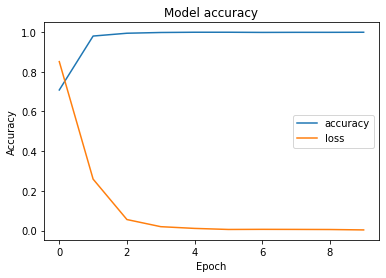

In [ ]:
import matplotlib.pyplot as plt

#accuracy와 loss 추이
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['accuracy', 'loss'], loc='upper light')
plt.show()